In [ ]:
pip install ctgan
#NO SE TE OLVIDE DESCOMENTAR EN LAS LIBRERÍAS EL CTGAN

SyntaxError: invalid syntax (<ipython-input-2-a320309f4fe1>, line 1)

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
from google.colab import drive
import pandas as pd
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import VarianceThreshold
import os
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
import ipywidgets as widgets
from IPython.display import display
from datetime import timedelta
from scipy.spatial.distance import euclidean
import sys
from matplotlib.lines import Line2D
import pickle
from scipy.spatial.distance import cdist


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import math
from imblearn.over_sampling import SMOTE
#from ctgan import CTGAN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import joblib


from sklearn.model_selection import StratifiedKFold

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import time
import gc

from sklearn.metrics import confusion_matrix

import pickle

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


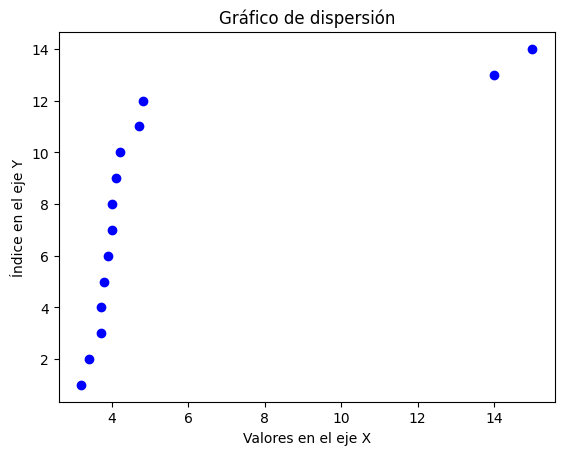

In [ ]:
import matplotlib.pyplot as plt

# Puntos dados
puntos_x = [3.2, 3.4, 3.7, 3.7, 3.8, 3.9, 4, 4, 4.1, 4.2, 4.7, 4.8, 14, 15]
puntos_y = list(range(1, len(puntos_x) + 1))  # Y-values simplemente serán 1, 2, 3, ...

# Crear el gráfico de dispersión
plt.scatter(puntos_x, puntos_y, color='blue', marker='o')

# Configurar el título y las etiquetas de los ejes
plt.title('Gráfico de dispersión')
plt.xlabel('Valores en el eje X')
plt.ylabel('Índice en el eje Y')

# Mostrar el gráfico
plt.show()


# Funciones: datos duplicados, datos vacíos y gráfica

In [ ]:
def find_duplicate_datetime(dataframe):
    i=0
    # Encontrar filas duplicadas en la primera columna, subset=dataframe.columns[0] estamos buscando duplicados en la primera columna del DataFrame,  keep=False Marca todas las filas duplicadas como "True"
    duplicate_rows = dataframe[dataframe.duplicated(subset=dataframe.columns[0], keep=False)]

    # Imprimir las filas duplicadas junto con su posición
    # verifica si el DataFrame duplicate_rows no está vacío. El .empty indica si un DataFrame está vacío o no
    if not duplicate_rows.empty:
        print("Filas duplicadas:")
        #iterrows se utiliza para iterar a través de las filas de un DataFrame.
        for index, row in duplicate_rows.iterrows():
          #.tolist() se utiliza aquí para convertir la fila row en una lista
            print(f"Posición: {index}, Datos: {row.tolist()}")
            i=i+1
        print('Hay', i, 'Duplicados')


def conteo_de_datos_vacios(df):
    # Inicializa un diccionario para contar los valores faltantes en cada columna
    conteo_faltantes = {}

    # Inicializa un diccionario para almacenar las posiciones de los datos faltantes en cada columna
    posiciones_faltantes = {}

    # Recorre cada columna del DataFrame
    for columna in df.columns:
        # Cuenta los valores faltantes en la columna
        faltantes = df[columna].isnull().sum()

        # Almacena el conteo en el diccionario de conteo_faltantes
        conteo_faltantes[columna] = faltantes

        # Encuentra las posiciones de los datos faltantes en la columna
        posiciones = [pos for pos, valor in enumerate(df[columna].isnull()) if valor]

        # Almacena las posiciones en el diccionario de posiciones_faltantes
        posiciones_faltantes[columna] = posiciones

    return conteo_faltantes, posiciones_faltantes




# Función para graficar combinaciones en un solo DataFrame
def graficar_combinaciones_df(df):
    columns = df.columns
    num_columns = len(columns)

    # Genera todas las posibles combinaciones entre columnas
    combinations = [(columns[i], columns[j]) for i in range(num_columns) for j in range(i + 1, num_columns)]

    # Grafica las combinaciones
    for col1, col2 in combinations:
        plt.figure()
        plt.scatter(df[col1], df[col2])
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f'Combinación entre {col1} y {col2}')
        plt.show()



def eliminar_atipicos_rango(df):
    mean = df.mean()
    std = df.std()
    lower_bound = mean - (2*std)
    upper_bound = mean + (2*std)
    outliers = (df < lower_bound) | (upper_bound < df)
    df[outliers] = np.nan

    # Contar la cantidad de valores atípicos en cada columna
    atipicos_por_columna = outliers.sum()

    return df, atipicos_por_columna



def encontrar_lapsos_mayores(df, tiempo_minutos):
    # Asegurémonos de que la primera columna sea de tipo DateTime
    if not pd.api.types.is_datetime64_any_dtype(df.iloc[:, 0]):
        raise ValueError("La primera columna no es de tipo DateTime")

    # Ordenar el DataFrame por la primera columna si no está ordenado
    df = df.sort_values(df.columns[0])

    # Calcular las diferencias entre lapsos de tiempo
    time_diffs = df.iloc[:, 0].diff()

    # Identificar las filas que tienen una diferencia mayor a tiempo_minutos minutos
    condition = time_diffs > timedelta(minutes=tiempo_minutos)

    # Obtener las fechas de inicio y fin de los lapsos con diferencia mayor a tiempo_minutos minutos
    start_dates = []
    end_dates = []

    for i in range(1, len(df)):
        if condition.iloc[i]:
            start_dates.append(df.iloc[i - 1, 0])
            end_dates.append(df.iloc[i, 0])

    # Combinar las fechas de inicio y fin en intervalos
    intervals = list(zip(start_dates, end_dates))

    # Crear un DataFrame con las filas adicionales
    new_rows = []
    for start, end in intervals:
        current_date = start + timedelta(minutes=tiempo_minutos)
        while current_date < end:
            new_rows.append({df.columns[0]: current_date})
            current_date += timedelta(minutes=tiempo_minutos)

    # Concatenar el DataFrame original con el nuevo DataFrame
    new_df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)

    # Ordenar nuevamente el DataFrame después de agregar las filas
    new_df = new_df.sort_values(new_df.columns[0])

    renglones_agregados = len(new_rows)
    print(f"Número de renglones agregados: {renglones_agregados}")

    return new_df


def grafica_features(df, columnas_a_eliminar, eje_x):
    # Eliminar las columnas especificadas
    df = df.drop(columnas_a_eliminar, axis=1)

    # Verificar si 'eje_x' está en las columnas
    if eje_x not in df.columns:
        print(f"'{eje_x}' no se encuentra en las columnas del DataFrame.")
        return

    # Crear una gráfica para todas las columnas en función del eje x
    plt.figure(figsize=(10, 6))

    for columna in df.columns:
        if columna != eje_x:
            plt.plot(df[eje_x], df[columna], label=columna)

    plt.xlabel(eje_x)
    plt.legend()
    plt.grid(True)
    plt.show()


def graficar_combinaciones_df(df):
    g = sns.PairGrid(df, despine=False, layout_pad=3.5)
    g.map(plt.scatter)

    for i in range(1,len(df.columns)):
        for j in range(1,len(df.columns)):
            g.axes[i, j].yaxis.set_label_text(df.columns[i])
            g.axes[i, j].xaxis.set_label_text(df.columns[j])
            g.axes[i, j].tick_params(axis='both', direction='out', bottom=True, left=True, labelbottom=True, labelleft=True)

    plt.show()

def dtw_Simple(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0


    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1]) #en otra versión ponerla con Métrica euclidiana
            # Tomar el min de sus vecinos
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix[n, m]

def graficar_dos_dataframes_con_indice(df1, df2, columna_y1, columna_y2):
    # Asegurarse de que las columnas especificadas existan en los DataFrames
    if columna_y1 not in df1.columns or columna_y2 not in df2.columns:
        raise ValueError("Las columnas especificadas no existen en los DataFrames.")

    # Obtener los datos de los DataFrames
    y1 = df1[columna_y1]
    y2 = df2[columna_y2]

    # Crear la gráfica utilizando el índice como eje x
    plt.figure(figsize=(10, 6))
    plt.plot(y1, label="Y1", linestyle='-', marker='o')
    plt.plot(y2, label="Y2", linestyle='-', marker='o')
    plt.xlabel("Índice")
    plt.ylabel("Valores")
    plt.title("Gráfica de Y1 y Y2 con respecto al Índice")
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

def rellenar_extremos_con_recta(dataframe, columnas_a_rellenar):
    for columna in columnas_a_rellenar:
        datos = dataframe[columna]
        inicio = 0
        fin = len(datos)

        # Rellena los valores NaN en el principio de la columna
        while inicio < fin and pd.isna(datos[inicio]):
            inicio += 1

        if inicio < fin:
            x1, y1 = inicio, datos[inicio]

            i = inicio + 1
            while i < fin and pd.isna(datos[i]):
                i += 1

            if i < fin:
                x2, y2 = i, datos[i]

                # Calcula la pendiente y el intercepto de la recta
                m, b = np.polyfit([x1, x2], [y1, y2], 1)

                # Rellena los valores NaN en el principio con la recta
                dataframe.iloc[:inicio, dataframe.columns.get_loc(columna)] = m * np.arange(0, inicio) + b

        # Rellena los valores NaN en el final de la columna
        fin -= 1
        while fin > inicio and pd.isna(datos[fin]):
            fin -= 1

        if fin > inicio:
            x1, y1 = fin, datos[fin]

            i = fin - 1
            while i > inicio and pd.isna(datos[i]):
                i -= 1

            if i > inicio:
                x2, y2 = i, datos[i]

                # Calcula la pendiente y el intercepto de la recta
                m, b = np.polyfit([x1, x2], [y1, y2], 1)

                # Rellena los valores NaN en el final con la recta
                dataframe.iloc[fin + 1:, dataframe.columns.get_loc(columna)] = m * np.arange(fin + 1, len(datos)) + b

    return dataframe


def rellenar_con_recta(dataframe, columnas_a_rellenar):
    for columna in columnas_a_rellenar:
        datos = dataframe[columna]
        for i in range(1, len(datos) - 1):
            if pd.isna(datos[i]):
                inicio = i - 1
                while pd.isna(datos[i]):
                    i += 1
                fin = i
                x = np.array([inicio, fin])
                y = np.array([datos[inicio], datos[fin]])
                # Calcula la pendiente y el intercepto de la recta
                m, b = np.polyfit(x, y, 1)
                # Rellena los valores vacíos en la columna con la recta
                for j in range(inicio + 1, fin):
                    dataframe.at[j, columna] = m * j + b
    return dataframe



def calculate_parabolas(df, column_name):
    result_df = pd.DataFrame()
    day_result_df = pd.DataFrame()  # Crear day_result_df una sola vez antes del bucle
    contador = pd.DataFrame(columns=['TIMESTAMP', column_name])  # Crear un DataFrame vacío para contador

    unique_days = df['TIMESTAMP'].dt.date.unique()

    for day in unique_days:
        day_df = df[df['TIMESTAMP'].dt.date == day]

        alpha = day_df.loc[day_df['TIMESTAMP'].dt.strftime('%H:%M:%S') == '00:00:00', column_name].values[0]
        M = 720  # np.random.randint(1320, 1561)  # Valor aleatorio para M

        a = (3 * alpha) / ((1440 ** 2) * (1440 - 3 * M))
        b = -(6 * alpha * M) / ((1440 ** 2) * (1440 - 3 * M))

        time_series = pd.date_range(start=day, periods=1440, freq='T')

        # Modificar los valores de time_series para que vayan de 0 a 1440 y se reinicien
        time_series_minute_values = (time_series.minute + (time_series.hour * 60)) % 1440

        # Calcular los valores de a * (time_series_minute_values ** 2) + b * time_series_minute_values
        contador_day = pd.DataFrame({
            'TIMESTAMP': time_series,
            column_name: a * (time_series_minute_values ** 2) + b * time_series_minute_values
        })

        # Concatenar los valores de contador_day a contador
        contador = pd.concat([contador, contador_day], ignore_index=True)

    # Desplazar contador un día hacia atrás en df
    contador['TIMESTAMP'] = contador['TIMESTAMP'] - pd.DateOffset(days=1)
    df = pd.merge(df, contador, on='TIMESTAMP', how='left')

    return df



def calcular_acumulado_diario(df, columna):
    # Asegúrate de que la columna "TIMESTAMP" esté en formato de fecha y hora
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

    # Ordena el DataFrame por "TIMESTAMP"
    df = df.sort_values(by='TIMESTAMP')

    # Calcula el acumulado de la columna y reinicialo en cada nuevo día
    df['Sun_Hrs_Tot'] = df.groupby(df['TIMESTAMP'].dt.date)[columna].cumsum()

    # Agrega los valores no nulos de la columna "Sun_Hrs_Tot_x" a "Sun_Hrs_Tot"
    df['Sun_Hrs_Tot_x'] = df['Sun_Hrs_Tot_x'].combine_first(df['Sun_Hrs_Tot'])#SE HIZO ASÍ por que Sun_Hrs_Tot_x Es el que tiene los datos
    #vacíos, entonces combine_first rellena esos valores con lo que se generó en Sun_Hrs_Tot. Si lo ponemos al revés
    # No rellena nada por que Sun_Hrs_Tot No tiene valores vacíos.


    # Elimina la columna "Sun_Hrs_Tot_x"
    df = df.drop(columns=['Sun_Hrs_Tot'])#Contiene los datos acumulativos (suma de renglones) generados por las parábolas,
    #pero sin los valores originales, esos tiene valor ceros en este conjunto
    df= df.drop(columns=['Sun_Hrs_Tot_y'])# Contiene los datos puntucales de los datos generados por las parábolas

    df = df.rename(columns={'Sun_Hrs_Tot_x': 'Sun_Hrs_Tot'})# Cambio de nombre

    return df


# Función para rellenar valores nulos con los valores no nulos en orden inverso
def llenar_valores_nulos_con_anteriores_reves(df, columna_a_verificar):
    df[columna_a_verificar] = df[columna_a_verificar].fillna(method='bfill')
    return df





#Este es para Horas del sol, ya que los últimos valores no se llenaron por falta del dato del último día, es decir
#no se tomó la medición a las 00:00:00
def rellenar_con_valores_del_dia_anterior(df, columna_a_verificar):
    # Asegúrate de que la columna "TIMESTAMP" esté en formato de fecha y hora
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

    # Ordena el DataFrame por "TIMESTAMP"
    df = df.sort_values(by='TIMESTAMP')

    # Itera a través de las filas
    for index, row in df.iterrows():
        if pd.isna(row[columna_a_verificar]):
            # Encuentra la fecha del día anterior
            dia_anterior = row['TIMESTAMP'] - pd.DateOffset(days=1)

            # Encuentra el valor del día anterior en la misma columna
            valor_dia_anterior = df[df['TIMESTAMP'] == dia_anterior][columna_a_verificar].values[0]

            # Rellena el valor nulo con el valor del día anterior
            df.at[index, columna_a_verificar] = valor_dia_anterior

    return df




def serie_tiempo_IMECA(df, fecha_inicio, fecha_fin, contaminantes):
    # Filtrar el DataFrame por las fechas proporcionadas
    df_filtrado = df[(df['TIMESTAMP'] >= fecha_inicio) & (df['TIMESTAMP'] <= fecha_fin)]

    # Configurar el estilo de las líneas
    custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8),
                    Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=8),
                    Line2D([0], [0], marker='^', color='w', markerfacecolor='red', markersize=8),
                    Line2D([0], [0], marker='x', color='w', markerfacecolor='purple', markersize=8)]

    # Configurar la leyenda
    legend_labels = ['Clase 1', 'Clase 2', 'Clase 3', 'Clase 4']
    plt.legend(custom_lines, legend_labels)

    # Iterar sobre los contaminantes
    for contaminante in contaminantes:
        # Configurar el color según el contaminante
        color = 'blue' if contaminante == 'O3' else 'green' if contaminante == 'NO2' else 'red' if contaminante == 'SO2' else 'purple'

        # Iterar sobre las clases
        for clase in range(1, 5):
            # Filtrar por contaminante y clase
            df_contaminante_clase = df_filtrado[(df_filtrado[f'Clase_{contaminante}'] == clase)]

            # Graficar la serie de tiempo
            plt.scatter(df_contaminante_clase['TIMESTAMP'], df_contaminante_clase[contaminante],
                        label=f'{contaminante} - Clase {clase}', color=color, marker='o' if clase == 1 else 's' if clase == 2 else '^' if clase == 3 else 'x')

    # Etiquetas y título
    plt.xlabel('Fecha')
    plt.ylabel('Concentración')
    plt.title('Series de Tiempo de Contaminantes por Clase')

    # Mostrar la leyenda
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=90)
    # Mostrar la gráfica
    plt.show()

def tstPlot(fecha_inicio, fecha_fin, df, xa = None, ya = None, figsize = (15,8), num = None):# hace lo mismo que el anterior, solo falta
#modificarlo para que me grafique el intervalo que quiero.
  df = df[(df['TIMESTAMP'] >= fecha_inicio) & (df['TIMESTAMP'] <= fecha_fin)]

  if xa == None:
    xa = 'TIMESTAMP'
  if ya == None:
    ya = df.keys()[0]

  plt.figure(num = num, facecolor='w', figsize = figsize, clear=True)

  if isinstance(ya, list):
    titl = []
    for c in ya:
        sns.lineplot(x = xa, y = c, data = df)
        titl.append(c)

    plt.title(' and '.join(titl))
    plt.show()
    plt.close()
  else:
    sns.lineplot(x = xa, y = ya, data = df)
    plt.title(ya)
    plt.show()
    plt.close()





# Limpieza de datos

In [ ]:
clima='/content/drive/My Drive/Maestria-programas/Muestra_Ibero'

clima_nuevos = '/content/drive/My Drive/Maestria-programas/Muestra_Ibero/Nuevos_datos'

#clima = [ '/content/drive/My Drive/Maestria-programas/Muestra_Ibero', '/content/drive/My Drive/Maestria-programas/Muestra_Ibero/Nuevos_datos' ] # Agrega la segunda dirección

#clima_principal = '/content/drive/My Drive/Maestria-programas/Muestra_Ibero'
#clima_secundario = '/content/drive/My Drive/Maestria-programas/Muestra_Ibero/Nuevos_datos'


## Juntar archivos de OneDay

In [ ]:
# Obtener la lista de archivos txt con nombre base "OneDay"
archivos_viejos_txt = [f for f in os.listdir(clima) if f.startswith('OneDay') and f.endswith('.txt')]
nuevos_archivos_txt = [f for f in os.listdir(clima_nuevos) if f.startswith('OneDay') and f.endswith('.txt')]

# Combinar las dos listas en una sola
archivos_txt = archivos_viejos_txt + nuevos_archivos_txt

# Crear un DataFrame vacío
df_final1 = pd.DataFrame()

# Leer los archivos txt restantes y agregar la información a partir de la quinta fila
for archivo in archivos_txt:
    data = pd.read_csv(os.path.join(clima if archivo in archivos_viejos_txt else clima_nuevos, archivo), skiprows=[0,2, 3])
    data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
    data['T_amb_TMx'] = pd.to_datetime(data['T_amb_TMx'])
    data['T_amb_TMn'] = pd.to_datetime(data['T_amb_TMn'])

    df_final1 = pd.concat([df_final1, data])

df_final1=df_final1.sort_values('TIMESTAMP')


df_final1

,TIMESTAMP,RECORD,Irradiation_Tot,Precipitation_Tot,Sun_Hrs_Tot,T_amb_Max,T_amb_TMx,T_amb_Min,T_amb_TMn
0,2019-05-17,0,6.531803,1.4,1.380,24.65,2019-05-16 13:58:28,14.70,2019-05-16 23:06:48
1,2019-05-18,1,14.763410,2.0,5.017,22.88,2019-05-17 12:19:34,13.68,2019-05-17 06:48:06
2,2019-05-19,2,20.534910,0.6,6.203,25.68,2019-05-18 16:31:58,14.21,2019-05-18 07:52:22
3,2019-05-20,3,28.618850,0.0,9.730,27.05,2019-05-19 15:46:18,13.86,2019-05-19 05:36:32
4,2019-05-21,4,24.493100,0.0,7.941,26.47,2019-05-20 14:50:52,16.28,2019-05-20 07:44:22
...,...,...,...,...,...,...,...,...,...
16,2023-09-17,71,15.822290,3.3,3.972,23.52,2023-09-16 14:55:56,13.50,2023-09-16 04:36:46
17,2023-09-18,72,16.951000,4.5,4.321,22.32,2023-09-17 14:18:22,13.17,2023-09-17 04:45:30
18,2023-09-19,73,16.061230,28.5,3.940,22.49,2023-09-18 14:02:26,13.79,2023-09-18 04:58:24
19,2023-09-20,74,23.734400,9.5,7.742,24.25,2023-09-19 15:50:46,13.22,2023-09-19 06:45:36


In [ ]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586 entries, 0 to 20
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TIMESTAMP          1586 non-null   datetime64[ns]
 1   RECORD             1586 non-null   int64         
 2   Irradiation_Tot    1586 non-null   float64       
 3   Precipitation_Tot  1586 non-null   float64       
 4   Sun_Hrs_Tot        1586 non-null   float64       
 5   T_amb_Max          1586 non-null   float64       
 6   T_amb_TMx          1586 non-null   datetime64[ns]
 7   T_amb_Min          1586 non-null   float64       
 8   T_amb_TMn          1586 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(1)
memory usage: 123.9 KB


In [ ]:
# Ruta donde se guardará el archivo CSV
Data_OneDay_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_OneDay_Unido.csv'

# Guardar el DataFrame combinado en un archivo CSV
df_final1.to_csv(Data_OneDay_Unido_csv, index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586 entries, 0 to 20
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TIMESTAMP          1586 non-null   datetime64[ns]
 1   RECORD             1586 non-null   int64         
 2   Irradiation_Tot    1586 non-null   float64       
 3   Precipitation_Tot  1586 non-null   float64       
 4   Sun_Hrs_Tot        1586 non-null   float64       
 5   T_amb_Max          1586 non-null   float64       
 6   T_amb_TMx          1586 non-null   datetime64[ns]
 7   T_amb_Min          1586 non-null   float64       
 8   T_amb_TMn          1586 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(1)
memory usage: 123.9 KB


## Juntar archivos Gases

In [ ]:
# Obtener la lista de archivos txt con nombre base "OneDay"
archivos_viejos_txt = [f for f in os.listdir(clima) if f.startswith('Gases') and f.endswith('.txt')]
nuevos_archivos_txt = [f for f in os.listdir(clima_nuevos) if f.startswith('Gases') and f.endswith('.txt')]

# Combinar las dos listas en una sola
archivos_txt = archivos_viejos_txt + nuevos_archivos_txt

# Crear un DataFrame vacío
df_final2 = pd.DataFrame()

# Leer los archivos txt restantes y agregar la información a partir de la quinta fila
for archivo in archivos_txt:
    data = pd.read_csv(os.path.join(clima if archivo in archivos_viejos_txt else clima_nuevos, archivo), skiprows=[0,2, 3])
    data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
    data['NO2']=data['NO2'].replace('...',np.nan).astype('float')
    data['SO2']=data['SO2'].replace('.',np.nan).astype('float')

    #if "H_R" in data.columns:
    #    data.rename(columns={"H_R": "RH_Avg"}, inplace=True)

    #data['NO2']=data['NO2'].infer_objects()

    df_final2 = pd.concat([df_final2, data])

df_final2=df_final2.sort_values('TIMESTAMP')

df_final2

,TIMESTAMP,RECORD,NO2,SO2,CO,O3,T_air,P_atm_q,H_R
9,2019-12-06 17:23:00,3,0.002,0.001,0.110,-0.001,20.5,766.5,9.6
10,2019-12-06 17:24:00,4,0.002,0.001,0.113,-0.002,20.5,766.6,9.7
11,2019-12-06 17:25:00,5,0.003,0.000,0.116,0.000,20.5,766.7,9.7
12,2019-12-06 17:26:00,6,0.003,0.000,0.119,0.000,20.5,766.6,9.7
13,2019-12-06 17:27:00,7,0.003,0.000,0.122,-0.001,20.4,766.7,9.7
...,...,...,...,...,...,...,...,...,...
566,2023-09-21 09:26:00,109036,0.017,0.085,0.454,0.020,17.2,758.9,80.6
567,2023-09-21 09:27:00,109037,0.015,0.085,0.453,0.022,16.8,759.0,83.3
568,2023-09-21 09:28:00,109038,0.015,0.084,0.451,0.025,17.4,759.0,84.2
569,2023-09-21 09:29:00,109039,0.015,0.084,0.447,0.027,17.2,759.0,83.2


In [ ]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989323 entries, 9 to 570
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   TIMESTAMP  datetime64[ns]
 1   RECORD     int64         
 2   NO2        float64       
 3   SO2        float64       
 4   CO         float64       
 5   O3         float64       
 6   T_air      float64       
 7   P_atm_q    float64       
 8   H_R        float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 151.8 MB


In [ ]:
# Ruta donde se guardará el archivo CSV
Data_Gases_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_Gases_Unido.csv'

# Guardar el DataFrame combinado en un archivo CSV
df_final2.to_csv(Data_Gases_Unido_csv, index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989323 entries, 9 to 570
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   TIMESTAMP  datetime64[ns]
 1   RECORD     int64         
 2   NO2        float64       
 3   SO2        float64       
 4   CO         float64       
 5   O3         float64       
 6   T_air      float64       
 7   P_atm_q    float64       
 8   H_R        float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 151.8 MB


## Juntar archivos OneMinute

In [ ]:
# Obtener la lista de archivos txt con nombre base "OneDay"
archivos_viejos_txt = [f for f in os.listdir(clima) if f.startswith('OneMinute') and f.endswith('.txt')]
nuevos_archivos_txt = [f for f in os.listdir(clima_nuevos) if f.startswith('OneMinute') and f.endswith('.txt')]

# Combinar las dos listas en una sola
archivos_txt = archivos_viejos_txt + nuevos_archivos_txt

# Crear un DataFrame vacío
df_final3 = pd.DataFrame()

# Leer los archivos txt restantes y agregar la información a partir de la quinta fila
for archivo in archivos_txt:
    data = pd.read_csv(os.path.join(clima if archivo in archivos_viejos_txt else clima_nuevos, archivo), skiprows=[0,2, 3])
    data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
    data['P_atm_Avg']=data['P_atm_Avg'].astype('float')

      # Renombrar la columna "Irradiance_Avg" a "Irradiation_Avg" si es necesario
    #if "Irradiance_Avg" in data.columns and "Irradiation_Avg" not in data.columns:
    #    data.rename(columns={"Irradiance_Avg": "Irradiation_Avg"}, inplace=True)

    #if "RH" in data.columns and "RH_Avg" not in data.columns:
    #    data.rename(columns={"RH": "RH_Avg"}, inplace=True)

    # Combina las columnas "Irradiance_Avg" y "Irradiation_Avg" en una nueva columna "Combined_Irradiance"
    #data = data.assign(Combined_Irradiance=data['Irradiance_Avg'] + data['Irradiation_Avg'])

    # Elimina las columnas originales si lo deseas
    # data = data.drop(['Irradiance_Avg', 'Irradiation_Avg'], axis=1)


    df_final3  = pd.concat([df_final3 , data])

df_final3 =df_final3 .sort_values('TIMESTAMP')


df_final3

,TIMESTAMP,RECORD,Irradiance_Avg,T_amb_Avg,RH_Avg,P_atm_Avg,Irradiation_Avg,RH
0,2019-05-15 16:55:00,9,NaN,24.89,NaN,896.5846,316.1,26.96
1,2019-05-15 16:56:00,10,NaN,24.80,NaN,902.5274,250.0,27.07
2,2019-05-15 16:57:00,11,NaN,24.82,NaN,902.4821,235.1,27.00
3,2019-05-15 16:58:00,12,NaN,24.78,NaN,902.4630,148.9,27.03
4,2019-05-15 16:59:00,13,NaN,24.82,NaN,902.4339,134.8,26.94
...,...,...,...,...,...,...,...,...
567,2023-09-21 09:27:00,109037,693.6,16.87,64.32,755.1456,NaN,NaN
568,2023-09-21 09:28:00,109038,697.1,16.95,64.15,755.1407,NaN,NaN
569,2023-09-21 09:29:00,109039,702.3,17.16,64.30,755.1298,NaN,NaN
570,2023-09-21 09:30:00,109040,706.0,17.51,63.80,755.1348,NaN,NaN


In [ ]:
df_final3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283348 entries, 0 to 571
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   TIMESTAMP        datetime64[ns]
 1   RECORD           int64         
 2   Irradiance_Avg   float64       
 3   T_amb_Avg        float64       
 4   RH_Avg           float64       
 5   P_atm_Avg        float64       
 6   Irradiation_Avg  float64       
 7   RH               float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 156.8 MB


In [ ]:
cantidad_de_datos = df_final3.count()

print(cantidad_de_datos)


TIMESTAMP          2283348
RECORD             2283348
Irradiance_Avg     2282923
T_amb_Avg          2283348
RH_Avg             2282923
P_atm_Avg          2283346
Irradiation_Avg        425
RH                     425
dtype: int64


In [ ]:
# Ruta donde se guardará el archivo CSV
Data_OneMinute_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_OneMinute_Unido.csv'

# Guardar el DataFrame combinado en un archivo CSV
df_final3.to_csv(Data_OneMinute_Unido_csv, index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283348 entries, 0 to 571
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   TIMESTAMP        datetime64[ns]
 1   RECORD           int64         
 2   Irradiation_Avg  float64       
 3   T_amb_Avg        float64       
 4   RH_Avg           float64       
 5   P_atm_Avg        float64       
 6   RH               float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 139.4 MB


## Juntar archivos Particualas xD

In [ ]:
# Obtener la lista de archivos txt con nombre base "OneDay"
archivos_viejos_txt = [f for f in os.listdir(clima) if f.startswith('Particualas') and f.endswith('.txt')]
nuevos_archivos_txt = [f for f in os.listdir(clima_nuevos) if f.startswith('Particualas') and f.endswith('.txt')]

# Combinar las dos listas en una sola
archivos_txt = archivos_viejos_txt + nuevos_archivos_txt


# Crear un DataFrame vacío
df_final4 = pd.DataFrame()

# Leer los archivos txt restantes y agregar la información a partir de la quinta fila
for archivo in archivos_txt:
    data = pd.read_csv(os.path.join(clima if archivo in archivos_viejos_txt else clima_nuevos, archivo), skiprows=[0,2, 3])
    data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

    df_final4  = pd.concat([df_final4 , data])

df_final4 =df_final4 .sort_values('TIMESTAMP')


df_final4

,TIMESTAMP,RECORD,PM25,PM10
0,2019-12-06 17:40:00,2,7.2,61.0
1,2019-12-06 19:40:00,14,6.9,60.2
2,2019-12-06 19:50:00,15,6.9,66.1
3,2019-12-06 20:00:00,16,7.3,58.6
4,2019-12-06 20:10:00,17,7.3,56.7
...,...,...,...,...
53,2023-09-21 08:50:00,10900,0.4,18.3
54,2023-09-21 09:00:00,10901,0.3,13.6
55,2023-09-21 09:10:00,10902,0.4,10.2
56,2023-09-21 09:20:00,10903,0.5,10.2


In [ ]:
df_final4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198916 entries, 0 to 57
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TIMESTAMP  198916 non-null  datetime64[ns]
 1   RECORD     198916 non-null  int64         
 2   PM25       196741 non-null  float64       
 3   PM10       196741 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 7.6 MB


In [ ]:
# Ruta donde se guardará el archivo CSV
Data_Particualas_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_Particualas_Unido.csv'

# Guardar el DataFrame combinado en un archivo CSV
df_final4.to_csv(Data_Particualas_Unido_csv, index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198916 entries, 0 to 57
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TIMESTAMP  198916 non-null  datetime64[ns]
 1   RECORD     198916 non-null  int64         
 2   PM25       196741 non-null  float64       
 3   PM10       196741 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 7.6 MB


## Juntar archivos TenMinutes

In [ ]:
# Obtener la lista de archivos txt con nombre base "OneDay"
archivos_viejos_txt = [f for f in os.listdir(clima) if f.startswith('TenMinutes') and f.endswith('.txt')]
nuevos_archivos_txt = [f for f in os.listdir(clima_nuevos) if f.startswith('TenMinutes') and f.endswith('.txt')]

# Combinar las dos listas en una sola
archivos_txt = archivos_viejos_txt + nuevos_archivos_txt


# Crear un DataFrame vacío
df_final5 = pd.DataFrame()

# Leer los archivos txt restantes y agregar la información a partir de la quinta fila
for archivo in archivos_txt:
    data = pd.read_csv(os.path.join(clima if archivo in archivos_viejos_txt else clima_nuevos, archivo), skiprows=[0,2, 3])
    data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
    data['Wind_Speed_TMx'] = pd.to_datetime(data['Wind_Speed_TMx'])

    #if "Pot_Irradiance_Avg" in data.columns and "Pot_Irradiation_Avg" not in data.columns:
    #    data.rename(columns={"Pot_Irradiance_Avg": "Pot_Irradiation_Avg"}, inplace=True)

    #if "Irradiance_Tot" in data.columns and "Irradiation_Tot" not in data.columns:
    #    data.rename(columns={"Irradiance_Tot": "Irradiation_Tot"}, inplace=True)

    df_final5  = pd.concat([df_final5 , data])

df_final5 =df_final5 .sort_values('TIMESTAMP')



df_final5

,TIMESTAMP,RECORD,BattV_Min,Precipitation_Tot,Dew_Point_Avg,T_Wet_Bulb_Avg,Heat_Inedx_Avg,Wind_Chill_Avg,Pot_Irradiance_Avg,P_Sat_vap_Avg,Irradiation_Tot,Wind_Speed_Avg,Wind_Speed_Std,Wind_Direction_Avg,Wind_Direction_Std,Wind_Speed_Max,Wind_Speed_TMx,Wind_Direction_SMM,Pot_Irradiation_Avg,Irradiance_Tot
0,2019-05-15 17:00:00,1,13.34,0.0,4.600,12.59,24.84,24.84,NaN,NaN,NaN,4.781,NaN,171.60,NaN,16.09,2019-05-15 16:54:18,149.800,648.4,0.071364
1,2019-05-15 17:10:00,2,13.31,0.0,4.547,12.55,24.80,24.80,NaN,NaN,NaN,10.150,NaN,83.30,NaN,34.20,2019-05-15 17:03:48,96.400,609.3,0.071233
2,2019-05-15 17:20:00,3,13.31,0.0,4.539,12.56,24.85,24.85,NaN,NaN,NaN,7.872,NaN,114.40,NaN,34.20,2019-05-15 17:14:20,22.970,559.4,0.049256
3,2019-05-15 17:30:00,4,13.31,0.0,4.577,12.60,24.90,24.90,NaN,NaN,NaN,13.520,NaN,61.76,NaN,26.15,2019-05-15 17:28:30,13.810,508.8,0.033517
4,2019-05-15 17:40:00,5,13.31,0.0,4.364,12.42,24.65,24.65,NaN,NaN,NaN,18.670,NaN,44.66,NaN,34.20,2019-05-15 17:37:20,29.780,457.5,0.064927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,2023-09-21 08:50:00,10900,13.49,0.0,10.450,12.68,16.74,16.74,724.4,1905.0,0.312799,11.300,3.971,46.29,19.84,22.13,2023-09-21 08:46:14,21.370,NaN,NaN
54,2023-09-21 09:00:00,10901,13.48,0.0,10.350,12.53,16.47,16.47,770.7,1873.0,0.339240,14.160,4.317,72.91,101.30,26.15,2023-09-21 08:51:26,60.230,NaN,NaN
55,2023-09-21 09:10:00,10902,13.48,0.0,10.400,12.77,17.08,17.08,815.0,1946.0,0.365466,9.480,4.339,23.60,14.15,20.12,2023-09-21 09:06:14,24.370,NaN,NaN
56,2023-09-21 09:20:00,10903,13.49,0.0,10.390,12.96,17.66,17.66,859.0,2019.0,0.388242,7.973,4.451,105.90,141.90,22.13,2023-09-21 09:15:24,5.089,NaN,NaN


In [ ]:
df_final5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227944 entries, 0 to 57
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   TIMESTAMP            227944 non-null  datetime64[ns]
 1   RECORD               227944 non-null  int64         
 2   BattV_Min            227944 non-null  float64       
 3   Precipitation_Tot    227944 non-null  float64       
 4   Dew_Point_Avg        227944 non-null  float64       
 5   T_Wet_Bulb_Avg       227944 non-null  float64       
 6   Heat_Inedx_Avg       227944 non-null  float64       
 7   Wind_Chill_Avg       227944 non-null  float64       
 8   Pot_Irradiance_Avg   227902 non-null  float64       
 9   P_Sat_vap_Avg        227902 non-null  float64       
 10  Irradiation_Tot      227902 non-null  float64       
 11  Wind_Speed_Avg       227944 non-null  float64       
 12  Wind_Speed_Std       227902 non-null  float64       
 13  Wind_Direction_Avg

In [ ]:
# Ruta donde se guardará el archivo CSV
Data_TenMinutes_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_TenMinutes_Unido.csv'


# Guardar el DataFrame combinado en un archivo CSV
df_final5.to_csv(Data_TenMinutes_Unido_csv, index=False)

## Análisis de datos

In [ ]:
Data_OneDay_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_OneDay_Unido.csv'
Data_Gases_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_Gases_Unido.csv'
Data_OneMinute_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_OneMinute_Unido.csv'
Data_Particualas_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_Particualas_Unido.csv'
Data_TenMinutes_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_TenMinutes_Unido.csv'


# Cargar el archivo CSV en un DataFrame
df1 = pd.read_csv(Data_OneDay_Unido_csv)#
df2 = pd.read_csv(Data_Gases_Unido_csv)#
df3 = pd.read_csv(Data_OneMinute_Unido_csv)#
df4 = pd.read_csv(Data_Particualas_Unido_csv)#
df5 = pd.read_csv(Data_TenMinutes_Unido_csv)#

eje_x='TIMESTAMP'

### Fechas Faltantes en cada archivo

In [ ]:
df1['TIMESTAMP'] = pd.to_datetime(df1['TIMESTAMP'])
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'])
df3['TIMESTAMP'] = pd.to_datetime(df3['TIMESTAMP'])
df4['TIMESTAMP'] = pd.to_datetime(df4['TIMESTAMP'])
df5['TIMESTAMP'] = pd.to_datetime(df5['TIMESTAMP'])

In [ ]:
# Define el rango que deseas eliminar
fecha_inicio = pd.to_datetime("2019-05-15 16:55:00")
fecha_fin = pd.to_datetime("2019-12-06 23:59:00")

# Filtra las filas que están fuera del rango para cada DataFrame
df1 = df1[(df1['TIMESTAMP'] < fecha_inicio) | (df1['TIMESTAMP'] > fecha_fin)]
df2 = df2[(df2['TIMESTAMP'] < fecha_inicio) | (df2['TIMESTAMP'] > fecha_fin)]
df3 = df3[(df3['TIMESTAMP'] < fecha_inicio) | (df3['TIMESTAMP'] > fecha_fin)]
df4 = df4[(df4['TIMESTAMP'] < fecha_inicio) | (df4['TIMESTAMP'] > fecha_fin)]
df5 = df5[(df5['TIMESTAMP'] < fecha_inicio) | (df5['TIMESTAMP'] > fecha_fin)]

In [ ]:
tiempo_minutos = 1440  # Cambiar el valor según la diferencia deseada

lapsos_mayores1 = encontrar_lapsos_mayores(df1, tiempo_minutos)
print(f"Fechas faltantes en OneDay mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores1)


tiempo_minutos = 1  # Cambiar el valor según la diferencia deseada

lapsos_mayores2 = encontrar_lapsos_mayores(df2, tiempo_minutos)
print(f"Fechas faltantes en Gases mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores2)



print('--'*100)


lapsos_mayores3 = encontrar_lapsos_mayores(df3, tiempo_minutos)
print(f"Fechas faltantes en OneMinute mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores3)



print('--'*100)
tiempo_minutos2 = 10  # Cambiar el valor según la diferencia deseada


lapsos_mayores4 = encontrar_lapsos_mayores(df4, tiempo_minutos2)
print(f"Fechas faltantes en Particulas mayor a {tiempo_minutos2} minutos:")
print(lapsos_mayores4)



print('--'*100)


lapsos_mayores5 = encontrar_lapsos_mayores(df5, tiempo_minutos2)
print(f"Fechas faltantes en TenMinutes mayor a {tiempo_minutos2} minutos:")
print(lapsos_mayores5)

Número de renglones agregados: 18
Fechas faltantes en OneDay mayor a 1440 minutos:
      TIMESTAMP  RECORD  Irradiation_Tot  Precipitation_Tot  Sun_Hrs_Tot  \
0    2019-05-17     0.0         6.531803                1.4        1.380   
1    2019-05-18     1.0        14.763410                2.0        5.017   
2    2019-05-19     2.0        20.534910                0.6        6.203   
3    2019-05-20     3.0        28.618850                0.0        9.730   
4    2019-05-21     4.0        24.493100                0.0        7.941   
...         ...     ...              ...                ...          ...   
1581 2023-09-17    71.0        15.822290                3.3        3.972   
1582 2023-09-18    72.0        16.951000                4.5        4.321   
1583 2023-09-19    73.0        16.061230               28.5        3.940   
1584 2023-09-20    74.0        23.734400                9.5        7.742   
1585 2023-09-21    75.0        27.389720                0.0       10.710   

    

In [ ]:
Con_Fechas_OneDay_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_OneDay_Unido.csv'
Con_Fechas_Gases_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_Gases_Unido.csv'
Con_Fechas_OneMinute_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_OneMinute_Unido.csv'
Con_Fechas_Particualas_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_Particualas_Unido.csv'
Con_Fechas_TenMinutes_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_TenMinutes_Unido.csv'


# Guardar el DataFrame combinado en un archivo CSV
lapsos_mayores1.to_csv(Con_Fechas_OneDay_Unido_csv, index=False)
lapsos_mayores2.to_csv(Con_Fechas_Gases_Unido_csv, index=False)
lapsos_mayores3.to_csv(Con_Fechas_OneMinute_Unido_csv, index=False)
lapsos_mayores4.to_csv(Con_Fechas_Particualas_Unido_csv, index=False)
lapsos_mayores5.to_csv(Con_Fechas_TenMinutes_Unido_csv, index=False)

### Datos duplicados, faltantes y correciones

In [ ]:
Data_OneDay_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_OneDay_Unido.csv'
Data_Gases_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_Gases_Unido.csv'
Data_OneMinute_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_OneMinute_Unido.csv'
Data_Particualas_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_Particualas_Unido.csv'
Data_TenMinutes_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_TenMinutes_Unido.csv'


# Cargar el archivo CSV en un DataFrame
df1 = pd.read_csv(Data_OneDay_Unido_csv)#
df2 = pd.read_csv(Data_Gases_Unido_csv)#
df3 = pd.read_csv(Data_OneMinute_Unido_csv)#
df4 = pd.read_csv(Data_Particualas_Unido_csv)#
df5 = pd.read_csv(Data_TenMinutes_Unido_csv)#

eje_x='TIMESTAMP'

#### Quitar datos duplicados de OneDay

In [ ]:
#Ver datos dupicados
print('Datos duplicados de OneDay')
find_duplicate_datetime(df1)
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df1)
print(conteo)


#print("\nPosiciones de datos faltantes:")
#print(posiciones)



Datos duplicados de OneDay
Filas duplicadas:
Posición: 1111, Datos: ['2022-06-01', 243.0, 26.07529, 0.0, 8.83, 26.0, '2022-05-31 15:05:50', 15.15, '2022-05-31 06:49:36']
Posición: 1112, Datos: ['2022-06-01', 243.0, 26.07529, 0.0, 8.83, 26.0, '2022-05-31 15:05:50', 15.15, '2022-05-31 06:49:36']
Posición: 1113, Datos: ['2022-06-02', 244.0, 22.69179, 0.0, 7.293, 23.48, '2022-06-01 14:34:54', 13.58, '2022-06-01 06:15:44']
Posición: 1114, Datos: ['2022-06-02', 244.0, 22.69179, 0.0, 7.293, 23.48, '2022-06-01 14:34:54', 13.58, '2022-06-01 06:15:44']
Posición: 1115, Datos: ['2022-06-03', 245.0, 23.77281, 0.0, 7.764, 22.47, '2022-06-02 16:51:42', 12.47, '2022-06-02 05:57:44']
Posición: 1116, Datos: ['2022-06-03', 245.0, 23.77281, 0.0, 7.764, 22.47, '2022-06-02 16:51:42', 12.47, '2022-06-02 05:57:44']
Posición: 1117, Datos: ['2022-06-04', 246.0, 27.56669, 0.0, 9.86, 24.15, '2022-06-03 16:39:10', 13.4, '2022-06-03 06:04:08']
Posición: 1118, Datos: ['2022-06-04', 246.0, 27.56669, 0.0, 9.86, 24.15,

In [ ]:
filas_eliminar = [1112, 1114, 1116, 1118, 1120, 1122, 1124, 1126, 1128, 1130, 1132, 1134, 1136, 1138,1140]  # Índice de la fila que deseas eliminar
df1 = df1.drop(filas_eliminar)

print('Datos duplicados de Gases')
find_duplicate_datetime(df1)

Datos duplicados de Gases


In [ ]:
columnas_a_eliminar = ['RECORD','T_amb_TMx', 'T_amb_TMn']#OneDay
grafica_features(df1, columnas_a_eliminar, eje_x)

#### Quitar datos duplicados de gases

In [ ]:
print('Datos duplicados de Gases')
find_duplicate_datetime(df2)
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df2)
print(conteo)

Datos duplicados de Gases
Filas duplicadas:
Posición: 11, Datos: ['2019-12-06 17:34:00', 14.0, 0.007, 0.001, 0.151, -0.001, 20.3, 766.7, 10.5]
Posición: 12, Datos: ['2019-12-06 17:34:00', 14.0, 0.007, 0.001, 0.151, -0.001, 20.3, 766.7, 10.5]
Posición: 13, Datos: ['2019-12-06 17:35:00', 15.0, 0.007, 0.001, 0.156, -0.002, 20.2, 766.7, 10.6]
Posición: 14, Datos: ['2019-12-06 17:35:00', 15.0, 0.007, 0.001, 0.156, -0.002, 20.2, 766.7, 10.6]
Posición: 15, Datos: ['2019-12-06 17:36:00', 16.0, 0.007, 0.0, 0.162, -0.001, 20.2, 766.7, 10.8]
Posición: 16, Datos: ['2019-12-06 17:36:00', 16.0, 0.007, 0.0, 0.162, -0.001, 20.2, 766.7, 10.8]
Posición: 17, Datos: ['2019-12-06 17:37:00', 17.0, 0.008, 0.001, 0.169, -0.001, 20.1, 766.8, 10.9]
Posición: 18, Datos: ['2019-12-06 17:37:00', 17.0, 0.008, 0.001, 0.169, -0.001, 20.1, 766.8, 10.9]
Posición: 19, Datos: ['2019-12-06 17:38:00', 18.0, 0.008, 0.0, 0.178, -0.0, 20.1, 766.8, 11.2]
Posición: 20, Datos: ['2019-12-06 17:38:00', 18.0, 0.008, 0.0, 0.178, -0.

In [ ]:
# Supongamos que quieres imprimir las filas del índice 10 al 20
#indice_inicio = 10 #10
#indice_fin = 29    #13
# Utiliza iloc para seleccionar el rango de filas basado en los índices
#fragmento_df2 = df2.iloc[indice_inicio:indice_fin+1]
# Imprime el fragmento del DataFrame
#print(fragmento_df2)


#print()
#print()
#print()


# Supongamos que quieres imprimir las filas del índice 10 al 20
#indice_inicio2 = 1459 #1459
#indice_fin2 = 1477    #1461
# Utiliza iloc para seleccionar el rango de filas basado en los índices
#fragmento_df2 = df2.iloc[indice_inicio2:indice_fin2+1]
# Imprime el fragmento del DataFrame
#print(fragmento_df2)


filas_eliminar = [12, 14, 16, 18, 20, 22, 24, 26, 28]  # Índice de la fila que deseas eliminar
df2 = df2.drop(filas_eliminar)

print('Datos duplicados de Gases')
find_duplicate_datetime(df2)


Datos duplicados de Gases


KeyboardInterrupt: ignored

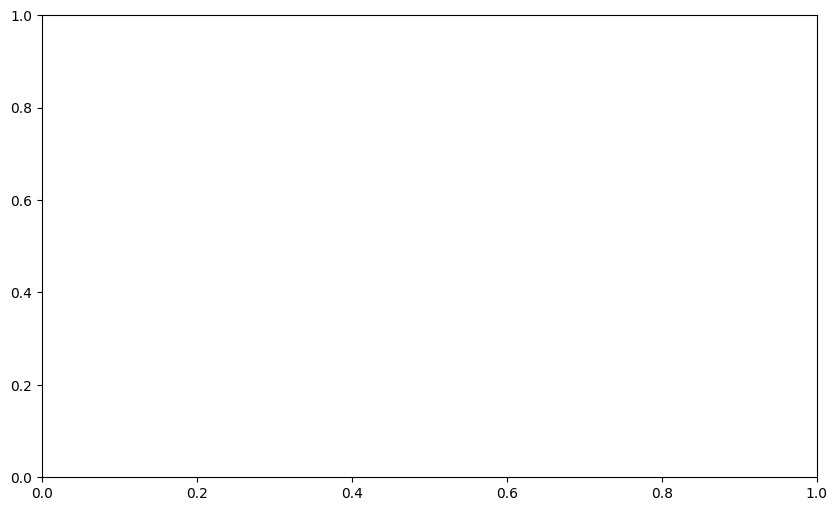

In [ ]:
columnas_a_eliminar = ['RECORD'] #, 'P_atm_q'
#grafica_features(df2, columnas_a_eliminar, eje_x)

#### Quitar datos duplicados de OneMinute

In [ ]:
print('Datos duplicados de OneMinute')
find_duplicate_datetime(df3)
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df3)
print(conteo)

Datos duplicados de OneMinute
Filas duplicadas:
Posición: 289083, Datos: ['2019-12-02 10:58:00', 217163.0, 176.3, 12.3, 71.57, 915.3557, nan]
Posición: 289084, Datos: ['2019-12-02 10:58:00', 217223.0, 818.0, 14.19, 59.81, 914.4789, nan]
Posición: 289085, Datos: ['2019-12-02 10:59:00', 217164.0, 186.2, 12.35, 71.16, 915.3327, nan]
Posición: 289086, Datos: ['2019-12-02 10:59:00', 217224.0, 878.0, 14.28, 60.01, 914.4641, nan]
Posición: 289087, Datos: ['2019-12-02 11:00:00', 217165.0, 196.2, 12.36, 70.68, 915.2973, nan]
Posición: 289088, Datos: ['2019-12-02 11:00:00', 217225.0, 909.0, 14.53, 59.64, 914.4263, nan]
Posición: 289089, Datos: ['2019-12-02 11:01:00', 217226.0, 913.0, 14.52, 59.34, 914.3913, nan]
Posición: 289090, Datos: ['2019-12-02 11:01:00', 217166.0, 203.3, 12.4, 70.68, 915.2645, nan]
Posición: 289091, Datos: ['2019-12-02 11:02:00', 217227.0, 916.0, 14.67, 59.04, 914.3494, nan]
Posición: 289092, Datos: ['2019-12-02 11:02:00', 217167.0, 207.1, 12.45, 70.47, 915.2395, nan]
Posi

In [ ]:
# Supongamos que quieres imprimir las filas del índice 10 al 20
#indice_inicio = 288330 #288330
#indice_fin = 288350    #288438
# Utiliza iloc para seleccionar el rango de filas basado en los índices
#fragmento_df3 = df3.iloc[indice_inicio:indice_fin+1]
# Imprime el fragmento del DataFrame
#print(fragmento_df3)


#print()
#print()
#print()


# Supongamos que quieres imprimir las filas del índice 10 al 20
#indice_inicio2 = 288330-40  #+1440+13 #-1440-32+32# #1459
#indice_fin2 = 288350-40     #+1440+13    #-1440-32+32#    #1461
# Utiliza iloc para seleccionar el rango de filas basado en los índices
#fragmento_df3 = df3.iloc[indice_inicio2:indice_fin2+1]
# Imprime el fragmento del DataFrame
#print(fragmento_df3)



#289083
#289084

#289 090
#289 191


#295279
filas_eliminar = [ 289084,289086, 289088, 289090, 289092, 289094, 289096, 289098 , 289100, 289102, 289104, 289106, 289108, 289110, 289112
                  , 289114, 289116, 289118, 289120, 289122, 289124, 289126, 289128, 289130, 289132, 289134, 289136, 289138, 289140, 289142,
                   289144, 289146, 289148, 289150, 289152, 289154, 289156, 289158, 289160, 289162, 289164, 289166, 289168, 289170, 289172
                   , 289174, 289176, 289180, 289182, 289184, 289186, 289188, 289190

                   , 294018+1261, 294020+1261, 294022+1261, 294024+1261, 294026+1261, 294028+1261, 294030+1261, 294032+1261
                   , 294034+1261, 294036+1261, 294038+1261, 294040+1261, 294042+1261]  # Índice de la fila que deseas eliminar
df3 = df3.drop(filas_eliminar)

print('Datos duplicados de Gases')
find_duplicate_datetime(df3)

Datos duplicados de Gases


In [ ]:
columnas_a_eliminar = ['RECORD'] #, 'P_atm_q'
grafica_features(df3, columnas_a_eliminar, eje_x)

#### Quitar datos duplicados de Particuolas

In [ ]:
print('Datos duplicados de Particualas')
find_duplicate_datetime(df4)
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df4)
print(conteo)

Datos duplicados de Particualas
Conteo de datos faltantes:
{'TIMESTAMP': 0, 'RECORD': 476, 'PM25': 2651, 'PM10': 2651}


In [ ]:
columnas_a_eliminar = ['RECORD']
grafica_features(df4, columnas_a_eliminar, eje_x)

#### Quitar datos duplicados de TenMinutes

In [ ]:
print('Datos duplicados de TenMinutes')
find_duplicate_datetime(df5)
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df5)
print(conteo)

Datos duplicados de TenMinutes
Filas duplicadas:
Posición: 28908, Datos: ['2019-12-02 11:00:00', 21716.0, 13.69, 0.0, 7.321, 9.36, 12.43, 12.43, 937.0, 1442.0, 0.09752341, 12.03, 3.595, 30.39, 35.33, 22.13, '2019-12-02 10:51:36', 10.82]
Posición: 28909, Datos: ['2019-12-02 11:00:00', 21722.0, 13.69, 0.0, 6.643, 9.73, 14.34, 14.34, 944.0, 1633.0, 0.1513964, 11.21, 4.178, 231.6, 130.5, 22.13, '2019-12-02 10:59:40', 91.9]
Posición: 28910, Datos: ['2019-12-02 11:10:00', 21723.0, 13.66, 0.0, 6.743, 9.85, 14.53, 14.53, 956.0, 1653.0, 0.5343848, 14.14, 7.132, 76.25, 97.5, 30.18, '2019-12-02 11:02:54', 30.78]
Posición: 28911, Datos: ['2019-12-02 11:10:00', 21717.0, 13.69, 0.0, 7.238, 9.4, 12.67, 12.67, 956.0, 1464.0, 0.1338844, 11.04, 3.136, 43.86, 39.82, 20.12, '2019-12-02 11:05:08', 16.64]
Posición: 28912, Datos: ['2019-12-02 11:20:00', 21724.0, 13.66, 0.0, 6.581, 9.71, 14.37, 14.37, 973.0, 1636.0, 0.5092618, 16.19, 6.753, 63.19, 17.93, 32.19, '2019-12-02 11:13:14', 52.92]
Posición: 28913, D

In [ ]:
# Supongamos que quieres imprimir las filas del índice 10 al 20
#indice_inicio = 28833-3 #288330
#indice_fin = 28842    #288438
# Utiliza iloc para seleccionar el rango de filas basado en los índices
#fragmento_df5 = df5.iloc[indice_inicio:indice_fin+1]
# Imprime el fragmento del DataFrame
#print(fragmento_df5)


#print()
#print()
#print()


# Supongamos que quieres imprimir las filas del índice 10 al 20
#indice_inicio2 = 28833+146  #+1440+13 #-1440-32+32# #1459
#indice_fin2 = 28842+146    #+1440+13    #-1440-32+32#    #1461
# Utiliza iloc para seleccionar el rango de filas basado en los índices
#fragmento_df5 = df5.iloc[indice_inicio2:indice_fin2+1]
# Imprime el fragmento del DataFrame
#print(fragmento_df5)


filas_eliminar = [ 28908, 28910, 28912, 28916]  # Índice de la fila que deseas eliminar
df5 = df5.drop(filas_eliminar)

print('Datos duplicados de Gases')
find_duplicate_datetime(df5)

Datos duplicados de Gases


In [ ]:
columnas_a_eliminar = ['RECORD','Wind_Speed_TMx'] #, 'P_atm_q'
grafica_features(df5, columnas_a_eliminar, eje_x)

#### Se checan la estadística descriptiva



In [ ]:
print('Datos de OneDay')
df1.describe().T

# Ejemplo de uso:
# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# y deseas eliminar la columna 'Presion' y utilizar la columna 'Fecha' como eje X.
#columnas_a_eliminar = ['RECORD','T_amb_TMx', 'T_amb_TMn']
#eje_x='TIMESTAMP'
#grafica_features_interactivo(df1, columnas_a_eliminar, eje_x)
#

Datos de OneDay


,count,mean,std,min,25%,50%,75%,max
RECORD,1571.0,196.868873,177.048068,0.000,58.00000,138.00000,272.000000,660.00000
Irradiation_Tot,1571.0,19.350863,5.675316,0.000,16.07663,19.70075,23.306285,30.90022
Precipitation_Tot,1571.0,2.729281,6.524830,0.000,0.00000,0.00000,1.900000,58.70000
Sun_Hrs_Tot,1571.0,6.807469,2.676216,0.000,5.14650,7.24100,8.925000,12.13000
T_amb_Max,1571.0,22.448708,2.732848,11.030,20.57000,22.48000,24.325000,29.95000
T_amb_Min,1571.0,12.158283,2.129419,4.454,10.89000,12.47000,13.535000,18.06000


In [ ]:
print('Datos de Gases')
df2.describe().T



# Ejemplo de uso:
# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# y deseas eliminar la columna 'Presion' y utilizar la columna 'Fecha' como eje X.
#columnas_a_eliminar = ['RECORD', 'P_atm_q']
#eje_x='TIMESTAMP'
#grafica_features_interactivo(df2, columnas_a_eliminar, eje_x)

Datos de Gases


,count,mean,std,min,25%,50%,75%,max
RECORD,1989314.0,310118.696581,259983.055775,0.000,98899.000,238678.000,454040.750,951369.000
NO2,1967574.0,0.024775,0.019988,-0.003,0.010,0.021,0.035,0.168
SO2,1967574.0,0.058015,0.033020,-0.003,0.030,0.056,0.083,0.382
CO,1967575.0,0.277578,0.197512,-2.226,0.148,0.233,0.354,2.328
O3,1967575.0,0.029223,0.269244,-0.002,0.008,0.026,0.045,376.000
T_air,1967575.0,16.633709,4.485482,4.700,13.700,16.000,19.400,124.900
P_atm_q,1967575.0,762.513997,5.055465,749.600,757.700,764.200,766.900,2018.000
H_R,1967575.0,61.706008,26.471701,0.000,40.700,59.900,85.400,99.900


In [ ]:
print('Datos de OneMinute')

df3.describe().T


# Ejemplo de uso:
# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# y deseas eliminar la columna 'Presion' y utilizar la columna 'Fecha' como eje X.
#columnas_a_eliminar = ['RECORD','T_amb_TMx', 'T_amb_TMn']
#eje_x='TIMESTAMP'
#grafica_features_interactivo(df3, columnas_a_eliminar, eje_x)

Datos de OneMinute


,count,mean,std,min,25%,50%,75%,max
RECORD,2283282.0,281622.661796,254788.268652,0.0000,81873.0000,196567.5000,389859.7500,951369.0000
Irradiation_Avg,2283282.0,227.287563,336.104902,0.0000,0.0000,2.1970,388.5000,1549.0000
T_amb_Avg,2283282.0,16.409515,3.790033,4.4870,13.7100,15.9000,19.0200,29.8900
RH_Avg,2282857.0,55.590069,23.033110,1.2890,37.3400,54.9400,74.4200,100.0000
P_atm_Avg,2283280.0,773.289542,51.612655,541.4841,752.4766,753.8799,755.4316,917.0163
RH,425.0,48.105624,13.272865,25.2600,35.3600,52.1600,57.5300,68.8200


In [ ]:
print('Datos  de Particualas')

df4.describe().T


# Ejemplo de uso:
# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# y deseas eliminar la columna 'Presion' y utilizar la columna 'Fecha' como eje X.
#columnas_a_eliminar = ['RECORD','T_amb_TMx', 'T_amb_TMn']
#eje_x='TIMESTAMP'
#grafica_features_interactivo(df4, columnas_a_eliminar, eje_x)

Datos  de Particualas


,count,mean,std,min,25%,50%,75%,max
RECORD,198916.0,31012.798397,25997.358967,0.0,9891.0,23869.0,45405.25,95134.0
PM25,196741.0,1.847107,2.142282,0.0,0.3,1.4,2.80,147.2
PM10,196741.0,16.803241,17.447362,0.0,6.4,13.1,23.00,1797.1


In [ ]:
print('Datos de TenMinutes')

df5.describe().T


# Ejemplo de uso:
# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# y deseas eliminar la columna 'Presion' y utilizar la columna 'Fecha' como eje X.
#columnas_a_eliminar = ['RECORD','T_amb_TMx', 'T_amb_TMn']
#eje_x='TIMESTAMP'
#grafica_features_interactivo(df5, columnas_a_eliminar, eje_x)

Datos de TenMinutes


,count,mean,std,min,25%,50%,75%,max
RECORD,227940.0,28208.484408,25473.811897,0.000,8235.000,19704.000000,39033.000000,95134.000000
BattV_Min,227940.0,13.611663,0.098328,12.670,13.550,13.610000,13.680000,13.960000
Precipitation_Tot,227940.0,0.019507,0.238298,0.000,0.000,0.000000,0.000000,17.100000
Dew_Point_Avg,227940.0,6.010621,5.577400,-28.100,2.904,6.953000,10.390000,16.030000
T_Wet_Bulb_Avg,227940.0,10.497650,2.551116,-1.078,8.750,10.940000,12.530000,16.110000
Heat_Inedx_Avg,227940.0,16.413945,3.785387,4.536,13.710,15.900000,19.030000,29.410000
Wind_Chill_Avg,227940.0,16.389640,3.838797,2.346,13.710,15.900000,19.030000,29.410000
Pot_Irradiation_Avg,227940.0,13.996668,887.560742,-1373.000,-852.000,19.725000,880.000000,1373.000000
P_Sat_vap_Avg,227898.0,1914.506933,477.242125,844.000,1568.000,1806.000000,2200.000000,4101.000000
Irradiation_Tot,227940.0,0.136382,0.198485,0.000,0.000,0.001449,0.248869,0.781687


In [ ]:
df1['TIMESTAMP'] = pd.to_datetime(df1['TIMESTAMP'])
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'])
df3['TIMESTAMP'] = pd.to_datetime(df3['TIMESTAMP'])
df4['TIMESTAMP'] = pd.to_datetime(df4['TIMESTAMP'])
df5['TIMESTAMP'] = pd.to_datetime(df5['TIMESTAMP'])

tiempo_minutos = 1440  # Cambiar el valor según la diferencia deseada

lapsos_mayores1 = encontrar_lapsos_mayores(df1, tiempo_minutos)
print(f"Fechas faltantes en OneDay mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores1)


tiempo_minutos = 1  # Cambiar el valor según la diferencia deseada

lapsos_mayores2 = encontrar_lapsos_mayores(df2, tiempo_minutos)
print(f"Fechas faltantes en Gases mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores2)



print('--'*100)


lapsos_mayores3 = encontrar_lapsos_mayores(df3, tiempo_minutos)
print(f"Fechas faltantes en OneMinute mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores3)



print('--'*100)
tiempo_minutos2 = 10  # Cambiar el valor según la diferencia deseada


lapsos_mayores4 = encontrar_lapsos_mayores(df4, tiempo_minutos2)
print(f"Fechas faltantes en Particulas mayor a {tiempo_minutos2} minutos:")
print(lapsos_mayores4)



print('--'*100)


lapsos_mayores5 = encontrar_lapsos_mayores(df5, tiempo_minutos2)
print(f"Fechas faltantes en TenMinutes mayor a {tiempo_minutos2} minutos:")
print(lapsos_mayores5)

Número de renglones agregados: 0
Fechas faltantes en OneDay mayor a 1440 minutos:
      TIMESTAMP  RECORD  Irradiation_Tot  Precipitation_Tot  Sun_Hrs_Tot  \
0    2019-05-17     0.0         6.531803                1.4        1.380   
1    2019-05-18     1.0        14.763410                2.0        5.017   
2    2019-05-19     2.0        20.534910                0.6        6.203   
3    2019-05-20     3.0        28.618850                0.0        9.730   
4    2019-05-21     4.0        24.493100                0.0        7.941   
...         ...     ...              ...                ...          ...   
1584 2023-09-17    71.0        15.822290                3.3        3.972   
1585 2023-09-18    72.0        16.951000                4.5        4.321   
1586 2023-09-19    73.0        16.061230               28.5        3.940   
1587 2023-09-20    74.0        23.734400                9.5        7.742   
1588 2023-09-21    75.0        27.389720                0.0       10.710   

     

## Detección de valores atípicos

### Valores atípicos de OneDay (df1)




In [ ]:
# Aplicar la función para eliminar valores atípicos y contarlos
df1_sin_atipicos_rango, atipicos1_por_columna = eliminar_atipicos_rango(df1)

print("DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:")
print(df1_sin_atipicos_rango)

print("\nCantidad de valores atípicos por columna:")
print(atipicos1_por_columna)

#df1_sin_atipicos_rango = eliminar_atipicos_rango(df1)
#print("\nDataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:")
#print(df1_sin_atipicos_rango)

DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:
      TIMESTAMP  RECORD  Irradiation_Tot  Precipitation_Tot  Sun_Hrs_Tot  \
0    2019-05-17     0.0              NaN                1.4          NaN   
1    2019-05-18     1.0         14.76341                2.0        5.017   
2    2019-05-19     2.0         20.53491                0.6        6.203   
3    2019-05-20     3.0         28.61885                0.0        9.730   
4    2019-05-21     4.0         24.49310                0.0        7.941   
...         ...     ...              ...                ...          ...   
1599 2023-09-17    71.0         15.82229                3.3        3.972   
1600 2023-09-18    72.0         16.95100                4.5        4.321   
1601 2023-09-19    73.0         16.06123                NaN        3.940   
1602 2023-09-20    74.0         23.73440                9.5        7.742   
1603 2023-09-21    75.0         27.38972                0.0       10.710 

<ipython-input-4-9f950591c337>:79: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = df.mean()
<ipython-input-4-9f950591c337>:79: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
<ipython-input-4-9f950591c337>:80: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = df.std()
<ipython-input-4-9f950591c337>:83: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError

In [ ]:
# Ruta donde se guardará el archivo CSV
OneDay_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/OneDay_sin_duplicados_atipicos.csv'


# Guardar el DataFrame combinado en un archivo CSV
df1_sin_atipicos_rango.to_csv(OneDay_sin_duplicados_atipicos_csv, index=False)

### Valores atípicos de Gases (df2)


In [ ]:
# Aplicar la función para eliminar valores atípicos y contarlos
df2_sin_atipicos_rango, atipicos2_por_columna = eliminar_atipicos_rango(df2)

print("DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:")
print(df2_sin_atipicos_rango)

print("\nCantidad de valores atípicos por columna:")
print(atipicos2_por_columna)

#df2_sin_atipicos_rango = eliminar_atipicos_rango(df2)
#print("\nDataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:")
#print(df2_sin_atipicos_rango)

<ipython-input-4-9f950591c337>:79: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = df.mean()
<ipython-input-4-9f950591c337>:83: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_bound) | (upper_bound < df)


DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:
                  TIMESTAMP    RECORD    NO2    SO2     CO     O3  T_air  \
0       2019-12-06 17:23:00       3.0  0.002  0.001  0.110 -0.001   20.5   
1       2019-12-06 17:24:00       4.0  0.002  0.001  0.113 -0.002   20.5   
2       2019-12-06 17:25:00       5.0  0.003  0.000  0.116  0.000   20.5   
3       2019-12-06 17:26:00       6.0  0.003  0.000  0.119  0.000   20.5   
4       2019-12-06 17:27:00       7.0  0.003  0.000  0.122 -0.001   20.4   
...                     ...       ...    ...    ...    ...    ...    ...   
1993932 2023-09-21 09:26:00  109036.0  0.017  0.085  0.454  0.020   17.2   
1993933 2023-09-21 09:27:00  109037.0  0.015  0.085  0.453  0.022   16.8   
1993934 2023-09-21 09:28:00  109038.0  0.015  0.084  0.451  0.025   17.4   
1993935 2023-09-21 09:29:00  109039.0  0.015  0.084  0.447  0.027   17.2   
1993936 2023-09-21 09:30:00  109040.0  0.015  0.083  0.442  0.027   17.7 

In [ ]:
# Ruta donde se guardará el archivo CSV
Gases_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/Gases_sin_duplicados_atipicos.csv'


# Guardar el DataFrame combinado en un archivo CSV
df2_sin_atipicos_rango.to_csv(Gases_sin_duplicados_atipicos_csv, index=False)

### Valores atípicos de OneMinute (df3)

In [ ]:
# Aplicar la función para eliminar valores atípicos y contarlos
df3_sin_atipicos_rango, atipicos3_por_columna = eliminar_atipicos_rango(df3)

print("DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:")
print(df3_sin_atipicos_rango)

print("\nCantidad de valores atípicos por columna:")
print(atipicos3_por_columna)

#df2_sin_atipicos_rango = eliminar_atipicos_rango(df2)
#print("\nDataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:")
#print(df2_sin_atipicos_rango)

<ipython-input-4-9f950591c337>:79: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = df.mean()
<ipython-input-4-9f950591c337>:83: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_bound) | (upper_bound < df)


DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:
                  TIMESTAMP    RECORD  Irradiation_Avg  T_amb_Avg  RH_Avg  \
0       2019-05-15 16:55:00       9.0            316.1        NaN     NaN   
1       2019-05-15 16:56:00      10.0            250.0        NaN     NaN   
2       2019-05-15 16:57:00      11.0            235.1        NaN     NaN   
3       2019-05-15 16:58:00      12.0            148.9        NaN     NaN   
4       2019-05-15 16:59:00      13.0            134.8        NaN     NaN   
...                     ...       ...              ...        ...     ...   
2289218 2023-09-21 09:27:00  109037.0            693.6      16.87   64.32   
2289219 2023-09-21 09:28:00  109038.0            697.1      16.95   64.15   
2289220 2023-09-21 09:29:00  109039.0            702.3      17.16   64.30   
2289221 2023-09-21 09:30:00  109040.0            706.0      17.51   63.80   
2289222 2023-09-21 09:31:00  109041.0            709.3      17

In [ ]:
# Ruta donde se guardará el archivo CSV
OneMinute_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/OneMinute_sin_duplicados_atipicos.csv'


# Guardar el DataFrame combinado en un archivo CSV
df3_sin_atipicos_rango.to_csv(OneMinute_sin_duplicados_atipicos_csv, index=False)

### Valores atípicos de Particualas (df4)

In [ ]:
# Aplicar la función para eliminar valores atípicos y contarlos
df4_sin_atipicos_rango, atipicos4_por_columna = eliminar_atipicos_rango(df4)

print("DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:")
print(df4_sin_atipicos_rango)

print("\nCantidad de valores atípicos por columna:")
print(atipicos4_por_columna)


DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:
                 TIMESTAMP   RECORD  PM25  PM10
0      2019-12-06 17:40:00      2.0   NaN   NaN
1      2019-12-06 17:50:00      NaN   NaN   NaN
2      2019-12-06 18:00:00      NaN   NaN   NaN
3      2019-12-06 18:10:00      NaN   NaN   NaN
4      2019-12-06 18:20:00      NaN   NaN   NaN
...                    ...      ...   ...   ...
199387 2023-09-21 08:50:00  10900.0   0.4  18.3
199388 2023-09-21 09:00:00  10901.0   0.3  13.6
199389 2023-09-21 09:10:00  10902.0   0.4  10.2
199390 2023-09-21 09:20:00  10903.0   0.5  10.2
199391 2023-09-21 09:30:00  10904.0   0.7  11.7

[199392 rows x 4 columns]

Cantidad de valores atípicos por columna:
PM10          4730
PM25          5083
RECORD       12127
TIMESTAMP        0
dtype: int64


<ipython-input-4-9f950591c337>:79: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = df.mean()
<ipython-input-4-9f950591c337>:83: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_bound) | (upper_bound < df)


In [ ]:
# Ruta donde se guardará el archivo CSV
Particualas_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/Particualas_sin_duplicados_atipicos.csv'


# Guardar el DataFrame combinado en un archivo CSV
df4_sin_atipicos_rango.to_csv(Particualas_sin_duplicados_atipicos_csv, index=False)


### Valores atípicos de TenMinutes (df5)

In [ ]:
# Aplicar la función para eliminar valores atípicos y contarlos
df5_sin_atipicos_rango, atipicos5_por_columna = eliminar_atipicos_rango(df5)

print("DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:")
print(df5_sin_atipicos_rango)

print("\nCantidad de valores atípicos por columna:")
print(atipicos5_por_columna)


<ipython-input-4-9f950591c337>:79: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = df.mean()
<ipython-input-4-9f950591c337>:79: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
<ipython-input-4-9f950591c337>:80: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = df.std()
<ipython-input-4-9f950591c337>:83: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError

DataFrame después de eliminar atípicos con rango [media - desviación, media + desviación]:
                 TIMESTAMP   RECORD  BattV_Min  Precipitation_Tot  \
0      2019-05-15 17:00:00      1.0        NaN                0.0   
1      2019-05-15 17:10:00      2.0        NaN                0.0   
2      2019-05-15 17:20:00      3.0        NaN                0.0   
3      2019-05-15 17:30:00      4.0        NaN                0.0   
4      2019-05-15 17:40:00      5.0        NaN                0.0   
...                    ...      ...        ...                ...   
228915 2023-09-21 08:50:00  10900.0      13.49                0.0   
228916 2023-09-21 09:00:00  10901.0      13.48                0.0   
228917 2023-09-21 09:10:00  10902.0      13.48                0.0   
228918 2023-09-21 09:20:00  10903.0      13.49                0.0   
228919 2023-09-21 09:30:00  10904.0      13.49                0.0   

        Dew_Point_Avg  T_Wet_Bulb_Avg  Heat_Inedx_Avg  Wind_Chill_Avg  \
0      

In [ ]:
# Ruta donde se guardará el archivo CSV
TenMinutes_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/TenMinutes_sin_duplicados_atipicos.csv'


# Guardar el DataFrame combinado en un archivo CSV
df5_sin_atipicos_rango.to_csv(TenMinutes_sin_duplicados_atipicos_csv, index=False)


#### Se checan la estadística descriptiva



In [ ]:
print('Datos de OneDay')
df1_sin_atipicos_rango.describe().T

Datos de OneDay


,count,mean,std,min,25%,50%,75%,max
RECORD,1461.0,166.102669,141.788200,0.000000,54.0000,124.00000,237.000000,550.00000
Irradiation_Tot,1512.0,19.925629,4.889716,8.137508,16.6036,19.93787,23.480705,30.56686
Precipitation_Tot,1485.0,1.411650,2.986863,0.000000,0.0000,0.00000,0.900000,15.50000
Sun_Hrs_Tot,1501.0,7.097642,2.365008,1.470000,5.4730,7.36800,9.000000,12.13000
T_amb_Max,1498.0,22.511195,2.371927,17.030000,20.7625,22.49000,24.250000,27.87000
T_amb_Min,1488.0,12.267613,1.804481,7.904000,11.1075,12.50000,13.520000,16.41000


In [ ]:
print('Datos de Gases')
df2_sin_atipicos_rango.describe().T

Datos de Gases


,count,mean,std,min,25%,50%,75%,max
RECORD,1868029.0,272421.702541,220435.507032,0.000,92834.000,218464.000,381124.000,830084.000
NO2,1872073.0,0.021960,0.015695,-0.003,0.010,0.019,0.032,0.064
SO2,1923005.0,0.056174,0.031025,-0.003,0.030,0.055,0.082,0.124
CO,1873389.0,0.248491,0.144736,-0.117,0.144,0.224,0.330,0.672
O3,1967574.0,0.029032,0.025500,-0.002,0.008,0.026,0.045,0.182
T_air,1932798.0,16.500598,3.808053,7.700,13.700,16.000,19.300,25.600
P_atm_q,1962540.0,762.537881,4.951785,752.500,757.700,764.200,766.900,772.600
H_R,1946999.0,62.301967,25.963988,8.800,41.300,60.300,85.700,99.900


In [ ]:
print('Datos de OneMinute')

df3_sin_atipicos_rango.describe().T

Datos de OneMinute


,count,mean,std,min,25%,50%,75%,max
RECORD,2123112.0,237137.897627,203576.331897,0.0000,75199.0000,176546.0000,339914.2500,791199.000
Irradiation_Avg,2115924.0,164.909076,261.424179,0.0000,0.0000,0.0000,261.3000,899.000
T_amb_Avg,2184655.0,16.242223,3.391854,8.8300,13.7200,15.8000,18.7300,23.980
RH_Avg,2263803.0,55.996030,22.698518,9.5300,37.7800,55.2500,74.5900,100.000
P_atm_Avg,1989337.0,753.466985,1.864541,710.9949,752.2514,753.5467,754.7324,875.279
RH,425.0,48.105624,13.272865,25.2600,35.3600,52.1600,57.5300,68.820


In [ ]:
print('Datos  de Particualas')

df4_sin_atipicos_rango.describe().T

Datos  de Particualas


,count,mean,std,min,25%,50%,75%,max
RECORD,186789.0,27243.455391,22043.052404,0.0,9285.0,21848.0,38113.0,83007.0
PM25,191658.0,1.668153,1.495224,0.0,0.3,1.3,2.6,6.1
PM10,192011.0,15.390225,11.403289,0.0,6.2,12.7,22.1,51.6


In [ ]:
print('Datos de TenMinutes')

df5_sin_atipicos_rango.describe().T

Datos de TenMinutes


,count,mean,std,min,25%,50%,75%,max
RECORD,211962.0,23765.727522,20362.846079,0.000,7569.000,17707.000000,34032.00000,79156.000000
BattV_Min,216615.0,13.614626,0.084174,13.420,13.550,13.620000,13.68000,13.800000
Precipitation_Tot,225667.0,0.003599,0.029230,0.000,0.000,0.000000,0.00000,0.400000
Dew_Point_Avg,218115.0,6.703804,4.554282,-5.144,3.506,7.301000,10.50000,16.030000
T_Wet_Bulb_Avg,219652.0,10.736087,2.257987,5.396,9.020,11.070000,12.58000,15.590000
Heat_Inedx_Avg,218102.0,16.249063,3.388737,8.850,13.730,15.810000,18.74000,23.980000
Wind_Chill_Avg,216937.0,16.309140,3.370427,8.720,13.780,15.860000,18.78000,24.060000
Pot_Irradiation_Avg,227940.0,13.996668,887.560742,-1373.000,-852.000,19.725000,880.00000,1373.000000
P_Sat_vap_Avg,217351.0,1858.541654,405.355728,961.000,1559.000,1780.000000,2133.00000,2868.000000
Irradiation_Tot,212230.0,0.102274,0.159080,0.000,0.000,0.000022,0.16978,0.533348


In [ ]:
df1['TIMESTAMP'] = pd.to_datetime(df1['TIMESTAMP'])
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'])
df3['TIMESTAMP'] = pd.to_datetime(df3['TIMESTAMP'])
df4['TIMESTAMP'] = pd.to_datetime(df4['TIMESTAMP'])
df5['TIMESTAMP'] = pd.to_datetime(df5['TIMESTAMP'])

tiempo_minutos = 1440  # Cambiar el valor según la diferencia deseada

lapsos_mayores1 = encontrar_lapsos_mayores(df1, tiempo_minutos)
print(f"Fechas faltantes en OneDay mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores1)


tiempo_minutos = 1  # Cambiar el valor según la diferencia deseada

lapsos_mayores2 = encontrar_lapsos_mayores(df2, tiempo_minutos)
print(f"Fechas faltantes en Gases mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores2)



print('--'*100)


lapsos_mayores3 = encontrar_lapsos_mayores(df3, tiempo_minutos)
print(f"Fechas faltantes en OneMinute mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores3)



print('--'*100)
tiempo_minutos2 = 10  # Cambiar el valor según la diferencia deseada


lapsos_mayores4 = encontrar_lapsos_mayores(df4, tiempo_minutos2)
print(f"Fechas faltantes en Particulas mayor a {tiempo_minutos2} minutos:")
print(lapsos_mayores4)



print('--'*100)


lapsos_mayores5 = encontrar_lapsos_mayores(df5, tiempo_minutos2)
print(f"Fechas faltantes en TenMinutes mayor a {tiempo_minutos2} minutos:")
print(lapsos_mayores5)

Número de renglones agregados: 0
Fechas faltantes en OneDay mayor a 1440 minutos:
      TIMESTAMP  RECORD  Irradiation_Tot  Precipitation_Tot  Sun_Hrs_Tot  \
0    2019-05-17     0.0              NaN                1.4          NaN   
1    2019-05-18     1.0         14.76341                2.0        5.017   
2    2019-05-19     2.0         20.53491                0.6        6.203   
3    2019-05-20     3.0         28.61885                0.0        9.730   
4    2019-05-21     4.0         24.49310                0.0        7.941   
...         ...     ...              ...                ...          ...   
1584 2023-09-17    71.0         15.82229                3.3        3.972   
1585 2023-09-18    72.0         16.95100                4.5        4.321   
1586 2023-09-19    73.0         16.06123                NaN        3.940   
1587 2023-09-20    74.0         23.73440                9.5        7.742   
1588 2023-09-21    75.0         27.38972                0.0       10.710   

     

ConversionError: ignored

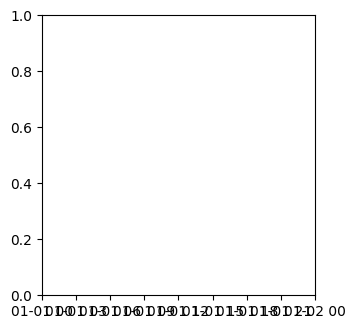

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Rutas de los archivos CSV
Data_OneDay_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_OneDay_Unido.csv'
Data_Gases_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_Gases_Unido.csv'
Data_OneMinute_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_OneMinute_Unido.csv'
Data_Particualas_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_Particualas_Unido.csv'
Data_TenMinutes_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Con_Fechas_TenMinutes_Unido.csv'

# Cargar los archivos CSV en DataFrames
df1 = pd.read_csv(Data_OneDay_Unido_csv, parse_dates=['TIMESTAMP'])
df2 = pd.read_csv(Data_Gases_Unido_csv, parse_dates=['TIMESTAMP'])
df3 = pd.read_csv(Data_OneMinute_Unido_csv, parse_dates=['TIMESTAMP'])
df4 = pd.read_csv(Data_Particualas_Unido_csv, parse_dates=['TIMESTAMP'])
df5 = pd.read_csv(Data_TenMinutes_Unido_csv, parse_dates=['TIMESTAMP'])

# Filtrar por el rango de fechas
start_date = '2022-12-01 00:00:00'
end_date = '2022-12-31 23:59:59'

df1_filtered = df1[(df1['TIMESTAMP'] >= start_date) & (df1['TIMESTAMP'] <= end_date)]
df2_filtered = df2[(df2['TIMESTAMP'] >= start_date) & (df2['TIMESTAMP'] <= end_date)]
df3_filtered = df3[(df3['TIMESTAMP'] >= start_date) & (df3['TIMESTAMP'] <= end_date)]
df4_filtered = df4[(df4['TIMESTAMP'] >= start_date) & (df4['TIMESTAMP'] <= end_date)]
df5_filtered = df5[(df5['TIMESTAMP'] >= start_date) & (df5['TIMESTAMP'] <= end_date)]

# Crear gráficas para cada DataFrame
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(df1_filtered['TIMESTAMP'], df1_filtered.drop(columns=['TIMESTAMP']))
plt.title('Data_OneDay_Unido')

plt.subplot(2, 3, 2)
plt.plot(df2_filtered['TIMESTAMP'], df2_filtered.drop(columns=['TIMESTAMP']))
plt.title('Data_Gases_Unido')

plt.subplot(2, 3, 3)
plt.plot(df3_filtered['TIMESTAMP'], df3_filtered.drop(columns=['TIMESTAMP']))
plt.title('Data_OneMinute_Unido')

plt.subplot(2, 3, 4)
plt.plot(df4_filtered['TIMESTAMP'], df4_filtered.drop(columns=['TIMESTAMP']))
plt.title('Data_Particualas_Unido')

plt.subplot(2, 3, 5)
plt.plot(df5_filtered['TIMESTAMP'], df5_filtered.drop(columns=['TIMESTAMP']))
plt.title('Data_TenMinutes_Unido')

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()


## Rellenado de datos vacíos en cada tipo de archivo de forma separada

In [ ]:
OneDay_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/OneDay_sin_duplicados_atipicos.csv'
Gases_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/Gases_sin_duplicados_atipicos.csv'
OneMinute_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/OneMinute_sin_duplicados_atipicos.csv'
Particualas_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/Particualas_sin_duplicados_atipicos.csv'
TenMinutes_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Sin_duplicados_atipicos/TenMinutes_sin_duplicados_atipicos.csv'


df1_semilimpio = pd.read_csv(OneDay_sin_duplicados_atipicos_csv)#
df2_semilimpio = pd.read_csv(Gases_sin_duplicados_atipicos_csv)#
df3_semilimpio = pd.read_csv(OneMinute_sin_duplicados_atipicos_csv)#
df4_semilimpio = pd.read_csv(Particualas_sin_duplicados_atipicos_csv)#
df5_semilimpio = pd.read_csv(TenMinutes_sin_duplicados_atipicos_csv)#


columnas_a_eliminar1 = ['RECORD','T_amb_TMx', 'T_amb_TMn']#OneDay
df1_semilimpio = df1_semilimpio.drop(columnas_a_eliminar1, axis=1)

columnas_a_eliminar2 = ['RECORD'] #, 'P_atm_q'            #Gases
df2_semilimpio = df2_semilimpio.drop(columnas_a_eliminar2, axis=1)

columnas_a_eliminar3 = ['RECORD']                         #OneMinute
df3_semilimpio = df3_semilimpio.drop(columnas_a_eliminar3, axis=1)

columnas_a_eliminar4 = ['RECORD']                         #Particuolas
df4_semilimpio = df4_semilimpio.drop(columnas_a_eliminar4, axis=1)

columnas_a_eliminar5 = ['RECORD', 'Wind_Speed_TMx']       #TenMinutes
df5_semilimpio = df5_semilimpio.drop(columnas_a_eliminar5, axis=1)

In [ ]:
df1_semilimpio['TIMESTAMP'] = pd.to_datetime(df1_semilimpio['TIMESTAMP'])
df2_semilimpio['TIMESTAMP'] = pd.to_datetime(df2_semilimpio['TIMESTAMP'])
df3_semilimpio['TIMESTAMP'] = pd.to_datetime(df3_semilimpio['TIMESTAMP'])
df4_semilimpio['TIMESTAMP'] = pd.to_datetime(df4_semilimpio['TIMESTAMP'])
df5_semilimpio['TIMESTAMP'] = pd.to_datetime(df5_semilimpio['TIMESTAMP'])

tiempo_minutos = 1440  # Cambiar el valor según la diferencia deseada

lapsos_mayores1 = encontrar_lapsos_mayores(df1_semilimpio, tiempo_minutos)
print(f"Fechas faltantes en OneDay mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores1)


tiempo_minutos = 1  # Cambiar el valor según la diferencia deseada

lapsos_mayores2 = encontrar_lapsos_mayores(df2_semilimpio, tiempo_minutos)
print(f"Fechas faltantes en Gases mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores2)



print('--'*100)


lapsos_mayores3 = encontrar_lapsos_mayores(df3_semilimpio, tiempo_minutos)
print(f"Fechas faltantes en OneMinute mayor a {tiempo_minutos} minutos:")
print(lapsos_mayores3)



print('--'*100)
tiempo_minutos2 = 10  # Cambiar el valor según la diferencia deseada


lapsos_mayores4 = encontrar_lapsos_mayores(df4_semilimpio, tiempo_minutos2)
print(f"Fechas faltantes en Particulas mayor a {tiempo_minutos2} minutos:")
print(lapsos_mayores4)



print('--'*100)


lapsos_mayores5 = encontrar_lapsos_mayores(df5_semilimpio, tiempo_minutos2)
print(f"Fechas faltantes en TenMinutes mayor a {tiempo_minutos2} minutos:")
print(lapsos_mayores5)

Número de renglones agregados: 0
Fechas faltantes en OneDay mayor a 1440 minutos:
      TIMESTAMP  Irradiation_Tot  Precipitation_Tot  Sun_Hrs_Tot  T_amb_Max  \
0    2019-05-17              NaN                1.4          NaN      24.65   
1    2019-05-18         14.76341                2.0        5.017      22.88   
2    2019-05-19         20.53491                0.6        6.203      25.68   
3    2019-05-20         28.61885                0.0        9.730      27.05   
4    2019-05-21         24.49310                0.0        7.941      26.47   
...         ...              ...                ...          ...        ...   
1584 2023-09-17         15.82229                3.3        3.972      23.52   
1585 2023-09-18         16.95100                4.5        4.321      22.32   
1586 2023-09-19         16.06123                NaN        3.940      22.49   
1587 2023-09-20         23.73440                9.5        7.742      24.25   
1588 2023-09-21         27.38972                0

In [ ]:
#OneDay
print("Conteo de datos faltantes OneDay:")
conteo, posiciones = conteo_de_datos_vacios(df1_semilimpio)
print(conteo)

#, 'P_atm_q'            #Gases
print("Conteo de datos faltantes Gases:")
conteo, posiciones = conteo_de_datos_vacios(df2_semilimpio)
print(conteo)

#OneMinute
print("Conteo de datos faltantes OneMinute:")
conteo, posiciones = conteo_de_datos_vacios(df3_semilimpio)
print(conteo)

#Particuolas
print("Conteo de datos faltantes Particuolas:")
conteo, posiciones = conteo_de_datos_vacios(df4_semilimpio)
print(conteo)

#TenMinutes
print("Conteo de datos faltantes TenMinutes:")
conteo, posiciones = conteo_de_datos_vacios(df5_semilimpio)
print(conteo)

Conteo de datos faltantes OneDay:
{'TIMESTAMP': 0, 'Irradiation_Tot': 77, 'Precipitation_Tot': 104, 'Sun_Hrs_Tot': 88, 'T_amb_Max': 91, 'T_amb_Min': 101}
Conteo de datos faltantes Gases:
{'TIMESTAMP': 0, 'NO2': 121855, 'SO2': 70923, 'CO': 120539, 'O3': 26354, 'T_air': 61130, 'P_atm_q': 31388, 'H_R': 46929}
Conteo de datos faltantes OneMinute:
{'TIMESTAMP': 0, 'Irradiation_Avg': 173233, 'T_amb_Avg': 104502, 'RH_Avg': 25354, 'P_atm_Avg': 299820, 'RH': 2288732}
Conteo de datos faltantes Particuolas:
{'TIMESTAMP': 0, 'PM25': 7734, 'PM10': 7381}
Conteo de datos faltantes TenMinutes:
{'TIMESTAMP': 0, 'BattV_Min': 12301, 'Precipitation_Tot': 3249, 'Dew_Point_Avg': 10801, 'T_Wet_Bulb_Avg': 9264, 'Heat_Inedx_Avg': 10814, 'Wind_Chill_Avg': 11979, 'Pot_Irradiation_Avg': 976, 'P_Sat_vap_Avg': 11565, 'Irradiation_Tot': 16686, 'Wind_Speed_Avg': 9106, 'Wind_Speed_Std': 8701, 'Wind_Direction_Avg': 1404, 'Wind_Direction_Std': 8383, 'Wind_Speed_Max': 9603, 'Wind_Direction_SMM': 976}


### KNN, K-vecino más cercanos

#### OneDay K-vecinos

In [ ]:
# Lista de columnas a rellenar
columnas_a_rellenar=['Irradiation_Tot', 'Precipitation_Tot', 'Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min']

# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Ajusta el número de vecinos según tus necesidades

# Aplicar KNNImputer a las columnas restantes
df1_semilimpio[columnas_a_rellenar] = imputer.fit_transform(df1_semilimpio[columnas_a_rellenar])

# Guardar el DataFrame resultante en un archivo CSV
Data_relleno_OneDay_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_OneDay.csv'
df1_semilimpio.to_csv(Data_relleno_OneDay_csv, index=False)

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Crear un DataFrame de ejemplo con valores faltantes
data = {'Columna1': [1, 2, None, 4, 5],
        'Columna2': [7,8, 10, None, 11]}
df = pd.DataFrame(data)

# Imprimir DataFrame original
print("DataFrame original:")
print(df)

# Inicializar el imputador KNN
knn_imputer = KNNImputer(n_neighbors=2)

# Realizar la imputación de valores
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Imprimir DataFrame con valores imputados
print("\nDataFrame con valores imputados:")
print(df_imputed)


DataFrame original:
   Columna2
0       7.0
1       8.0
2      10.0
3       NaN
4      11.0
5      10.0
6      10.0

DataFrame con valores imputados:
    Columna2
0   7.000000
1   8.000000
2  10.000000
3   9.333333
4  11.000000
5  10.000000
6  10.000000


DataFrame Antes de la imputación:
   Irradiation_Tot  Precipitation_Tot
0              1.0                7.0
1              2.0                8.0
2              NaN               10.0
3              4.0                NaN
4              5.0               11.0
5              8.0                NaN
6              9.0               13.0
DataFrame después de la imputación:
   Irradiation_Tot  Precipitation_Tot
0              1.0                7.0
1              2.0                8.0
2              3.5               10.0
3              4.0                9.5
4              5.0               11.0
5              8.0               12.0
6              9.0               13.0


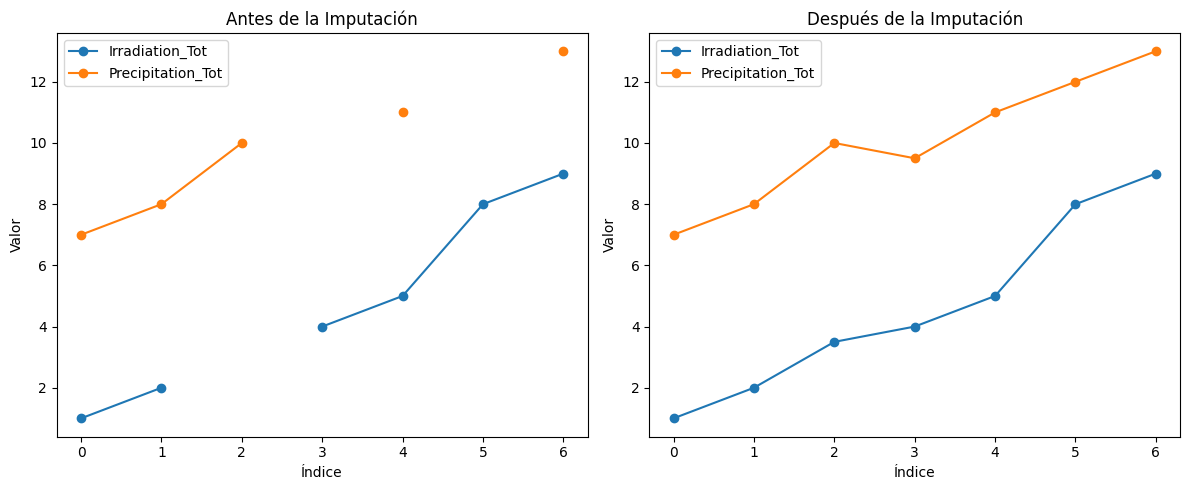

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Crear un DataFrame de ejemplo con valores faltantes
data = {'Irradiation_Tot': [1, 2, None, 4, 5, 8, 9]
        ,'Precipitation_Tot': [7,8, 10, None, 11,None,13]
        }#,'HOLA': [15, 20, 25, 30, 22, None, 18, 14, 15, 5]

df1_semilimpio = pd.DataFrame(data)

# Imprimir el DataFrame
print("DataFrame Antes de la imputación:")
print(df1_semilimpio)

# Lista de columnas a rellenar
columnas_a_rellenar = ['Irradiation_Tot', 'Precipitation_Tot']#,'HOLA'

# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Aplicar KNNImputer a las columnas restantes
df1_semilimpio[columnas_a_rellenar] = imputer.fit_transform(df1_semilimpio[columnas_a_rellenar])



# Imprimir el DataFrame
print("DataFrame después de la imputación:")
print(df1_semilimpio)

# Crear gráficas antes y después de la imputación
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Gráfica antes de la imputación
df1_semilimpio_original = pd.DataFrame(data)
df1_semilimpio_original.plot(ax=axes[0], style='o-', title='Antes de la Imputación')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Gráfica después de la imputación
df1_semilimpio.plot(ax=axes[1], style='o-', title='Después de la Imputación')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

plt.tight_layout()
plt.show()


In [ ]:
Data_relleno_OneDay_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_OneDay.csv'
df1_semilimpio = pd.read_csv(Data_relleno_OneDay_csv)#
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df1_semilimpio)
print(conteo)



Conteo de datos faltantes:
{'TIMESTAMP': 0, 'Irradiation_Tot': 0, 'Precipitation_Tot': 0, 'Sun_Hrs_Tot': 0, 'T_amb_Max': 0, 'T_amb_Min': 0}


#### Gases K-vecinos

In [ ]:
# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Ajusta el número de vecinos según tus necesidades

# Lista de columnas a rellenar
columnas_a_rellenar=['NO2', 'SO2']#, 'CO', 'O3','T_air', 'P_atm_q']#, 'H_R',]
# Aplicar KNNImputer a las columnas restantes
df2_semilimpio[columnas_a_rellenar] = imputer.fit_transform(df2_semilimpio[columnas_a_rellenar])

# Guardar el DataFrame resultante en un archivo CSV
Data_relleno_Gases_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases_rellenado_NO2_SO2.csv'
df2_semilimpio.to_csv(Data_relleno_Gases_csv, index=False)

In [ ]:
Data_relleno_Gases_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases_rellenado_NO2_SO2.csv'
df2_semilimpio = pd.read_csv(Data_relleno_Gases_csv)#
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df2_semilimpio)
print(conteo)

Conteo de datos faltantes:
{'TIMESTAMP': 0, 'NO2': 0, 'SO2': 0, 'CO': 120539, 'O3': 26354, 'T_air': 61130, 'P_atm_q': 31388, 'H_R': 46929}


In [ ]:
Gases_sin_duplicados_atipicos_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases_rellenado_NO2_SO2.csv'
df2_semilimpio = pd.read_csv(Gases_sin_duplicados_atipicos_csv)#

# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Ajusta el número de vecinos según tus necesidades

# Lista de columnas a rellenar
columnas_a_rellenar=['NO2', 'SO2', 'O3','T_air', 'P_atm_q']#,, 'CO' 'H_R',]
# Aplicar KNNImputer a las  columnas restantes
df2_semilimpio[columnas_a_rellenar] = imputer.fit_transform(df2_semilimpio[columnas_a_rellenar])

# Guardar el DataFrame resultante en un archivo CSV
Data_relleno_Gases_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases_rellenado_O3_Tair_Patmq_NO2_SO2.csv'
df2_semilimpio.to_csv(Data_relleno_Gases_csv, index=False)

In [ ]:
Data_relleno_Gases_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases_rellenado_O3_Tair_Patmq_NO2_SO2.csv'
df2_semilimpio = pd.read_csv(Data_relleno_Gases_csv)#
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df2_semilimpio)
print(conteo)

Conteo de datos faltantes:
{'TIMESTAMP': 0, 'NO2': 0, 'SO2': 0, 'CO': 120539, 'O3': 0, 'T_air': 0, 'P_atm_q': 0, 'H_R': 46929}


In [ ]:
Data_relleno_Gases_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases_rellenado_O3_Tair_Patmq_NO2_SO2.csv'
df2_semilimpio = pd.read_csv(Data_relleno_Gases_csv)#
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df2_semilimpio)

# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Ajusta el número de vecinos según tus necesidades

# Lista de columnas a rellenar
columnas_a_rellenar=['CO']# 'H_R',]
# Aplicar KNNImputer a las  columnas restantes
df2_semilimpio[columnas_a_rellenar] = imputer.fit_transform(df2_semilimpio[columnas_a_rellenar])

# Guardar el DataFrame resultante en un archivo CSV
Data_relleno_Gases_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases_rellenado_COMPLETO.csv'
df2_semilimpio.to_csv(Data_relleno_Gases_csv, index=False)

Conteo de datos faltantes:


In [ ]:
Data_relleno_Gases_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases_rellenado_COMPLETO.csv'
df2_semilimpio = pd.read_csv(Data_relleno_Gases_csv)#
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df2_semilimpio)
print(conteo)

Conteo de datos faltantes:
{'TIMESTAMP': 0, 'NO2': 0, 'SO2': 0, 'CO': 0, 'O3': 0, 'T_air': 0, 'P_atm_q': 0, 'H_R': 46929}


#### OneMinute K-vecinos

In [ ]:
# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Ajusta el número de vecinos según tus necesidades

# Lista de columnas a rellenar
columnas_a_rellenar = ['Irradiation_Avg', 'T_amb_Avg', 'RH_Avg']# 'P_atm_Avg']
# Aplicar KNNImputer a las columnas restantes
df3_semilimpio[columnas_a_rellenar] = imputer.fit_transform(df3_semilimpio[columnas_a_rellenar])

# Guardar el DataFrame resultante en un archivo CSV
Data_relleno_OneMinute_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_OneMinute.csv'
df3_semilimpio.to_csv(Data_relleno_OneMinute_csv, index=False)

In [ ]:
Data_relleno_OneMinute_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_OneMinute.csv'
df3_semilimpio = pd.read_csv(Data_relleno_OneMinute_csv)#
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df3_semilimpio)
print(conteo)

Conteo de datos faltantes:
{'TIMESTAMP': 0, 'Irradiation_Avg': 0, 'T_amb_Avg': 0, 'RH_Avg': 0, 'P_atm_Avg': 299820, 'RH': 2288732}


#### Particuolas K-vecinos

In [ ]:
# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Ajusta el número de vecinos según tus necesidades

# Lista de columnas a rellenar
columnas_a_rellenar=['PM25', 'PM10']

# Aplicar KNNImputer a las columnas restantes
df4_semilimpio[columnas_a_rellenar] = imputer.fit_transform(df4_semilimpio[columnas_a_rellenar])

# Guardar el DataFrame resultante en un archivo CSV
Data_relleno_Particuolas_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Particuolas.csv'
df4_semilimpio.to_csv(Data_relleno_Particuolas_csv, index=False)

In [ ]:
Data_relleno_Particuolas_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Particuolas.csv'
df4_semilimpio = pd.read_csv(Data_relleno_Particuolas_csv)#
print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df4_semilimpio)
print(conteo)

Conteo de datos faltantes:
{'TIMESTAMP': 0, 'PM25': 0, 'PM10': 0}


#### TenMinutes K-vecinos

In [ ]:
# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Ajusta el número de vecinos según tus necesidades

# Lista de columnas a rellenar
columnas_a_rellenar = ['BattV_Min', 'Precipitation_Tot', 'Dew_Point_Avg', 'T_Wet_Bulb_Avg', 'Heat_Inedx_Avg',
                        'Wind_Chill_Avg', 'Pot_Irradiation_Avg', 'P_Sat_vap_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg',
                        'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
# Aplicar KNNImputer a las columnas restantes
df5_semilimpio[columnas_a_rellenar] = imputer.fit_transform(df5_semilimpio[columnas_a_rellenar])

# Guardar el DataFrame resultante en un archivo CSV
Data_relleno_TenMinutes_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_TenMinutes.csv'
df5_semilimpio.to_csv(Data_relleno_TenMinutes_csv, index=False)

In [ ]:
Data_relleno_TenMinutes_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_TenMinutes.csv'
df5_semilimpio = pd.read_csv(Data_relleno_TenMinutes_csv)#

print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(df5_semilimpio)
print(conteo)

Conteo de datos faltantes:
{'TIMESTAMP': 0, 'BattV_Min': 0, 'Precipitation_Tot': 0, 'Dew_Point_Avg': 0, 'T_Wet_Bulb_Avg': 0, 'Heat_Inedx_Avg': 0, 'Wind_Chill_Avg': 0, 'Pot_Irradiation_Avg': 0, 'P_Sat_vap_Avg': 0, 'Irradiation_Tot': 0, 'Wind_Speed_Avg': 0, 'Wind_Speed_Std': 0, 'Wind_Direction_Avg': 0, 'Wind_Direction_Std': 0, 'Wind_Speed_Max': 0, 'Wind_Direction_SMM': 0}


## Juntar Todos los Archivos

In [ ]:
Data_relleno_OneDay_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_OneDay.csv'
Data_relleno_Gases_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases_rellenado_COMPLETO.csv'
#Data_relleno_Gases_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Gases.csv'
Data_relleno_OneMinute_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_OneMinute.csv'
Data_relleno_Particuolas_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_Particuolas.csv'
Data_relleno_TenMinutes_csv = '/content/drive/My Drive/Maestria-programas/Rellenar_Features/KNN_TenMinutes.csv'

df_OneDay_limpio = pd.read_csv(Data_relleno_OneDay_csv)#
df_Gases_limpio = pd.read_csv(Data_relleno_Gases_csv)#
df_OneMinute_limpio = pd.read_csv(Data_relleno_OneMinute_csv)#
df_Particuolas_limpio = pd.read_csv(Data_relleno_Particuolas_csv)#
df_TenMinutes_limpio = pd.read_csv(Data_relleno_TenMinutes_csv)#

columnas_a_eliminar1 = [ 'Irradiation_Tot','Precipitation_Tot']#OneDay
df_OneDay_limpio = df_OneDay_limpio.drop(columnas_a_eliminar1, axis=1)

columnas_a_eliminar2 = ['H_R'] #, 'P_atm_q'            #Gases
df_Gases_limpio = df_Gases_limpio.drop(columnas_a_eliminar2, axis=1)

columnas_a_eliminar3 = ['RH','P_atm_Avg']                         #OneMinute
df_OneMinute_limpio = df_OneMinute_limpio.drop(columnas_a_eliminar3, axis=1)
df_OneMinute_limpio = df_OneMinute_limpio.rename(columns={'Irradiation_Avg': 'Irradiance_Avg'})
#Irradiance_Avg nueva
#Irradiation_Avg Vieja


columnas_a_eliminar4 = []                         #Particuolas
df_Particuolas_limpio = df_Particuolas_limpio.drop(columnas_a_eliminar4, axis=1)

columnas_a_eliminar5 = []       #TenMinutes
df_TenMinutes_limpio = df_TenMinutes_limpio.drop(columnas_a_eliminar5, axis=1)
df_TenMinutes_limpio = df_TenMinutes_limpio.rename(columns={'Pot_Irradiation_Avg': 'Pot_Irradiance_Avg'})

In [ ]:
df_OneDay_limpio['TIMESTAMP'] = pd.to_datetime(df_OneDay_limpio['TIMESTAMP'])
df_Gases_limpio['TIMESTAMP'] = pd.to_datetime(df_Gases_limpio['TIMESTAMP'])
df_OneMinute_limpio['TIMESTAMP'] = pd.to_datetime(df_OneMinute_limpio['TIMESTAMP'])
df_Particuolas_limpio['TIMESTAMP'] = pd.to_datetime(df_Particuolas_limpio['TIMESTAMP'])
df_TenMinutes_limpio['TIMESTAMP'] = pd.to_datetime(df_TenMinutes_limpio['TIMESTAMP'])

tiempo_minutos = 1440  # Cambiar el valor según la diferencia deseada

df_final1 = encontrar_lapsos_mayores(df_OneDay_limpio, tiempo_minutos)
print(f"Fechas faltantes en OneDay mayor a {tiempo_minutos} minutos:")
print(df_final1)


tiempo_minutos = 1  # Cambiar el valor según la diferencia deseada

df_final2 = encontrar_lapsos_mayores(df_Gases_limpio, tiempo_minutos)
print(f"Fechas faltantes en Gases mayor a {tiempo_minutos} minutos:")
print(df_final2)



print('--'*100)


df_final3 = encontrar_lapsos_mayores(df_OneMinute_limpio, tiempo_minutos)
print(f"Fechas faltantes en OneMinute mayor a {tiempo_minutos} minutos:")
print(df_final3)



print('--'*100)
tiempo_minutos2 = 10  # Cambiar el valor según la diferencia deseada


df_final4 = encontrar_lapsos_mayores(df_Particuolas_limpio, tiempo_minutos2)
print(f"Fechas faltantes en Particulas mayor a {tiempo_minutos2} minutos:")
print(df_final4)



print('--'*100)


df_final5 = encontrar_lapsos_mayores(df_TenMinutes_limpio, tiempo_minutos2)
print(f"Fechas faltantes en TenMinutes mayor a {tiempo_minutos2} minutos:")
print(df_final5)

Número de renglones agregados: 0
Fechas faltantes en OneDay mayor a 1440 minutos:
      TIMESTAMP  Sun_Hrs_Tot  T_amb_Max  T_amb_Min
0    2019-05-17        4.710      24.65      14.70
1    2019-05-18        5.017      22.88      13.68
2    2019-05-19        6.203      25.68      14.21
3    2019-05-20        9.730      27.05      13.86
4    2019-05-21        7.941      26.47      16.28
...         ...          ...        ...        ...
1584 2023-09-17        3.972      23.52      13.50
1585 2023-09-18        4.321      22.32      13.17
1586 2023-09-19        3.940      22.49      13.79
1587 2023-09-20        7.742      24.25      13.22
1588 2023-09-21       10.710      25.14      12.97

[1589 rows x 4 columns]
Número de renglones agregados: 0
Fechas faltantes en Gases mayor a 1 minutos:
                  TIMESTAMP    NO2    SO2     CO     O3  T_air  P_atm_q
0       2019-12-06 17:23:00  0.002  0.001  0.110 -0.001   20.5    766.5
1       2019-12-06 17:24:00  0.002  0.001  0.113 -0.002   2

In [ ]:
df_final_completo = pd.merge(df_final1, pd.merge(df_final2, pd.merge(df_final3, pd.merge(df_final4, df_final5, on='TIMESTAMP', how='outer'), on='TIMESTAMP', how='outer'), on='TIMESTAMP', how='outer'), on='TIMESTAMP', how='outer')



df_final_completo =df_final_completo.sort_values('TIMESTAMP')

df_final_completo



,TIMESTAMP,Sun_Hrs_Tot,T_amb_Max,T_amb_Min,NO2,SO2,CO,O3,T_air,P_atm_q,...,Wind_Chill_Avg,Pot_Irradiance_Avg,P_Sat_vap_Avg,Irradiation_Tot,Wind_Speed_Avg,Wind_Speed_Std,Wind_Direction_Avg,Wind_Direction_Std,Wind_Speed_Max,Wind_Direction_SMM
1994132,2019-05-15 16:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994133,2019-05-15 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994134,2019-05-15 16:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994135,2019-05-15 16:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994136,2019-05-15 16:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994128,2023-09-21 09:27:00,NaN,NaN,NaN,0.015,0.085,0.453,0.022,16.8,759.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994129,2023-09-21 09:28:00,NaN,NaN,NaN,0.015,0.084,0.451,0.025,17.4,759.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994130,2023-09-21 09:29:00,NaN,NaN,NaN,0.015,0.084,0.447,0.027,17.2,759.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994131,2023-09-21 09:30:00,NaN,NaN,NaN,0.015,0.083,0.442,0.027,17.7,759.0,...,17.35,900.0,1980.0,0.413785,14.15,5.73,44.08,32.11,30.18,4.174


In [ ]:
df_final_completo.info()



# Ruta donde se guardará el archivo CSV
Data_Completo_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_Completo_Unido.csv'

# Guardar el DataFrame combinado en un archivo CSV
df_final_completo.to_csv(Data_Completo_Unido_csv, index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2289157 entries, 1994132 to 2289156
Data columns (total 30 columns):
 #   Column              Dtype         
---  ------              -----         
 0   TIMESTAMP           datetime64[ns]
 1   Sun_Hrs_Tot         float64       
 2   T_amb_Max           float64       
 3   T_amb_Min           float64       
 4   NO2                 float64       
 5   SO2                 float64       
 6   CO                  float64       
 7   O3                  float64       
 8   T_air               float64       
 9   P_atm_q             float64       
 10  Irradiance_Avg      float64       
 11  T_amb_Avg           float64       
 12  RH_Avg              float64       
 13  PM25                float64       
 14  PM10                float64       
 15  BattV_Min           float64       
 16  Precipitation_Tot   float64       
 17  Dew_Point_Avg       float64       
 18  T_Wet_Bulb_Avg      float64       
 19  Heat_Inedx_Avg      float64       
 

In [ ]:
cantidad_de_datos = df_final_completo.count()

print(cantidad_de_datos)

TIMESTAMP             2289157
Sun_Hrs_Tot              1589
T_amb_Max                1589
T_amb_Min                1589
NO2                   1993928
SO2                   1993928
CO                    1993928
O3                    1993928
T_air                 1993928
P_atm_q               1993928
Irradiance_Avg        2289157
T_amb_Avg             2289157
RH_Avg                2289157
PM25                   199392
PM10                   199392
BattV_Min              228916
Precipitation_Tot      228916
Dew_Point_Avg          228916
T_Wet_Bulb_Avg         228916
Heat_Inedx_Avg         228916
Wind_Chill_Avg         228916
Pot_Irradiance_Avg     228916
P_Sat_vap_Avg          228916
Irradiation_Tot        228916
Wind_Speed_Avg         228916
Wind_Speed_Std         228916
Wind_Direction_Avg     228916
Wind_Direction_Std     228916
Wind_Speed_Max         228916
Wind_Direction_SMM     228916
dtype: int64


In [ ]:
Data_Completo_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_Completo_Unido.csv'
dfdefinitivo=pd.read_csv(Data_Completo_Unido_csv)#
dfdefinitivo['TIMESTAMP'] = pd.to_datetime(dfdefinitivo['TIMESTAMP'])


print('Datos duplicados de Todos')
find_duplicate_datetime(dfdefinitivo)


tiempo_minutos = 1  # Cambiar el valor según la diferencia deseada
df_definitivo = encontrar_lapsos_mayores(dfdefinitivo, tiempo_minutos)
print(f"Fechas faltantes en TODOS mayor a {tiempo_minutos} minutos:")
print(df_definitivo)


print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(dfdefinitivo)
print(conteo)



Datos duplicados de Todos
Número de renglones agregados: 0
Fechas faltantes en TODOS mayor a 1 minutos:
                  TIMESTAMP  Sun_Hrs_Tot  T_amb_Max  T_amb_Min    NO2    SO2  \
0       2019-05-15 16:55:00          NaN        NaN        NaN    NaN    NaN   
1       2019-05-15 16:56:00          NaN        NaN        NaN    NaN    NaN   
2       2019-05-15 16:57:00          NaN        NaN        NaN    NaN    NaN   
3       2019-05-15 16:58:00          NaN        NaN        NaN    NaN    NaN   
4       2019-05-15 16:59:00          NaN        NaN        NaN    NaN    NaN   
...                     ...          ...        ...        ...    ...    ...   
2289152 2023-09-21 09:27:00          NaN        NaN        NaN  0.015  0.085   
2289153 2023-09-21 09:28:00          NaN        NaN        NaN  0.015  0.084   
2289154 2023-09-21 09:29:00          NaN        NaN        NaN  0.015  0.084   
2289155 2023-09-21 09:30:00          NaN        NaN        NaN  0.015  0.083   
2289156 2023-09-

In [ ]:
print('Datos de TODOS')

dfdefinitivo.describe().T

Datos de TODOS


,count,mean,std,min,25%,50%,75%,max
Sun_Hrs_Tot,1589.0,7.036748,2.376533,1.470,5.438,7.291000,8.920000,12.130000
T_amb_Max,1589.0,22.459255,2.356173,17.030,20.750,22.435000,24.160000,27.870000
T_amb_Min,1589.0,12.303493,1.762310,7.904,11.220,12.570000,13.480000,16.410000
NO2,1993928.0,0.022000,0.015708,-0.003,0.010,0.020000,0.032000,0.064000
SO2,1993928.0,0.055312,0.031124,-0.003,0.029,0.054000,0.081000,0.124000
CO,1993928.0,0.248491,0.140293,-0.117,0.150,0.235000,0.321000,0.672000
O3,1993928.0,0.028635,0.025562,-0.002,0.007,0.025000,0.045000,0.182000
T_air,1993928.0,16.608735,3.857401,7.700,13.800,16.100000,19.500000,25.600000
P_atm_q,1993928.0,762.566611,4.929773,752.500,757.800,764.300000,766.900000,772.600000
Irradiance_Avg,2289157.0,176.431097,263.245754,0.000,0.000,0.865000,301.800000,899.000000


### Eliminación de datos hasta que las fechas coincidan en todos los archivos

In [ ]:
Data_Completo_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_Completo_Unido.csv'
df_final_completo = pd.read_csv(Data_Completo_Unido_csv)#

cantidad_de_datos = df_final_completo.count()

print('cantidad de datos antes de la eliminación')
print(cantidad_de_datos)

cantidad de datos antes de la eliminación
TIMESTAMP             2289157
Sun_Hrs_Tot              1589
T_amb_Max                1589
T_amb_Min                1589
NO2                   1993928
SO2                   1993928
CO                    1993928
O3                    1993928
T_air                 1993928
P_atm_q               1993928
Irradiance_Avg        2289157
T_amb_Avg             2289157
RH_Avg                2289157
PM25                   199392
PM10                   199392
BattV_Min              228916
Precipitation_Tot      228916
Dew_Point_Avg          228916
T_Wet_Bulb_Avg         228916
Heat_Inedx_Avg         228916
Wind_Chill_Avg         228916
Pot_Irradiance_Avg     228916
P_Sat_vap_Avg          228916
Irradiation_Tot        228916
Wind_Speed_Avg         228916
Wind_Speed_Std         228916
Wind_Direction_Avg     228916
Wind_Direction_Std     228916
Wind_Speed_Max         228916
Wind_Direction_SMM     228916
dtype: int64


ESTO ES DE COSTARICA


In [ ]:
Data_Completo_Unido_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Data_Completo_Unido.csv'
df_final_completo = pd.read_csv(Data_Completo_Unido_csv)#


df_final_completo['TIMESTAMP'] = pd.to_datetime(df_final_completo['TIMESTAMP'])

# Define el rango que deseas eliminar
fecha_inicio = pd.to_datetime("2019-05-15 16:55:00")
fecha_fin = pd.to_datetime("2019-12-06 23:59:00")

# Filtra las filas que están fuera del rango
df_final_completo = df_final_completo[(df_final_completo['TIMESTAMP'] < fecha_inicio) | (df_final_completo['TIMESTAMP'] > fecha_fin)]


Unido_Sin_Rango_fechas_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/Completo_1_Sin_fechas_sobrantes.csv'
# Guardar el DataFrame combinado en un archivo CSV
df_final_completo.to_csv(Unido_Sin_Rango_fechas_csv, index=False)

In [ ]:
#Datos_Completos_versiones

# Convierte la columna "TIMESTAMP" a tipo datetime si no lo está ya
df_final_completo['TIMESTAMP'] = pd.to_datetime(df_final_completo['TIMESTAMP'])

# Define el rango que deseas eliminar
fecha_inicio = pd.to_datetime("2021-01-01 00:00:00")
fecha_fin = pd.to_datetime("2023-09-21 09:31:00")

# Filtra las filas que están fuera del rango
df_final_completo = df_final_completo[(df_final_completo['TIMESTAMP'] < fecha_inicio) | (df_final_completo['TIMESTAMP'] > fecha_fin)]


Unido_Sin_Rango_fechas_csv = '/content/drive/My Drive/Maestria-programas/conjunto de pruebas.csv'
# Guardar el DataFrame combinado en un archivo CSV
df_final_completo.to_csv(Unido_Sin_Rango_fechas_csv, index=False)
df_final_completo

,TIMESTAMP,Sun_Hrs_Tot,T_amb_Max,T_amb_Min,NO2,SO2,CO,O3,T_air,P_atm_q,...,Wind_Chill_Avg,Pot_Irradiance_Avg,P_Sat_vap_Avg,Irradiation_Tot,Wind_Speed_Avg,Wind_Speed_Std,Wind_Direction_Avg,Wind_Direction_Std,Wind_Speed_Max,Wind_Direction_SMM
0,2019-05-15 16:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-15 16:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-15 16:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-15 16:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-15 16:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858660,2020-12-31 23:55:00,NaN,NaN,NaN,0.008,0.078,0.397,0.046,8.9,762.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858661,2020-12-31 23:56:00,NaN,NaN,NaN,0.008,0.078,0.397,0.045,8.9,762.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858662,2020-12-31 23:57:00,NaN,NaN,NaN,0.008,0.078,0.399,0.045,8.9,762.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858663,2020-12-31 23:58:00,NaN,NaN,NaN,0.008,0.081,0.405,0.045,8.9,762.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Unido_Sin_Rango_fechas_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/Completo_1_Sin_fechas_sobrantes.csv'
Datos_utiles = pd.read_csv(Unido_Sin_Rango_fechas_csv)#

Datos_utiles

#Sun_Hrs_Tot realizar con parábolas y ajustar c con valor de probabilidad
#T_amb_Max y T_amb_Min rellenar con el mismo valor todos los renglones
#Borrar los datos anteriores a 6 de diciembre de 2019, 06/12/2019


,TIMESTAMP,Sun_Hrs_Tot,T_amb_Max,T_amb_Min,NO2,SO2,CO,O3,T_air,P_atm_q,...,Wind_Chill_Avg,Pot_Irradiance_Avg,P_Sat_vap_Avg,Irradiation_Tot,Wind_Speed_Avg,Wind_Speed_Std,Wind_Direction_Avg,Wind_Direction_Std,Wind_Speed_Max,Wind_Direction_SMM
0,2019-12-07 00:00:00,7.097642,22.511195,12.267613,0.003,-0.000,0.221,-0.001,11.4,769.8,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
1,2019-12-07 00:01:00,NaN,NaN,NaN,0.003,0.000,0.225,-0.001,11.4,769.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-07 00:02:00,NaN,NaN,NaN,0.003,-0.003,0.229,-0.000,11.4,769.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-07 00:03:00,NaN,NaN,NaN,0.003,-0.003,0.232,-0.002,11.3,769.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-07 00:04:00,NaN,NaN,NaN,0.003,-0.000,0.233,0.001,11.3,769.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993527,2023-09-21 09:27:00,NaN,NaN,NaN,0.015,0.085,0.453,0.022,16.8,759.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993528,2023-09-21 09:28:00,NaN,NaN,NaN,0.015,0.084,0.451,0.025,17.4,759.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993529,2023-09-21 09:29:00,NaN,NaN,NaN,0.015,0.084,0.447,0.027,17.2,759.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993530,2023-09-21 09:30:00,NaN,NaN,NaN,0.015,0.083,0.442,0.027,17.7,759.0,...,17.35000,900.000000,1980.000000,0.413785,14.150000,5.730000,44.080000,32.11000,30.180000,4.17400


In [ ]:
cantidad_de_datos = Datos_utiles.count()
print('cantidad de datos después de la eliminación')
print(cantidad_de_datos)

print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(Datos_utiles)
print(conteo)

cantidad de datos después de la eliminación
TIMESTAMP             1993532
Sun_Hrs_Tot              1385
T_amb_Max                1385
T_amb_Min                1385
NO2                   1993531
SO2                   1993531
CO                    1993531
O3                    1993531
T_air                 1993531
P_atm_q               1993531
Irradiance_Avg        1993532
T_amb_Avg             1993532
RH_Avg                1993532
PM25                   199354
PM10                   199354
BattV_Min              199354
Precipitation_Tot      199354
Dew_Point_Avg          199354
T_Wet_Bulb_Avg         199354
Heat_Inedx_Avg         199354
Wind_Chill_Avg         199354
Pot_Irradiance_Avg     199354
P_Sat_vap_Avg          199354
Irradiation_Tot        199354
Wind_Speed_Avg         199354
Wind_Speed_Std         199354
Wind_Direction_Avg     199354
Wind_Direction_Std     199354
Wind_Speed_Max         199354
Wind_Direction_SMM     199354
dtype: int64
Conteo de datos faltantes:
{'TIMESTAMP': 0,

### Rellenado de los extremos de los datos finales

In [ ]:
columnas_a_rellenar = ['Irradiation_Tot', 'Pot_Irradiance_Avg', 'Precipitation_Tot', 'PM25', 'PM10',
                       'BattV_Min', 'Dew_Point_Avg', 'T_Wet_Bulb_Avg', 'Heat_Inedx_Avg', 'Wind_Chill_Avg',
                       'P_Sat_vap_Avg', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM', 'Wind_Direction_Avg',
                       'Wind_Direction_Std' , 'NO2', 'SO2', 'CO', 'O3', 'T_air', 'P_atm_q'  ]

Datos_utiles=rellenar_extremos_con_recta(Datos_utiles, columnas_a_rellenar)
#Datos_utiles = rellenar_con_recta(Datos_utiles, columnas_a_rellenar)


Unido_Sin_Rango_fechas_csv2 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/Completo_2_relleno_extremos.csv'
# Guardar el DataFrame combinado en un archivo CSV
Datos_utiles.to_csv(Unido_Sin_Rango_fechas_csv2, index=False)

In [ ]:
Unido_Sin_Rango_fechas_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/Completo_2_relleno_extremos.csv'
Datos_utiles = pd.read_csv(Unido_Sin_Rango_fechas_csv)

print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(Datos_utiles)
print(conteo)

Conteo de datos faltantes:
{'TIMESTAMP': 0, 'Sun_Hrs_Tot': 1992147, 'T_amb_Max': 1992147, 'T_amb_Min': 1992147, 'NO2': 0, 'SO2': 0, 'CO': 0, 'O3': 0, 'T_air': 0, 'P_atm_q': 0, 'Irradiance_Avg': 0, 'T_amb_Avg': 0, 'RH_Avg': 0, 'PM25': 1794177, 'PM10': 1794177, 'BattV_Min': 1794177, 'Precipitation_Tot': 1794177, 'Dew_Point_Avg': 1794177, 'T_Wet_Bulb_Avg': 1794177, 'Heat_Inedx_Avg': 1794177, 'Wind_Chill_Avg': 1794177, 'Pot_Irradiance_Avg': 1794177, 'P_Sat_vap_Avg': 1794177, 'Irradiation_Tot': 1794177, 'Wind_Speed_Avg': 1794177, 'Wind_Speed_Std': 1794177, 'Wind_Direction_Avg': 1794177, 'Wind_Direction_Std': 1794177, 'Wind_Speed_Max': 1794177, 'Wind_Direction_SMM': 1794177}


### Rellenado de TODOS los datos excepto OneDay

**RECUERDA QUE CON EL TRABAJO ANTERIOR, LOS DE GASES Y ONE MINUTE QUEDARON RELLENADOS**

In [ ]:
Unido_Sin_Rango_fechas_csv = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/Completo_2_relleno_extremos.csv'
Datos_utiles = pd.read_csv(Unido_Sin_Rango_fechas_csv)#


columnas_a_rellenar = ['PM25', 'PM10', 'BattV_Min', 'Precipitation_Tot', 'Dew_Point_Avg', 'T_Wet_Bulb_Avg', 'Heat_Inedx_Avg',
                       'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'P_Sat_vap_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg',
                       'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM' ]
                       #, 'NO2', 'SO2', 'CO', 'O3', 'T_air', 'P_atm_q'  ]

#Datos_utiles=rellenar_extremos_con_recta(Datos_utiles, columnas_a_rellenar)
Datos_utiles = rellenar_con_recta(Datos_utiles, columnas_a_rellenar)


Unido_Sin_Rango_fechas_csv3 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/Completo_3_Ten_Particolas_.csv'
# Guardar el DataFrame combinado en un archivo CSV
Datos_utiles.to_csv(Unido_Sin_Rango_fechas_csv3, index=False)


In [ ]:
Unido_Sin_Rango_fechas_csv3 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/Completo_3_Ten_Particolas_.csv'
Datos_utiles = pd.read_csv(Unido_Sin_Rango_fechas_csv3)

print("Conteo de datos faltantes:")
conteo, posiciones = conteo_de_datos_vacios(Datos_utiles)
print(conteo)

Conteo de datos faltantes:
{'TIMESTAMP': 0, 'Sun_Hrs_Tot': 1992147, 'T_amb_Max': 1992147, 'T_amb_Min': 1992147, 'NO2': 0, 'SO2': 0, 'CO': 0, 'O3': 0, 'T_air': 0, 'P_atm_q': 0, 'Irradiance_Avg': 0, 'T_amb_Avg': 0, 'RH_Avg': 0, 'PM25': 0, 'PM10': 0, 'BattV_Min': 0, 'Precipitation_Tot': 0, 'Dew_Point_Avg': 0, 'T_Wet_Bulb_Avg': 0, 'Heat_Inedx_Avg': 0, 'Wind_Chill_Avg': 0, 'Pot_Irradiance_Avg': 0, 'P_Sat_vap_Avg': 0, 'Irradiation_Tot': 0, 'Wind_Speed_Avg': 0, 'Wind_Speed_Std': 0, 'Wind_Direction_Avg': 0, 'Wind_Direction_Std': 0, 'Wind_Speed_Max': 0, 'Wind_Direction_SMM': 0}


In [ ]:
conteo_datos = Datos_utiles.count()

print(conteo_datos)

TIMESTAMP             1993532
Sun_Hrs_Tot              1385
T_amb_Max                1385
T_amb_Min                1385
NO2                   1993532
SO2                   1993532
CO                    1993532
O3                    1993532
T_air                 1993532
P_atm_q               1993532
Irradiance_Avg        1993532
T_amb_Avg             1993532
RH_Avg                1993532
PM25                  1993532
PM10                  1993532
BattV_Min             1993532
Precipitation_Tot     1993532
Dew_Point_Avg         1993532
T_Wet_Bulb_Avg        1993532
Heat_Inedx_Avg        1993532
Wind_Chill_Avg        1993532
Pot_Irradiance_Avg    1993532
P_Sat_vap_Avg         1993532
Irradiation_Tot       1993532
Wind_Speed_Avg        1993532
Wind_Speed_Std        1993532
Wind_Direction_Avg    1993532
Wind_Direction_Std    1993532
Wind_Speed_Max        1993532
Wind_Direction_SMM    1993532
dtype: int64


### Rellenado de TODOS los datos OneDay

In [ ]:
Unido_Sin_Rango_fechas_csv3 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/Completo_3_Ten_Particolas_.csv'
Datos_utiles = pd.read_csv(Unido_Sin_Rango_fechas_csv3)

Datos_utiles['TIMESTAMP'] = pd.to_datetime(Datos_utiles['TIMESTAMP'])

In [ ]:
# Ejemplo de uso
result_df = calculate_parabolas(Datos_utiles,'Sun_Hrs_Tot')
Unido_Sin_Rango_fechas_csv3 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/A_Completo_Parábolas_.csv'
# Guardar el DataFrame combinado en un archivo CSV
result_df.to_csv(Unido_Sin_Rango_fechas_csv3, index=False)

#print('ÚLITMO VALOR DE result_df')
#print(result_df)



In [ ]:
Unido_Sin_Rango_fechas_csv3 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/A_Completo_Parábolas_.csv'
result_df = pd.read_csv(Unido_Sin_Rango_fechas_csv3)

nueva_df = calcular_acumulado_diario(result_df, 'Sun_Hrs_Tot_y')

Unido_Sin_Rango_fechas_csv4 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/A_Completo_casiDEFINITIVO.csv'
# Guardar el DataFrame combinado en un archivo CSV
nueva_df.to_csv(Unido_Sin_Rango_fechas_csv4, index=False)

nueva_df

,TIMESTAMP,Sun_Hrs_Tot,T_amb_Max,T_amb_Min,NO2,SO2,CO,O3,T_air,P_atm_q,...,Wind_Chill_Avg,Pot_Irradiance_Avg,P_Sat_vap_Avg,Irradiation_Tot,Wind_Speed_Avg,Wind_Speed_Std,Wind_Direction_Avg,Wind_Direction_Std,Wind_Speed_Max,Wind_Direction_SMM
0,2019-12-07 00:00:00,7.097642,22.511195,12.267613,0.003,-0.000,0.221,-0.001,11.4,769.8,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
1,2019-12-07 00:01:00,0.000027,NaN,NaN,0.003,0.000,0.225,-0.001,11.4,769.8,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
2,2019-12-07 00:02:00,0.000081,NaN,NaN,0.003,-0.003,0.229,-0.000,11.4,769.8,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
3,2019-12-07 00:03:00,0.000161,NaN,NaN,0.003,-0.003,0.232,-0.002,11.3,769.6,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
4,2019-12-07 00:04:00,0.000269,NaN,NaN,0.003,-0.000,0.233,0.001,11.3,769.7,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993527,2023-09-21 09:27:00,NaN,NaN,NaN,0.015,0.085,0.453,0.022,16.8,759.0,...,17.44300,887.700000,1991.700000,0.406122,12.296900,5.346300,62.626000,65.04700,27.765000,4.44850
1993528,2023-09-21 09:28:00,NaN,NaN,NaN,0.015,0.084,0.451,0.025,17.4,759.0,...,17.41200,891.800000,1987.800000,0.408676,12.914600,5.474200,56.444000,54.06800,28.570000,4.35700
1993529,2023-09-21 09:29:00,NaN,NaN,NaN,0.015,0.084,0.447,0.027,17.2,759.0,...,17.38100,895.900000,1983.900000,0.411230,13.532300,5.602100,50.262000,43.08900,29.375000,4.26550
1993530,2023-09-21 09:30:00,NaN,NaN,NaN,0.015,0.083,0.442,0.027,17.7,759.0,...,17.35000,900.000000,1980.000000,0.413785,14.150000,5.730000,44.080000,32.11000,30.180000,4.17400


In [ ]:
Unido_Sin_Rango_fechas_csv4 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/A_Completo_casiDEFINITIVO.csv'
result_df1 = pd.read_csv(Unido_Sin_Rango_fechas_csv4)

result_df2 = rellenar_con_valores_del_dia_anterior(result_df1, 'Sun_Hrs_Tot')

resultado1=llenar_valores_nulos_con_anteriores_reves(result_df2, 'T_amb_Max')
result_df3=rellenar_con_valores_del_dia_anterior(resultado1, 'T_amb_Max')

resultado2 = llenar_valores_nulos_con_anteriores_reves(result_df3, 'T_amb_Min')
result_df4=rellenar_con_valores_del_dia_anterior(resultado2, 'T_amb_Min')

Unido_Sin_Rango_fechas_csv5 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/A_ACompleto_DEFINITIVO.csv'
# Guardar el DataFrame combinado en un archivo CSV
result_df4.to_csv(Unido_Sin_Rango_fechas_csv5, index=False)

result_df4

,TIMESTAMP,Sun_Hrs_Tot,T_amb_Max,T_amb_Min,NO2,SO2,CO,O3,T_air,P_atm_q,...,Wind_Chill_Avg,Pot_Irradiance_Avg,P_Sat_vap_Avg,Irradiation_Tot,Wind_Speed_Avg,Wind_Speed_Std,Wind_Direction_Avg,Wind_Direction_Std,Wind_Speed_Max,Wind_Direction_SMM
0,2019-12-07 00:00:00,7.097642,22.511195,12.267613,0.003,-0.000,0.221,-0.001,11.4,769.8,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
1,2019-12-07 00:01:00,0.000027,20.130000,12.880000,0.003,0.000,0.225,-0.001,11.4,769.8,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
2,2019-12-07 00:02:00,0.000081,20.130000,12.880000,0.003,-0.003,0.229,-0.000,11.4,769.8,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
3,2019-12-07 00:03:00,0.000161,20.130000,12.880000,0.003,-0.003,0.232,-0.002,11.3,769.6,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
4,2019-12-07 00:04:00,0.000269,20.130000,12.880000,0.003,-0.000,0.233,0.001,11.3,769.7,...,16.30914,13.996668,1858.541654,0.102274,10.977506,4.788655,179.423852,43.34062,24.168971,170.17609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993527,2023-09-21 09:27:00,3.679110,25.140000,12.970000,0.015,0.085,0.453,0.022,16.8,759.0,...,17.44300,887.700000,1991.700000,0.406122,12.296900,5.346300,62.626000,65.04700,27.765000,4.44850
1993528,2023-09-21 09:28:00,3.689769,25.140000,12.970000,0.015,0.084,0.451,0.025,17.4,759.0,...,17.41200,891.800000,1987.800000,0.408676,12.914600,5.474200,56.444000,54.06800,28.570000,4.35700
1993529,2023-09-21 09:29:00,3.700435,25.140000,12.970000,0.015,0.084,0.447,0.027,17.2,759.0,...,17.38100,895.900000,1983.900000,0.411230,13.532300,5.602100,50.262000,43.08900,29.375000,4.26550
1993530,2023-09-21 09:30:00,3.711107,25.140000,12.970000,0.015,0.083,0.442,0.027,17.7,759.0,...,17.35000,900.000000,1980.000000,0.413785,14.150000,5.730000,44.080000,32.11000,30.180000,4.17400


In [ ]:
Unido_Sin_Rango_fechas_csv4 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/A_Completo_casiDEFINITIVO.csv'
prueba = pd.read_csv(Unido_Sin_Rango_fechas_csv4)
conteo1, posiciones = conteo_de_datos_vacios(prueba)
print('conteo antes de rellenado')
print(conteo1)


Unido_Sin_Rango_fechas_csv5 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/A_ACompleto_DEFINITIVO.csv'
result_df4 = pd.read_csv(Unido_Sin_Rango_fechas_csv4)
print('conteo después de rellenado')
conteo, posiciones = conteo_de_datos_vacios(result_df4)
print(conteo)


conteo antes de rellenado
{'TIMESTAMP': 0, 'Sun_Hrs_Tot': 571, 'T_amb_Max': 1992147, 'T_amb_Min': 1992147, 'NO2': 0, 'SO2': 0, 'CO': 0, 'O3': 0, 'T_air': 0, 'P_atm_q': 0, 'Irradiance_Avg': 0, 'T_amb_Avg': 0, 'RH_Avg': 0, 'PM25': 0, 'PM10': 0, 'BattV_Min': 0, 'Precipitation_Tot': 0, 'Dew_Point_Avg': 0, 'T_Wet_Bulb_Avg': 0, 'Heat_Inedx_Avg': 0, 'Wind_Chill_Avg': 0, 'Pot_Irradiance_Avg': 0, 'P_Sat_vap_Avg': 0, 'Irradiation_Tot': 0, 'Wind_Speed_Avg': 0, 'Wind_Speed_Std': 0, 'Wind_Direction_Avg': 0, 'Wind_Direction_Std': 0, 'Wind_Speed_Max': 0, 'Wind_Direction_SMM': 0}
conteo después de rellenado
{'TIMESTAMP': 0, 'Sun_Hrs_Tot': 571, 'T_amb_Max': 1992147, 'T_amb_Min': 1992147, 'NO2': 0, 'SO2': 0, 'CO': 0, 'O3': 0, 'T_air': 0, 'P_atm_q': 0, 'Irradiance_Avg': 0, 'T_amb_Avg': 0, 'RH_Avg': 0, 'PM25': 0, 'PM10': 0, 'BattV_Min': 0, 'Precipitation_Tot': 0, 'Dew_Point_Avg': 0, 'T_Wet_Bulb_Avg': 0, 'Heat_Inedx_Avg': 0, 'Wind_Chill_Avg': 0, 'Pot_Irradiance_Avg': 0, 'P_Sat_vap_Avg': 0, 'Irradiation_Tot

# Crear clases individuales


In [ ]:
Unido_Sin_Rango_fechas_csv5 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Datos_Completos_versiones/A_ACompleto_DEFINITIVO.csv'
result_df4 = pd.read_csv(Unido_Sin_Rango_fechas_csv5)
#result_df4.describe().T

In [ ]:



data_valores_atipicos, dato_incesario= eliminar_atipicos_rango(result_df4)
print('hay esta cantidad de valores atípicos')


In [ ]:
print(dato_incesario)

In [ ]:
# Aplicar valor absoluto a las columnas deseadas
columnas_a_cambiar = ['NO2', 'SO2', 'CO', 'O3', 'Pot_Irradiance_Avg']
result_df4[columnas_a_cambiar] = result_df4[columnas_a_cambiar].abs()

result_df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Sun_Hrs_Tot,1993532.0,3.612095,2.899991,0.000004,0.981776,3.086508,5.841415,12.130000
T_amb_Max,1993532.0,22.467811,2.391225,17.030000,20.610000,22.435000,24.260000,27.870000
T_amb_Min,1993532.0,12.211491,1.804930,7.904000,11.010000,12.500000,13.440000,16.400000
NO2,1993532.0,0.022141,0.015514,0.000000,0.010000,0.020000,0.032000,0.064000
SO2,1993532.0,0.055406,0.030969,0.000000,0.029000,0.054000,0.081000,0.124000
CO,1993532.0,0.249107,0.139203,0.000000,0.150000,0.235000,0.321000,0.672000
O3,1993532.0,0.028924,0.025240,0.000000,0.007000,0.025000,0.045000,0.182000
T_air,1993532.0,16.609047,3.857501,7.700000,13.800000,16.100000,19.500000,25.600000
P_atm_q,1993532.0,762.565389,4.929481,752.500000,757.800000,764.300000,766.900000,772.600000
Irradiance_Avg,1993532.0,178.620736,265.163782,0.000000,0.000000,0.802500,309.700000,899.000000


In [ ]:
#'NO2', 'SO2', 'CO', 'O3' PM25	PM10
#O3		0.000000	0.182000
#NO2		0.000000	0.064000
#SO2		0.000000	0.124000
#CO		0.000000	0.672000
#PM10	0.000000	51.600000#
#PM25	0.000000	6.100000

# Define los límites de las clases para cada columna
Rango_O3=[-0.01, 0.051, 0.095, 0.135, 0.175, 1]
Rango_NO2=[-0.01, 0.107, 0.210, 0.230, 0.250, 1]
Rango_SO2=[-0.01, 0.008, 0.110, 0.165, 0.220, 1]
Rango_CO=[-0.01, 8.750, 11, 13.30, 15.50, 100]
Rango_PM10=[-0.01, 50, 75, 155, 235, 1000]
Rango_PM25=[-0.01, 25, 45, 79, 147, 500]

# Etiqueta las clases para cada columna
#clases_IMECA= ['Buena', 'Moderada', 'Dañina', 'Muy Dañina', 'Peligrosa']
clases_IMECA= [1, 2, 3, 4, 5]
#clases_SO2= [1, 2, 3, 4, 5]
#clases_CO= [1, 2, 3, 4, 5]
#clases_PM10= [1, 2, 3, 4, 5]
#clases_PM25= [1, 2, 3, 4, 5]

# Aplicar pd.cut() para asignar etiquetas a las columnas correspondientes
result_df4['Clase_O3'] = pd.cut(result_df4['O3'], bins=Rango_O3, labels=clases_IMECA)
result_df4['Clase_NO2'] = pd.cut(result_df4['NO2'], bins=Rango_NO2, labels=clases_IMECA)
result_df4['Clase_SO2'] = pd.cut(result_df4['SO2'], bins=Rango_SO2, labels=clases_IMECA)
result_df4['Clase_CO'] = pd.cut(result_df4['CO'], bins=Rango_CO, labels=clases_IMECA)
result_df4['Clase_PM10'] = pd.cut(result_df4['PM10'], bins=Rango_PM10, labels=clases_IMECA)
result_df4['Clase_PM25'] = pd.cut(result_df4['PM25'], bins=Rango_PM25, labels=clases_IMECA)


# Contar la cantidad de datos en cada clase para cada feature
conteo_O3 = result_df4['Clase_O3'].value_counts().sort_index()
conteo_NO2 = result_df4['Clase_NO2'].value_counts().sort_index()
conteo_SO2 = result_df4['Clase_SO2'].value_counts().sort_index()
conteo_CO = result_df4['Clase_CO'].value_counts().sort_index()
conteo_PM10 = result_df4['Clase_PM10'].value_counts().sort_index()
conteo_PM25 = result_df4['Clase_PM25'].value_counts().sort_index()



# Imprimir resultados
print("Conteo de datos por clase para 'O3':")
print(conteo_O3)
print("\nConteo de datos por clase para 'NO2':")
print(conteo_NO2)
# Imprimir resultados
print("Conteo de datos por clase para 'SO2':")
print(conteo_SO2)
print("\nConteo de datos por clase para 'CO':")
print(conteo_CO)
# Imprimir resultados
print("Conteo de datos por clase para 'PM10':")
print(conteo_PM10)
print("\nConteo de datos por clase para 'PM25':")
print(conteo_PM25)


#Cómo se ven los datos, gráficas en periodos y su vínculación con el IMECA

Conteo de datos por clase para 'O3':
1    1714444
2     238189
3      31056
4       9818
5         25
Name: Clase_O3, dtype: int64

Conteo de datos por clase para 'NO2':
1    1993532
2          0
3          0
4          0
5          0
Name: Clase_NO2, dtype: int64
Conteo de datos por clase para 'SO2':
1     134973
2    1789040
3      69519
4          0
5          0
Name: Clase_SO2, dtype: int64

Conteo de datos por clase para 'CO':
1    1993532
2          0
3          0
4          0
5          0
Name: Clase_CO, dtype: int64
Conteo de datos por clase para 'PM10':
1    1991066
2       2466
3          0
4          0
5          0
Name: Clase_PM10, dtype: int64

Conteo de datos por clase para 'PM25':
1    1993532
2          0
3          0
4          0
5          0
Name: Clase_PM25, dtype: int64


In [ ]:
Unido_Sin_Rango_fechas_csv5 = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Clases_Generadas/Segundo_Completo_Clases_Individuales.csv'
# Guardar el DataFrame combinado en un archivo CSV   Clases_Generadas
result_df4.to_csv(Unido_Sin_Rango_fechas_csv5, index=False)











































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































# Crear clases en grupo

In [ ]:
Direccion_Clases_individuales = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Clases_Generadas/Segundo_Completo_Clases_Individuales.csv'
Clases_individuales= pd.read_csv(Direccion_Clases_individuales)
# Obtener la cantidad de características y sus nombres
num_caracteristicas = Clases_individuales.shape[1]
nombres_caracteristicas = Clases_individuales.columns.tolist()

# Imprimir resultados
print(f"Cantidad de características: {num_caracteristicas}")
print(f"Nombres de características: {nombres_caracteristicas}")

Cantidad de características: 36
Nombres de características: ['TIMESTAMP', 'Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'NO2', 'SO2', 'CO', 'O3', 'T_air', 'P_atm_q', 'Irradiance_Avg', 'T_amb_Avg', 'RH_Avg', 'PM25', 'PM10', 'BattV_Min', 'Precipitation_Tot', 'Dew_Point_Avg', 'T_Wet_Bulb_Avg', 'Heat_Inedx_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'P_Sat_vap_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25']


In [ ]:
Columnas_IMECA=['Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25']



# Crear la nueva columna 'IMECA_Total' con el máximo valor de cada fila en las columnas especificadas
Clases_individuales['IMECA_Total'] = Clases_individuales[Columnas_IMECA].max(axis=1)


Clases_individuales.to_csv('/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Clases_Generadas/Segundo_Clases_Grupal.csv', index=False)


# Normalización de los datos

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Rutas de los archivos CSV
#direccion_clases_grupales = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Clases_Generadas/Clases_Grupal.csv'
direccion_clases_grupales ='/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Clases_Generadas/Segundo_Clases_Grupal.csv'
#direccion_guardar = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Clases_Generadas/Escalado_por_año_Clases_Grupal.csv'
direccion_guardar = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Clases_Generadas/Normalizar_Segundo_Clases_Grupal.csv'

# Leer el DataFrame original
df_original = pd.read_csv(direccion_clases_grupales)

# Función para normalizar los datos
def normalizar_datos(df, fecha_inicio, fecha_fin):
    #df = df_original.copy()
    df_filtrado = df[(df['TIMESTAMP'] >= fecha_inicio) & (df['TIMESTAMP'] <= fecha_fin)]
    columnas_a_normalizar = df_filtrado.columns.difference(['TIMESTAMP','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25', 'IMECA_Total'])
    scaler = MinMaxScaler()
    df_filtrado = df_filtrado.copy()
    df_filtrado[columnas_a_normalizar] = scaler.fit_transform(df_filtrado[columnas_a_normalizar])
    return df_filtrado

# Normalizar los datos para cada año
df_2019 = normalizar_datos(df_original, '2019-12-07 00:00:00', '2019-12-31 23:59:00')
df_2020 = normalizar_datos(df_original, '2020-01-01 00:00:00', '2020-12-31 23:59:00')
df_2021 = normalizar_datos(df_original, '2021-01-01 00:00:00', '2021-12-31 23:59:00')
df_2022 = normalizar_datos(df_original, '2022-01-01 00:00:00', '2022-12-31 23:59:00')
df_2023 = normalizar_datos(df_original, '2023-01-01 00:00:00', '2023-09-21 09:31:00')
#print(df_2019)
#print(df_2020)
#print(df_2021)
#print(df_2022)
#print(df_2023)
# Concatenar los DataFrames
df_unido = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)


# Suponiendo que df_unido es tu DataFrame actual
# Convertir la columna 'TIMESTAMP' a tipo fecha
df_unido['TIMESTAMP'] = pd.to_datetime(df_unido['TIMESTAMP'])
# Ordenar el DataFrame por la columna 'TIMESTAMP'
df_unido = df_unido.sort_values('TIMESTAMP')

# Guardar el DataFrame unido en un archivo CSV
df_unido.to_csv(direccion_guardar, index=False)

#print(df_unido)
df_unido.info()
df_unido.describe().T


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993532 entries, 0 to 1993531
Data columns (total 37 columns):
 #   Column              Dtype         
---  ------              -----         
 0   TIMESTAMP           datetime64[ns]
 1   Sun_Hrs_Tot         float64       
 2   T_amb_Max           float64       
 3   T_amb_Min           float64       
 4   NO2                 float64       
 5   SO2                 float64       
 6   CO                  float64       
 7   O3                  float64       
 8   T_air               float64       
 9   P_atm_q             float64       
 10  Irradiance_Avg      float64       
 11  T_amb_Avg           float64       
 12  RH_Avg              float64       
 13  PM25                float64       
 14  PM10                float64       
 15  BattV_Min           float64       
 16  Precipitation_Tot   float64       
 17  Dew_Point_Avg       float64       
 18  T_Wet_Bulb_Avg      float64       
 19  Heat_Inedx_Avg      float64       
 20  Wi

,count,mean,std,min,25%,50%,75%,max
Sun_Hrs_Tot,1993532.0,0.307732,0.248180,0.0,0.083354,0.262199,0.495837,1.0
T_amb_Max,1993532.0,0.492667,0.226976,0.0,0.316713,0.495220,0.664200,1.0
T_amb_Min,1993532.0,0.509512,0.217386,0.0,0.366786,0.543901,0.655863,1.0
NO2,1993532.0,0.345948,0.242402,0.0,0.156250,0.312500,0.500000,1.0
SO2,1993532.0,0.447312,0.249627,0.0,0.233871,0.435484,0.653226,1.0
CO,1993532.0,0.370696,0.207147,0.0,0.223214,0.349702,0.477679,1.0
O3,1993532.0,0.169830,0.144508,0.0,0.040462,0.153285,0.260116,1.0
T_air,1993532.0,0.498029,0.215516,0.0,0.340782,0.469274,0.659218,1.0
P_atm_q,1993532.0,0.457264,0.217967,0.0,0.263852,0.467626,0.640288,1.0
Irradiance_Avg,1993532.0,0.198713,0.294992,0.0,0.000000,0.000893,0.344494,1.0


In [ ]:
df_unido

,TIMESTAMP,Sun_Hrs_Tot,T_amb_Max,T_amb_Min,NO2,SO2,CO,O3,T_air,P_atm_q,...,Wind_Direction_Std,Wind_Speed_Max,Wind_Direction_SMM,Clase_O3,Clase_NO2,Clase_SO2,Clase_CO,Clase_PM10,Clase_PM25,IMECA_Total
0,2019-12-07 00:00:00,0.763187,0.507099,0.557983,0.046875,0.000000,0.328869,0.007812,0.216374,0.890000,...,0.277998,0.429060,0.479343,1,1,1,1,1,1,1
1,2019-12-07 00:01:00,0.000002,0.230858,0.654574,0.046875,0.000000,0.334821,0.007812,0.216374,0.890000,...,0.277998,0.429060,0.479343,1,1,1,1,1,1,1
2,2019-12-07 00:02:00,0.000008,0.230858,0.654574,0.046875,0.026549,0.340774,0.000000,0.216374,0.890000,...,0.277998,0.429060,0.479343,1,1,1,1,1,1,1
3,2019-12-07 00:03:00,0.000017,0.230858,0.654574,0.046875,0.026549,0.345238,0.015625,0.210526,0.870000,...,0.277998,0.429060,0.479343,1,1,1,1,1,1,1
4,2019-12-07 00:04:00,0.000028,0.230858,0.654574,0.046875,0.000000,0.346726,0.007812,0.210526,0.880000,...,0.277998,0.429060,0.479343,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993527,2023-09-21 09:27:00,0.324436,0.747456,0.592593,0.234375,0.685484,0.674107,0.160584,0.508380,0.343008,...,0.416968,0.492899,0.038400,1,1,2,1,1,1,2
1993528,2023-09-21 09:28:00,0.325376,0.747456,0.592593,0.234375,0.677419,0.671131,0.182482,0.541899,0.343008,...,0.346590,0.507190,0.038153,1,1,2,1,1,1,2
1993529,2023-09-21 09:29:00,0.326317,0.747456,0.592593,0.234375,0.677419,0.665179,0.197080,0.530726,0.343008,...,0.276212,0.521481,0.037905,1,1,2,1,1,1,2
1993530,2023-09-21 09:30:00,0.327258,0.747456,0.592593,0.234375,0.669355,0.657738,0.197080,0.558659,0.343008,...,0.205833,0.535771,0.037658,1,1,2,1,1,1,2


In [ ]:
print('conteo después de rellenado')
conteo, posiciones = conteo_de_datos_vacios(df_unido)
print(conteo)

conteo después de rellenado
{'TIMESTAMP': 0, 'Sun_Hrs_Tot': 0, 'T_amb_Max': 0, 'T_amb_Min': 0, 'NO2': 0, 'SO2': 0, 'CO': 0, 'O3': 0, 'T_air': 0, 'P_atm_q': 0, 'Irradiance_Avg': 0, 'T_amb_Avg': 0, 'RH_Avg': 0, 'PM25': 0, 'PM10': 0, 'BattV_Min': 0, 'Precipitation_Tot': 0, 'Dew_Point_Avg': 0, 'T_Wet_Bulb_Avg': 0, 'Heat_Inedx_Avg': 0, 'Wind_Chill_Avg': 0, 'Pot_Irradiance_Avg': 0, 'P_Sat_vap_Avg': 0, 'Irradiation_Tot': 0, 'Wind_Speed_Avg': 0, 'Wind_Speed_Std': 0, 'Wind_Direction_Avg': 0, 'Wind_Direction_Std': 0, 'Wind_Speed_Max': 0, 'Wind_Direction_SMM': 0, 'Clase_O3': 0, 'Clase_NO2': 0, 'Clase_SO2': 0, 'Clase_CO': 0, 'Clase_PM10': 0, 'Clase_PM25': 0, 'IMECA_Total': 0}


### Generar Datos con Smote

#### Con 450 000 Datos

In [ ]:
# Aplica SMOTE para generar datos sintéticos
smote = SMOTE(sampling_strategy={1: 86904*5, 3: 93866*5, 4: 9843*45}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_red_neuronal.drop('IMECA_Total', axis=1), df_red_neuronal['IMECA_Total'])

# Reconstruye el DataFrame con los datos sintéticos
df_resampled = pd.DataFrame(X_resampled, columns=df_red_neuronal.drop('IMECA_Total', axis=1).columns)
df_resampled['IMECA_Total'] = y_resampled

#1      86904
#2    1802919
#3      93866
#4       9818
#5         25


In [ ]:
# Cuenta la cantidad de muestras para cada valor único en la columna 'IMECA_Total'
class_counts = df_resampled['IMECA_Total'].value_counts()

# Imprime el número de datos para cada clase
print("Cantidad de datos por clase:")
for class_label, count in class_counts.items():
    print(f"Clase {class_label}: {count} muestras")


Cantidad de datos por clase:
Clase 2: 1802919 muestras
Clase 3: 469330 muestras
Clase 4: 442935 muestras
Clase 1: 434520 muestras


In [ ]:
ruta_guardado = '/content/drive/My Drive/Maestria-programas/Muestras_Unidas/SMOTE_CTGAN/SMOTE3_DATA.csv'
df_resampled.to_csv(ruta_guardado, index=False)

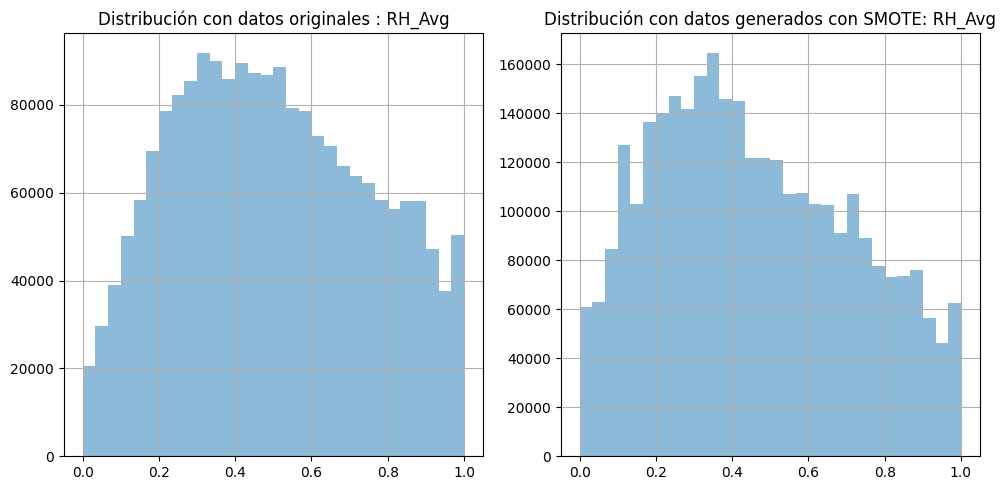

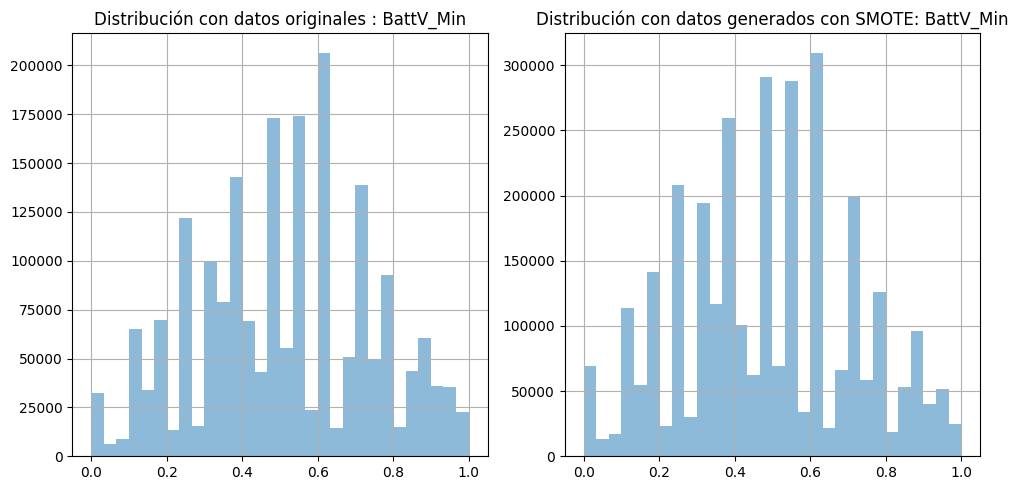

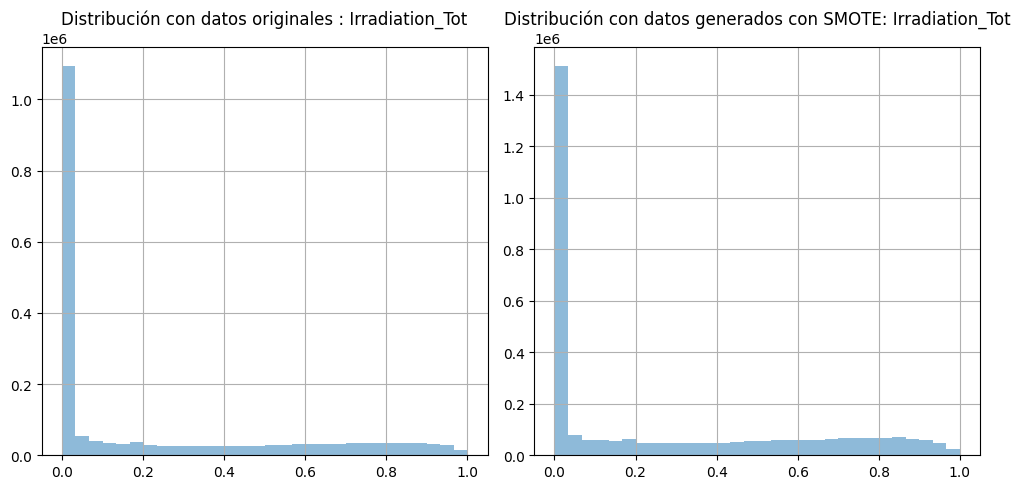

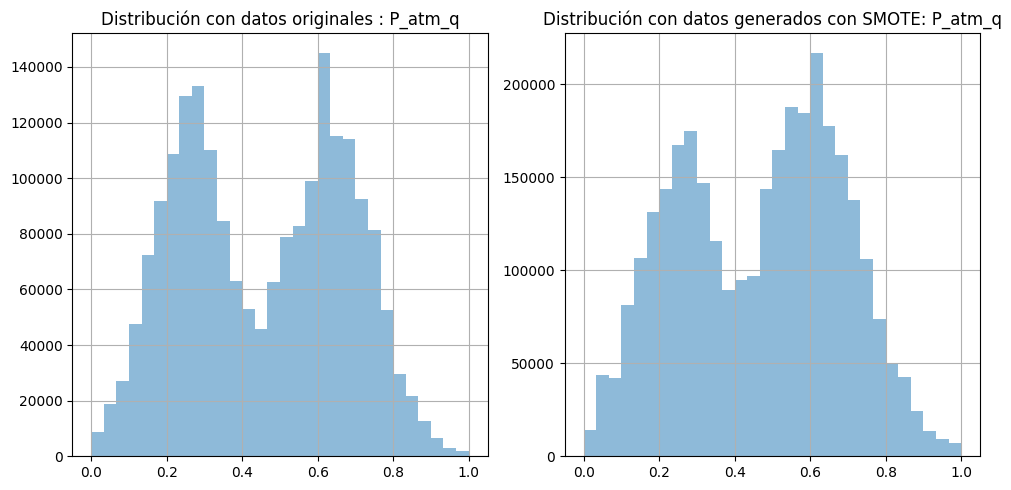

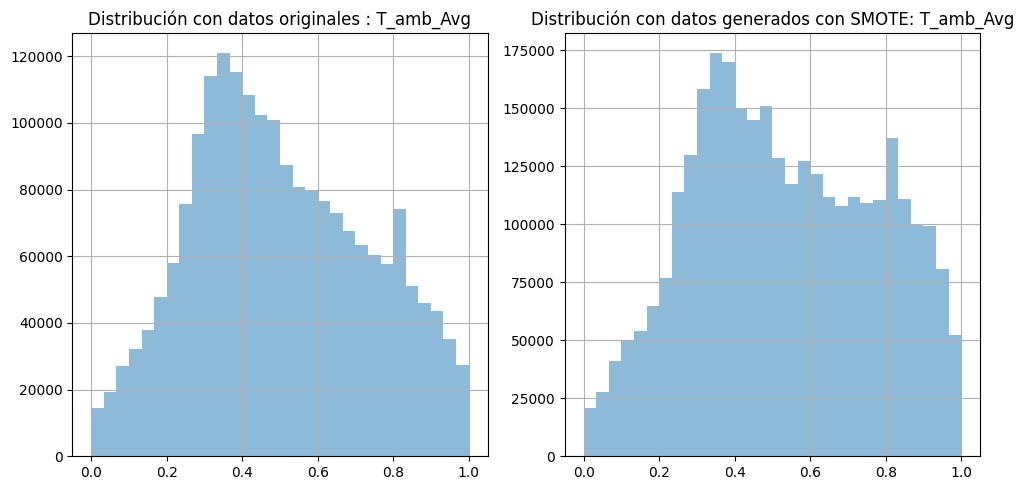

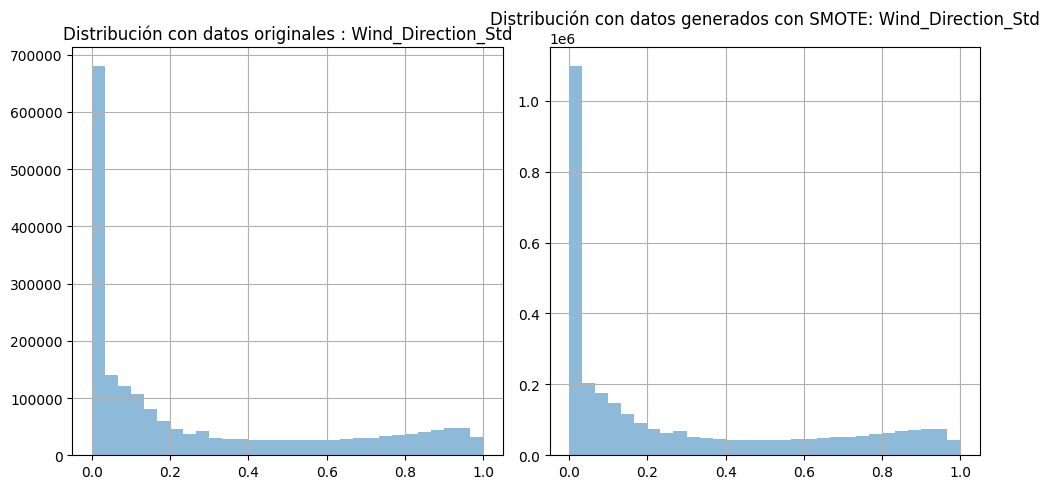

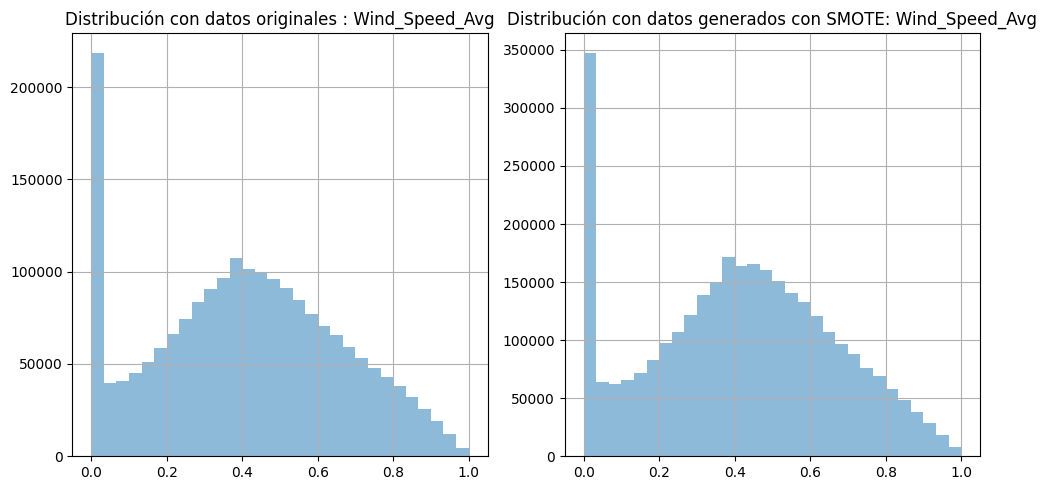

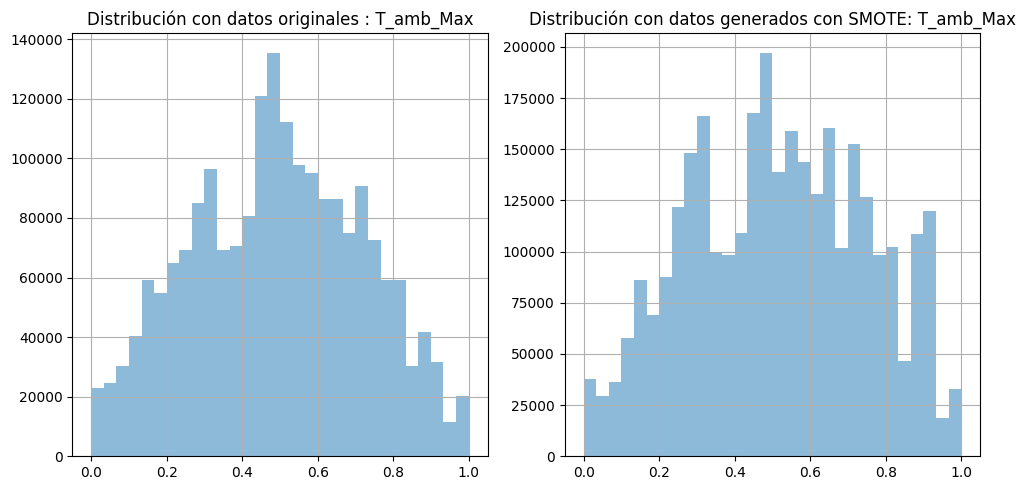

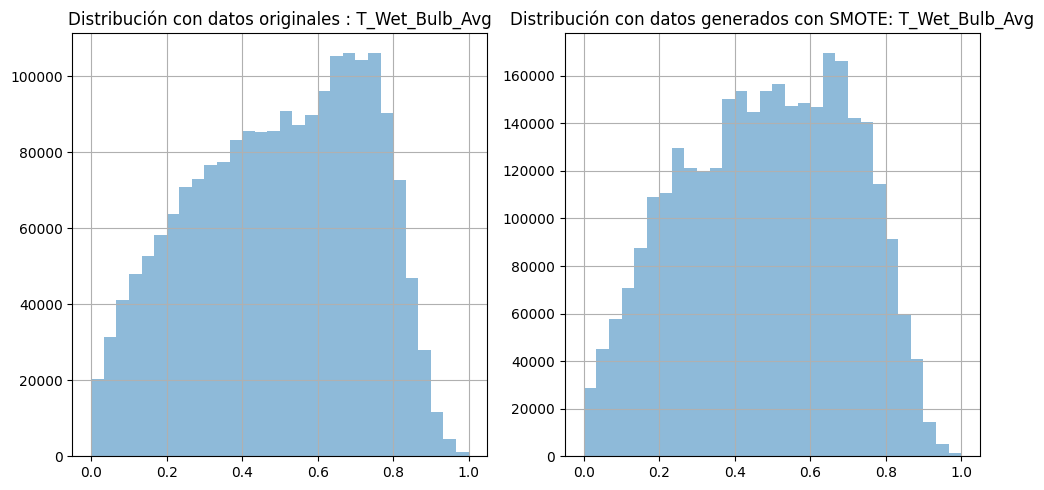

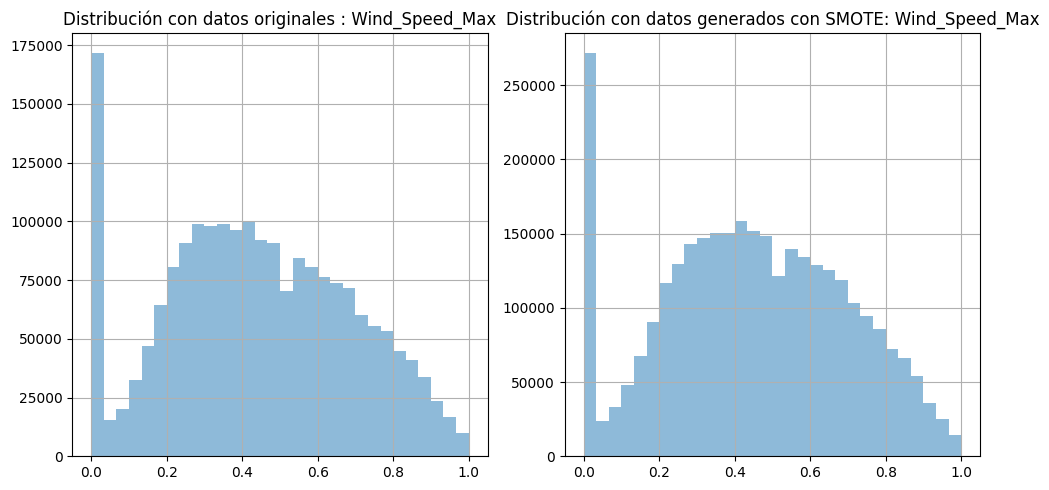

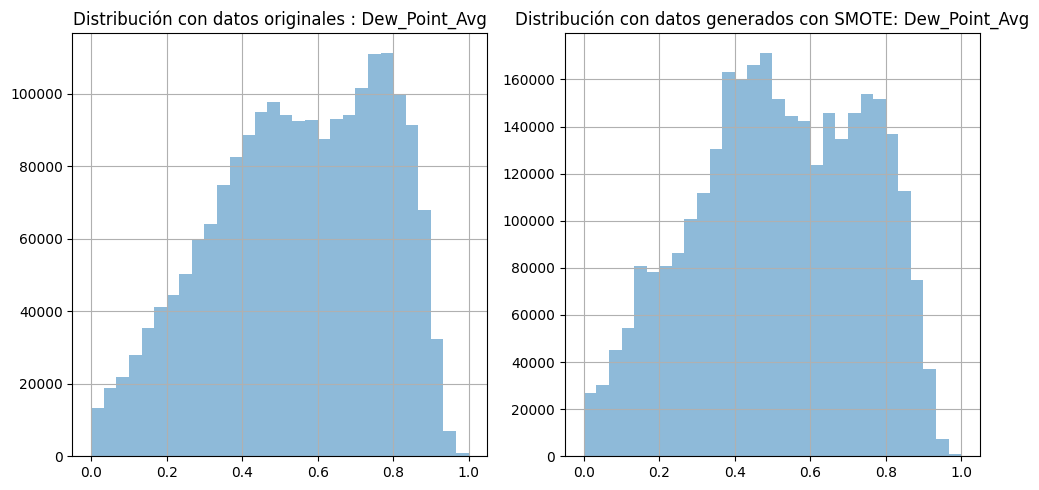

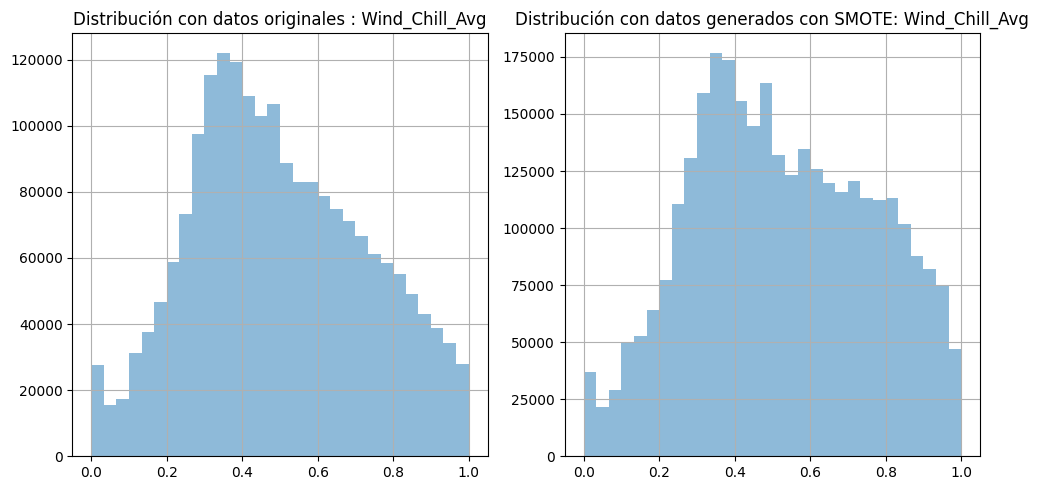

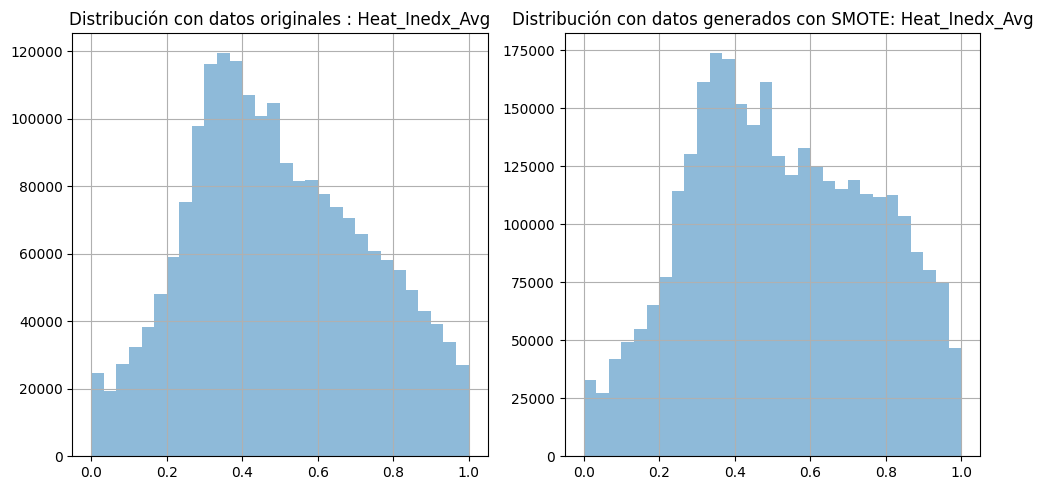

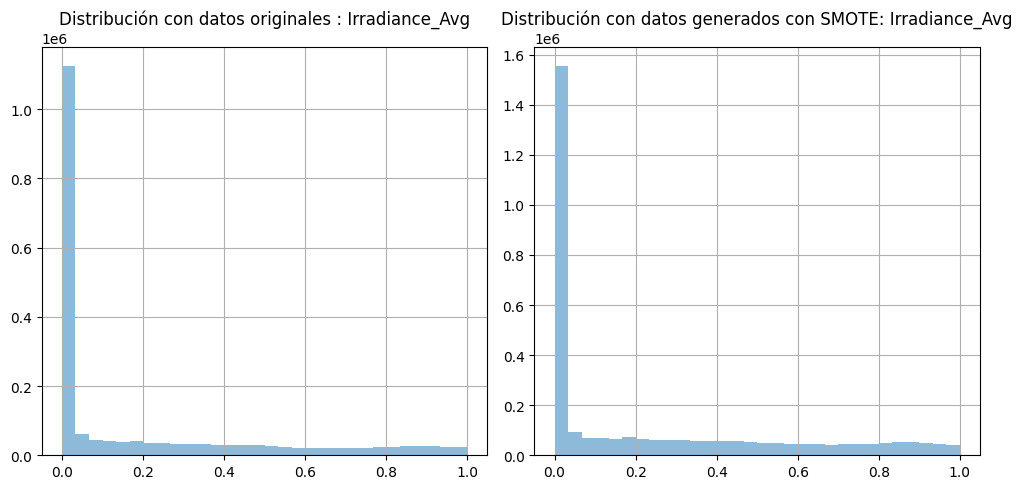

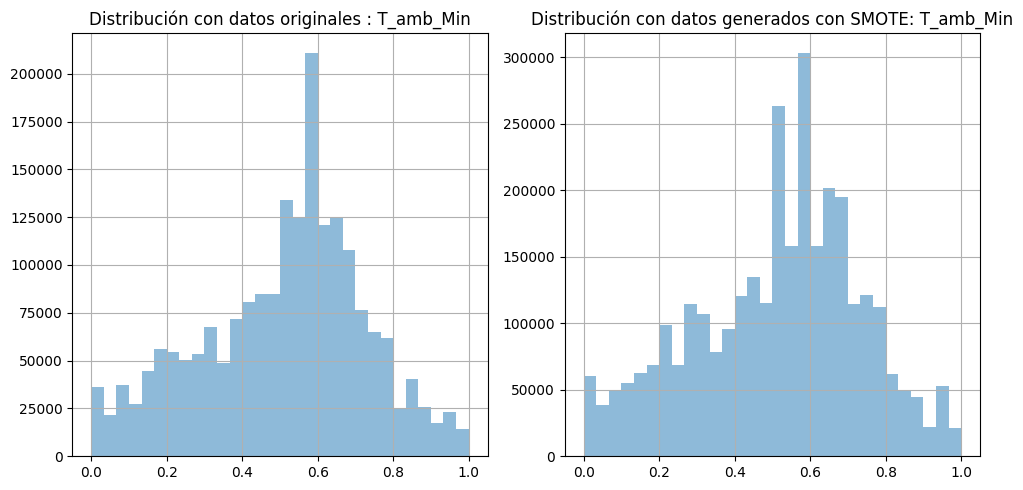

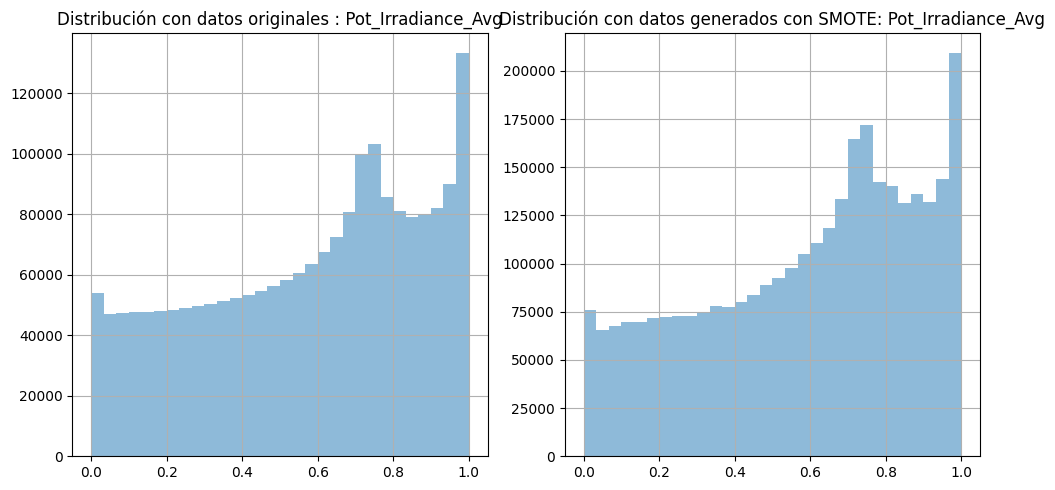

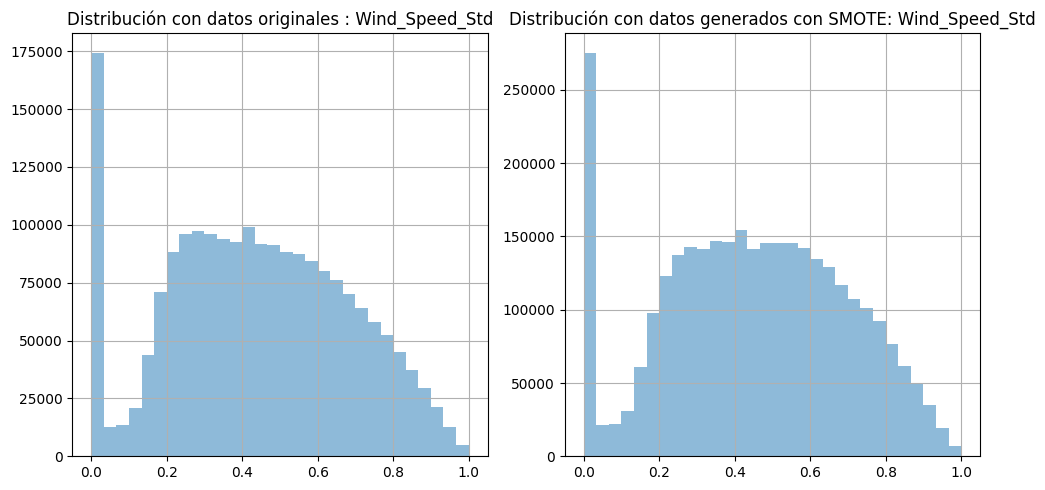

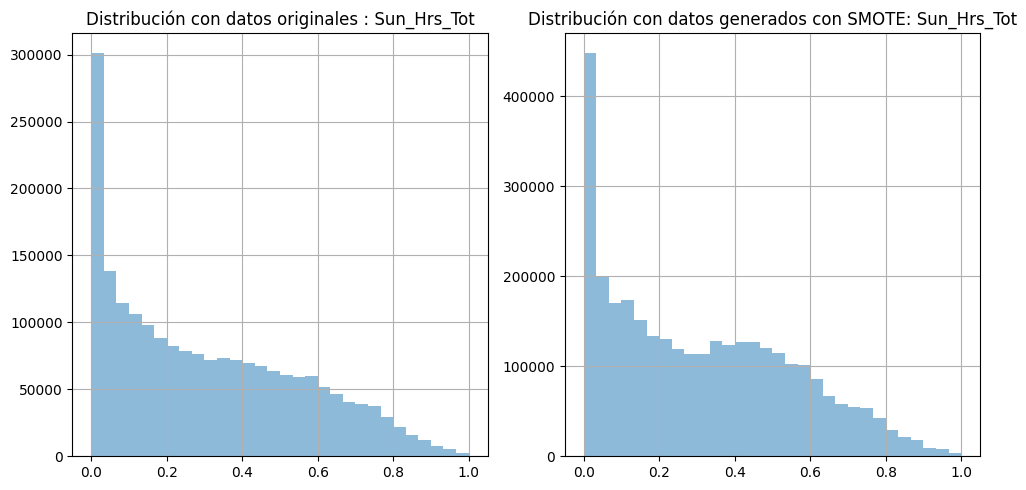

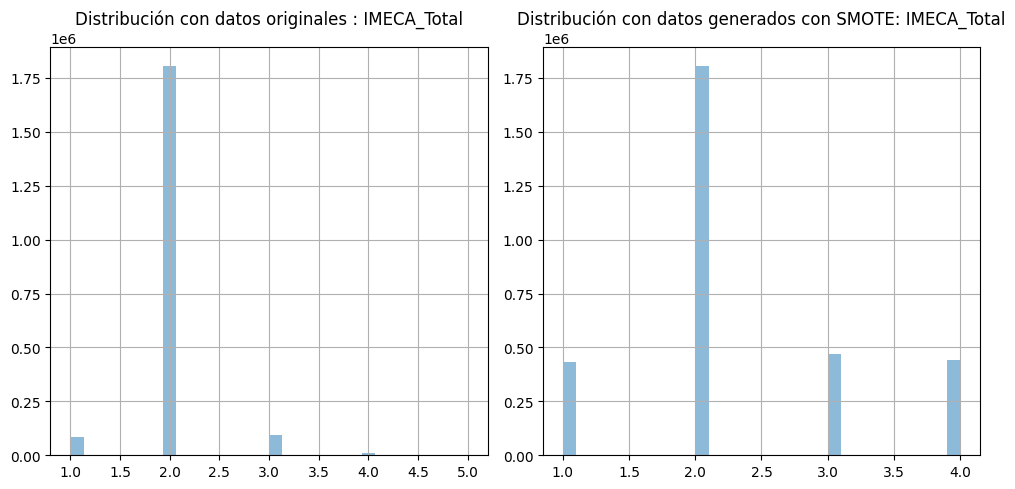

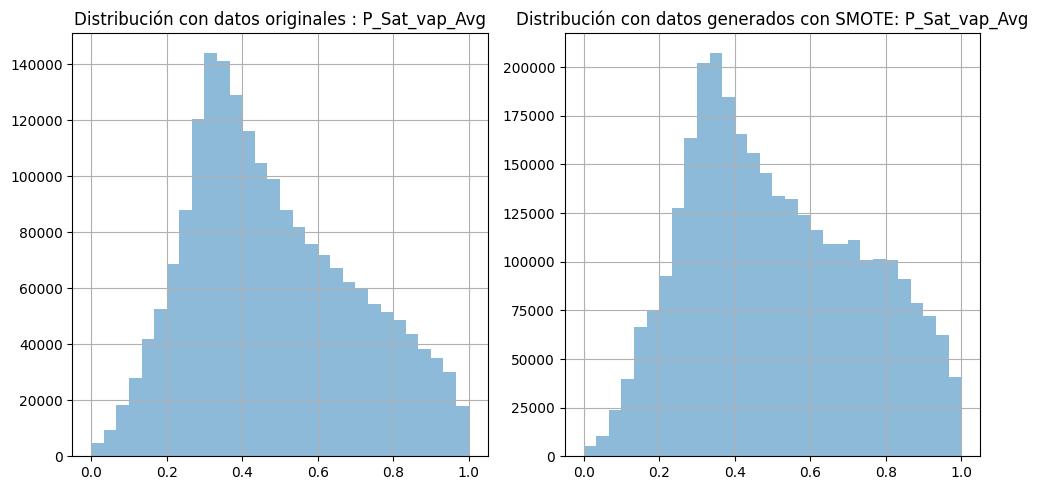

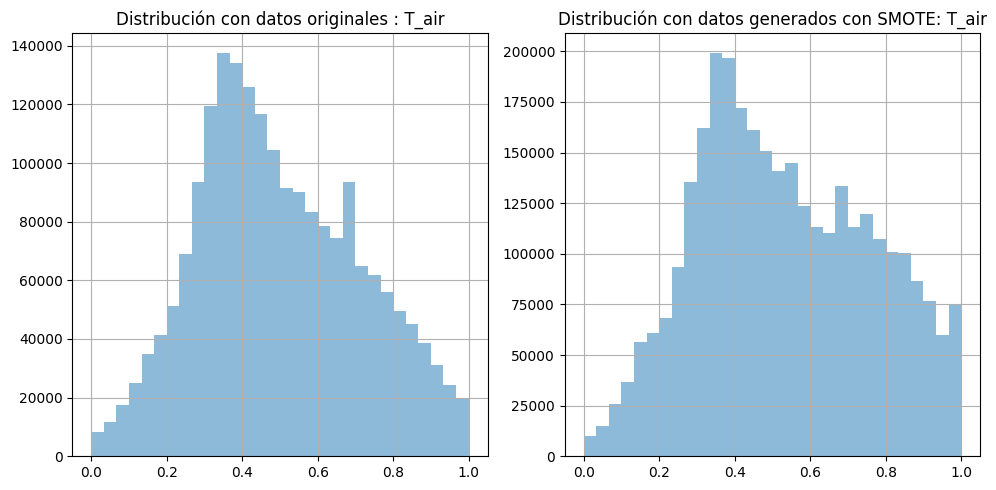

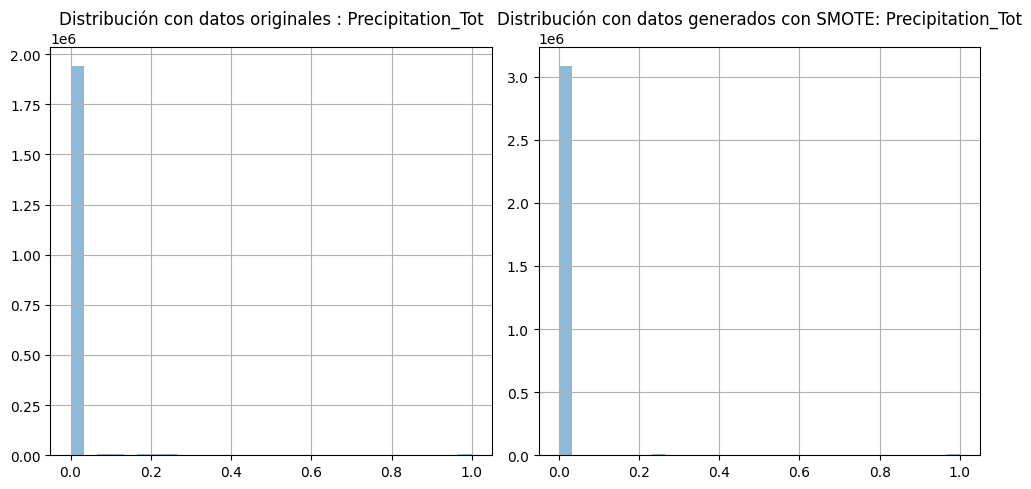

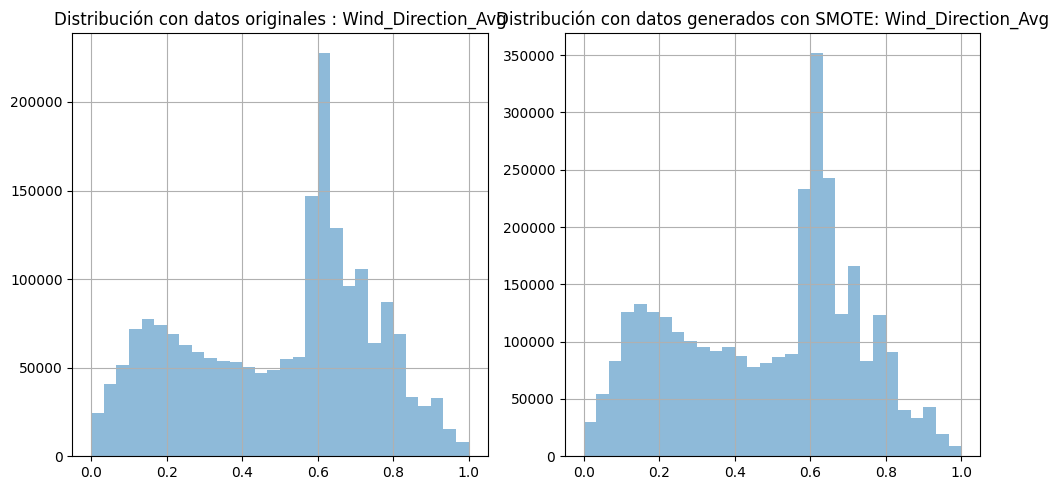

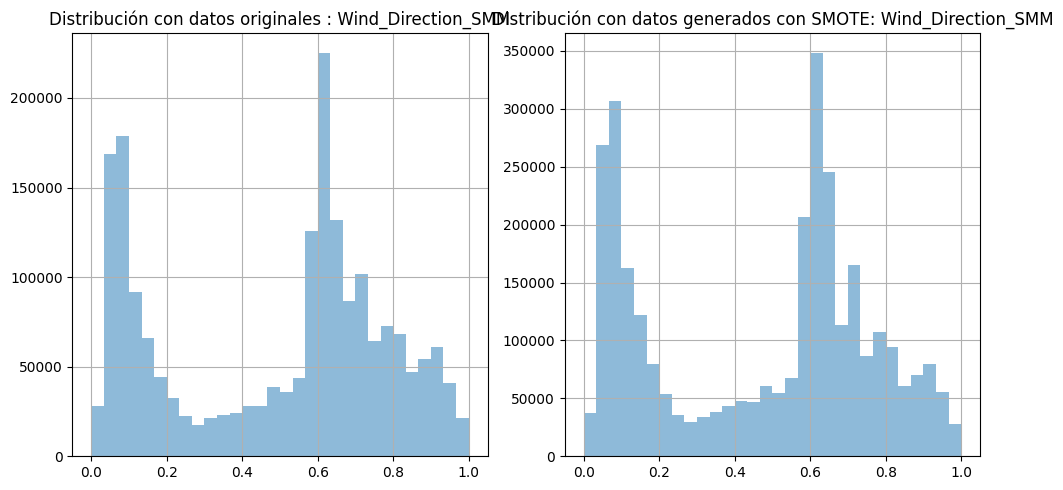

In [ ]:
# Cargar los dataframes desde las rutas especificadas
df1 = pd.read_csv('/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Clases_Generadas/Normalizar_Segundo_Clases_Grupal.csv')
df2 = pd.read_csv('/content/drive/My Drive/Maestria-programas/Muestras_Unidas/SMOTE_CTGAN/SMOTE3_DATA.csv')

# Identificar las columnas comunes entre ambos dataframes
common_columns = set(df1.columns).intersection(df2.columns)

# Función para graficar la distribución de las columnas
def plot_distribution(df1, df2, column):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    df1[column].hist(bins=30, alpha=0.5)
    plt.title(f'Distribución con datos originales : {column}')

    plt.subplot(1, 2, 2)
    df2[column].hist(bins=30, alpha=0.5)
    plt.title(f'Distribución con datos generados con SMOTE: {column}')

    plt.tight_layout()
    plt.show()

# Graficar la distribución de cada columna común
for column in common_columns:
    plot_distribution(df1, df2, column)


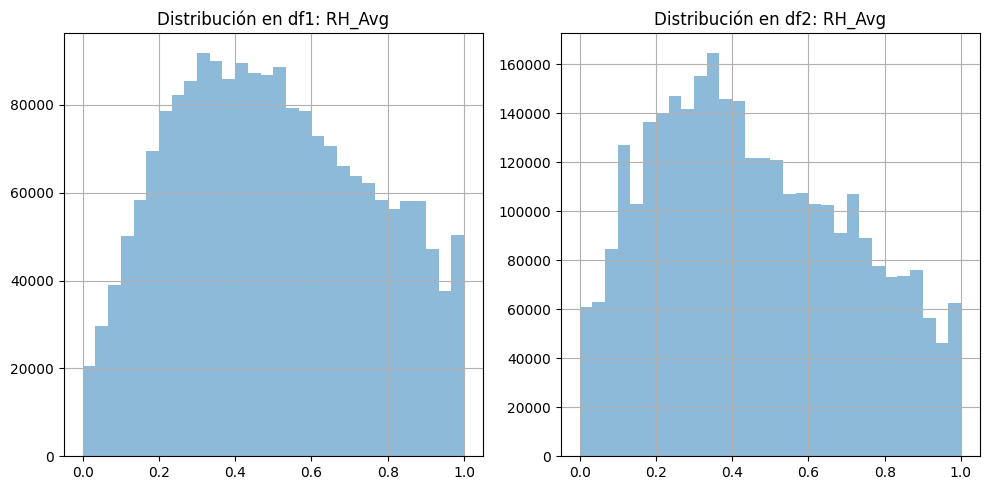

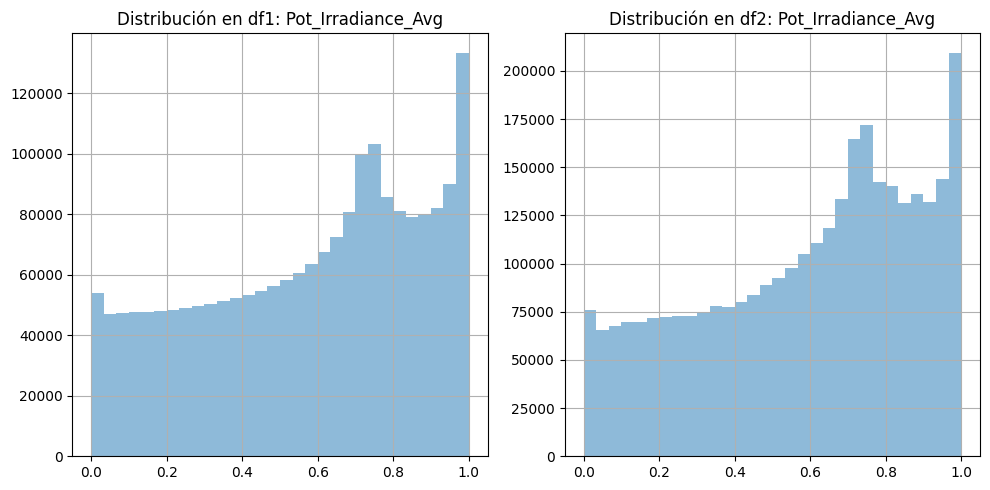

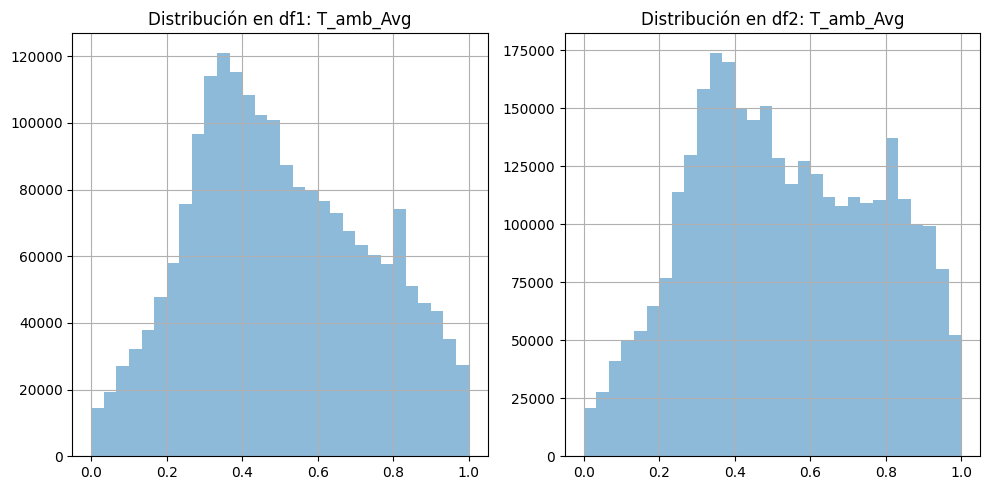

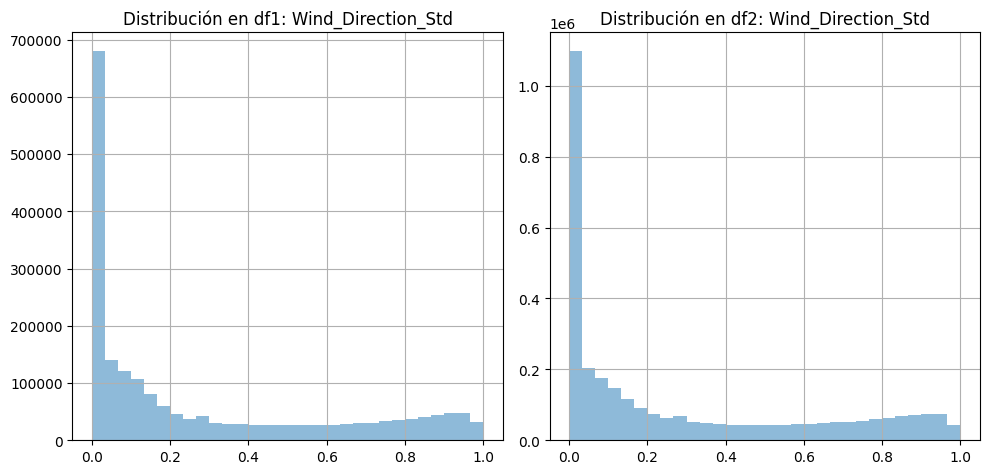

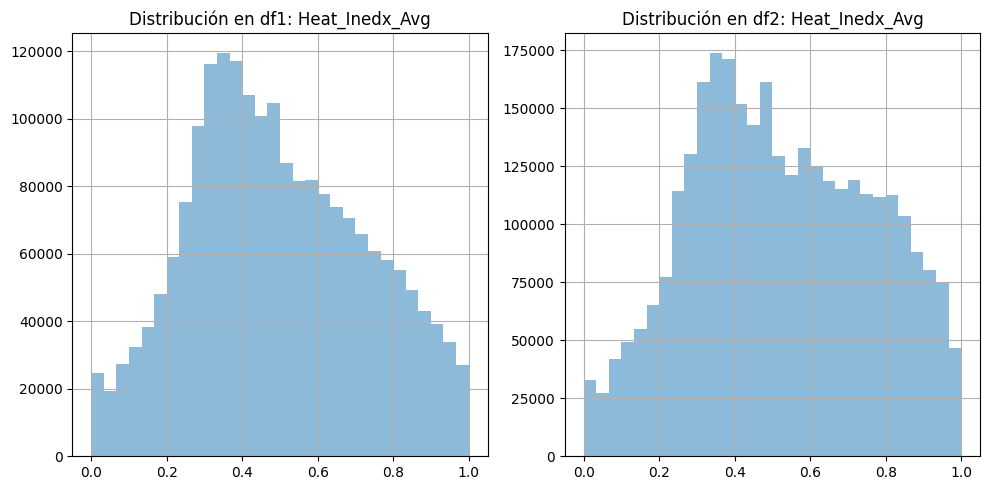

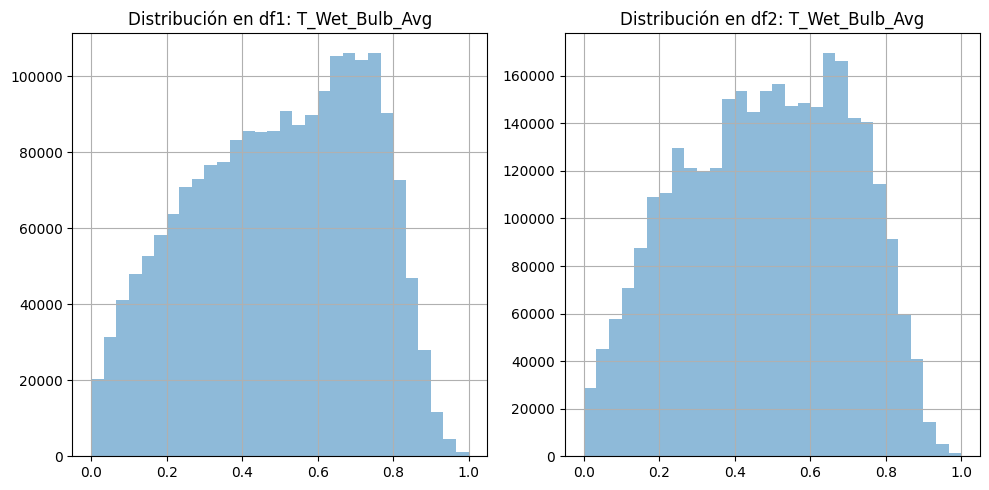

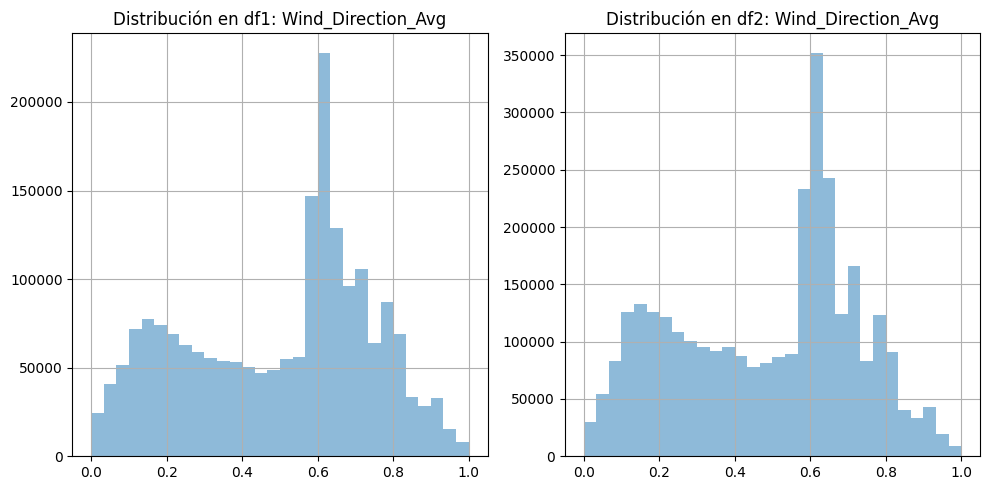

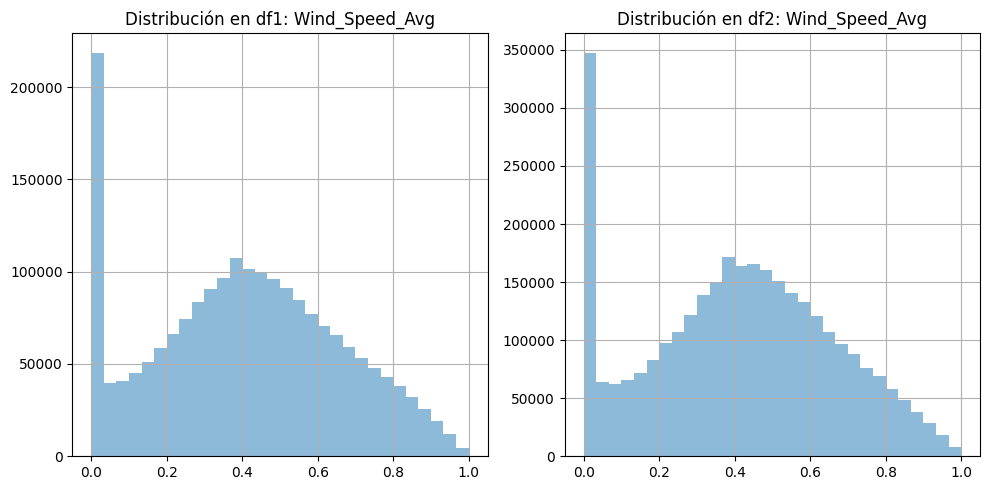

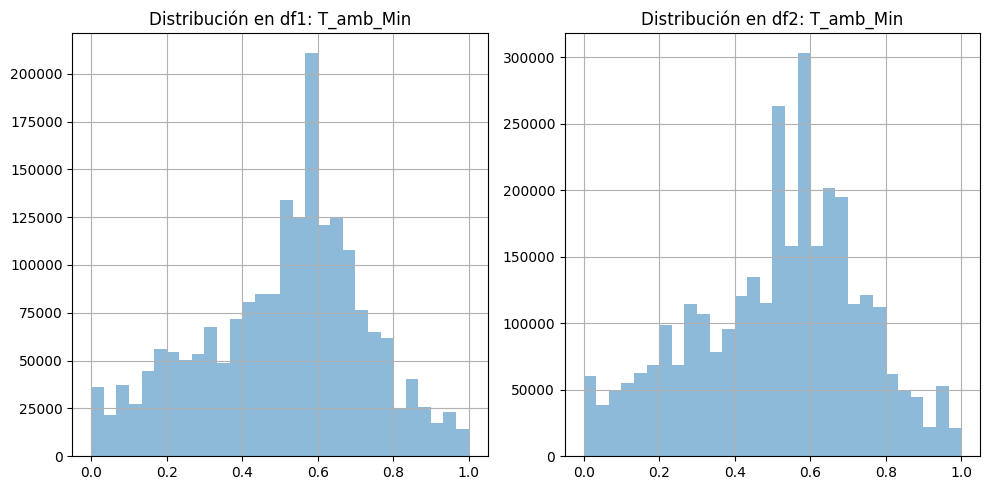

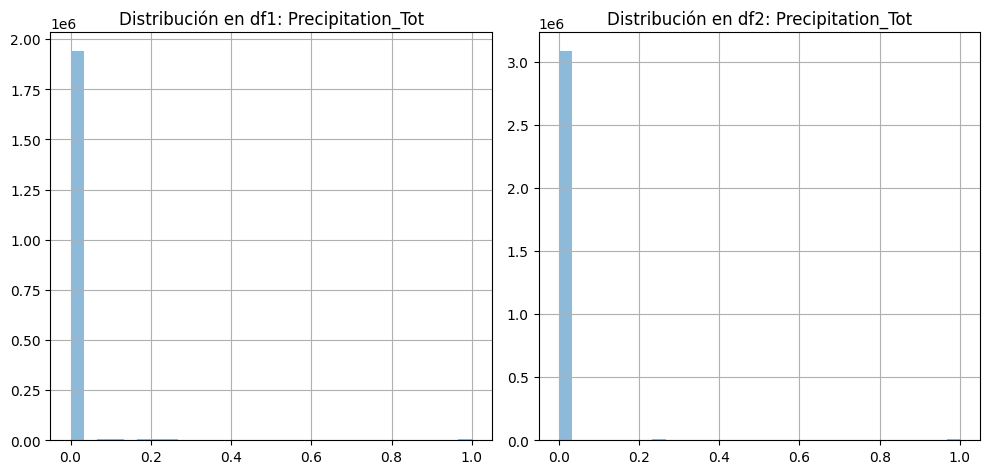

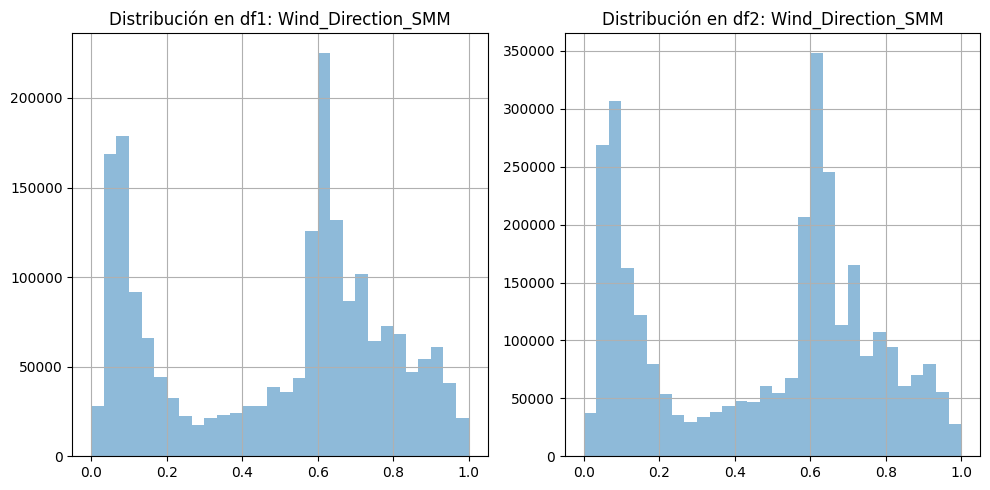

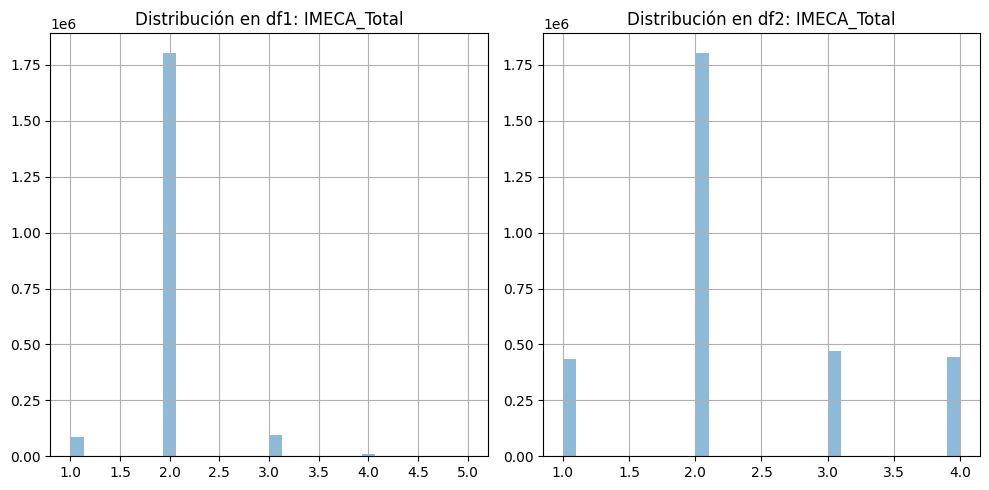

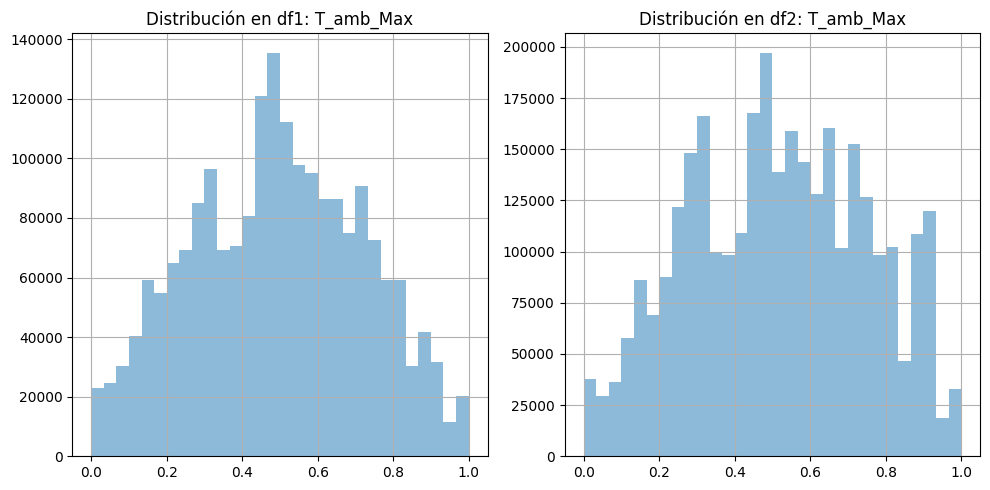

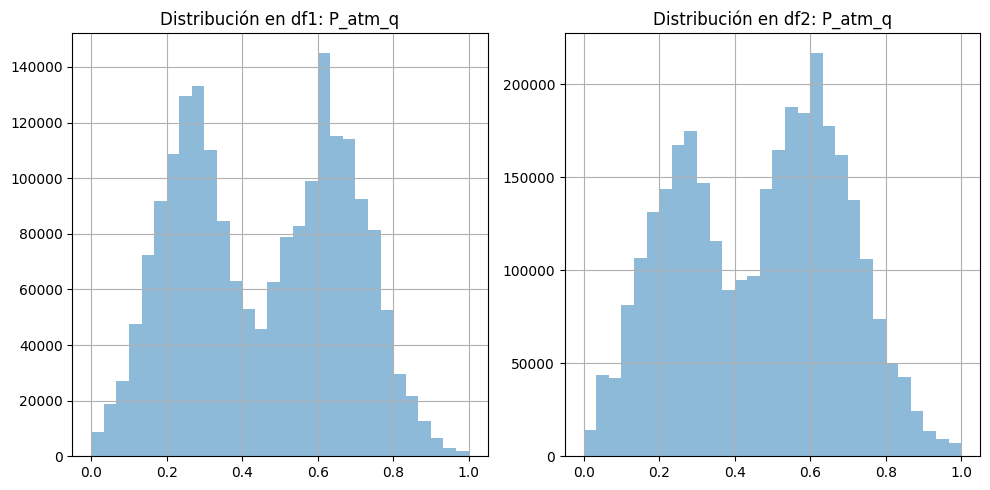

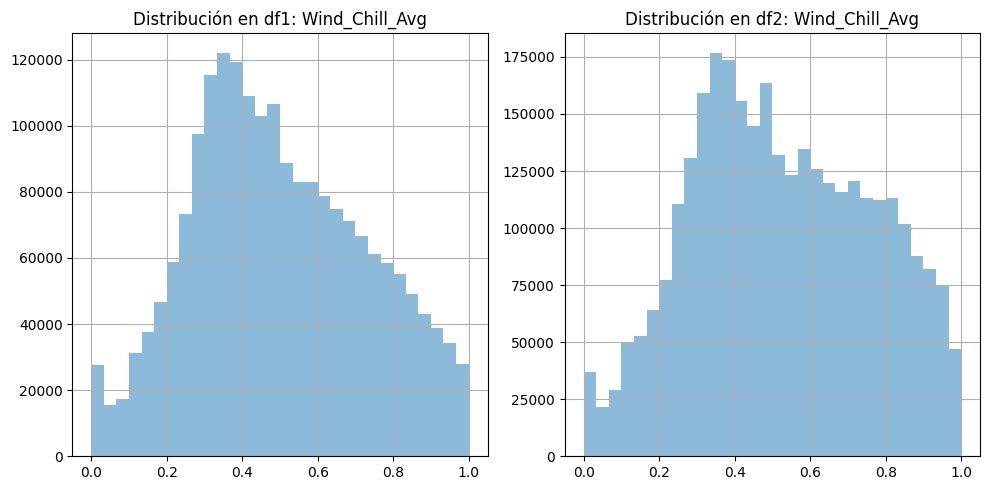

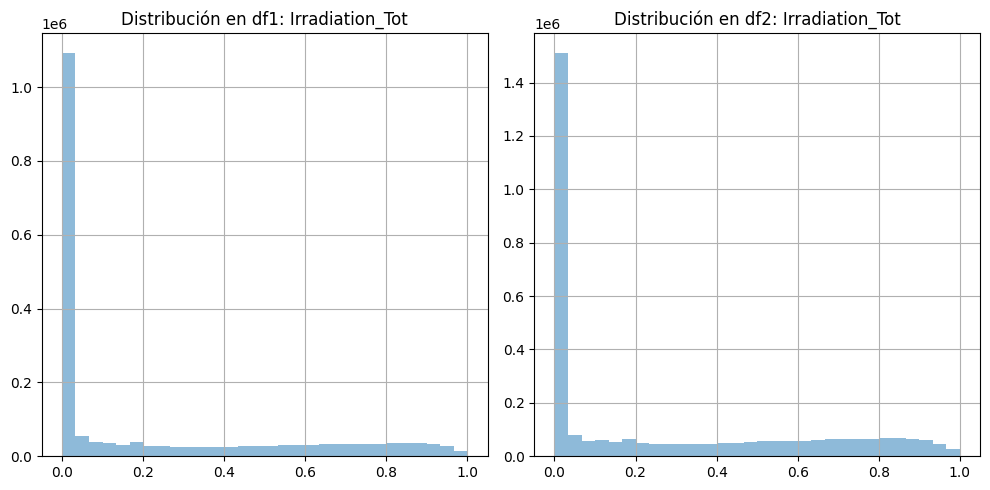

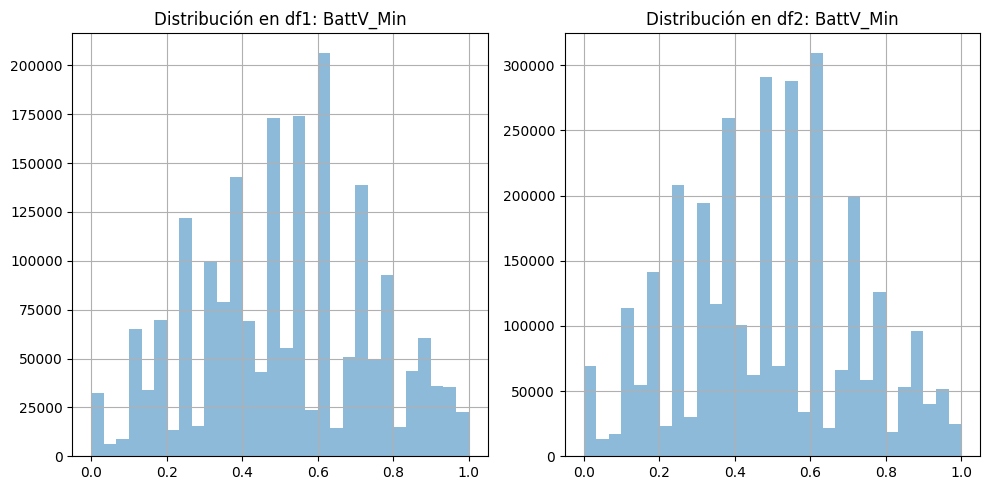

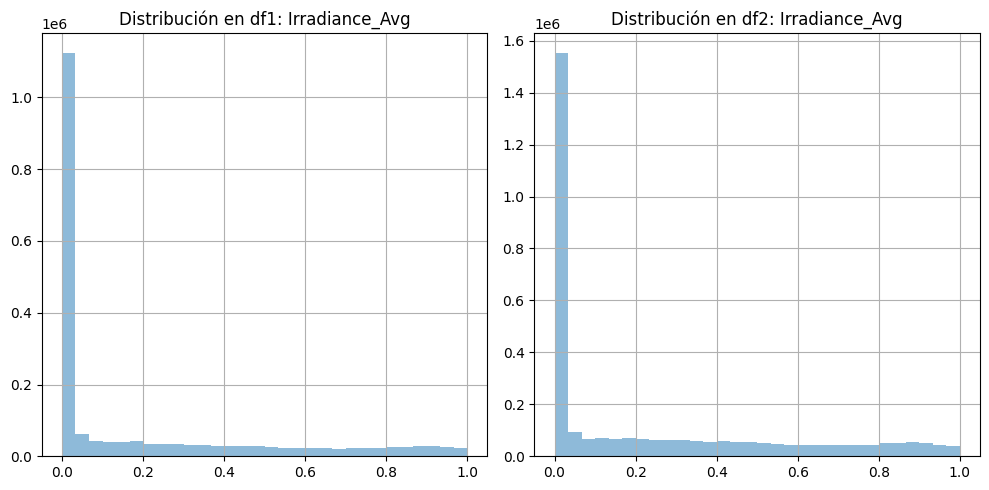

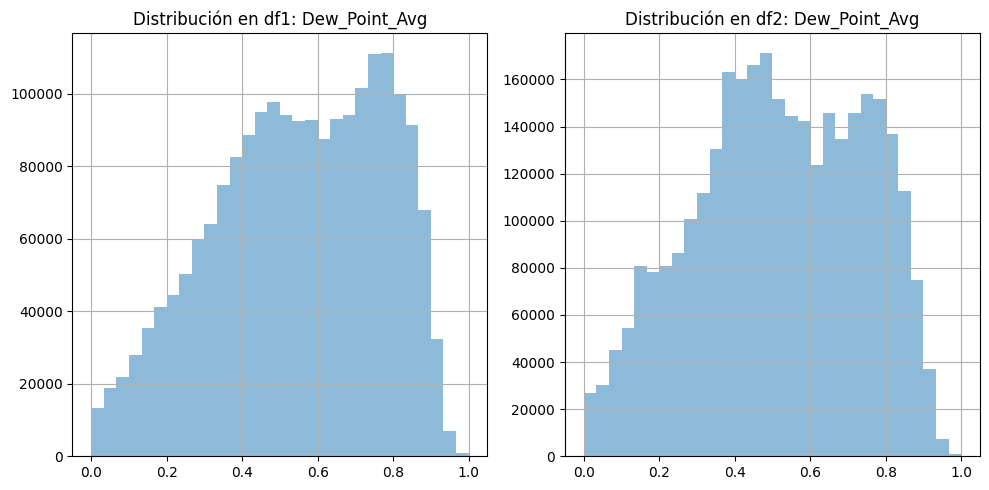

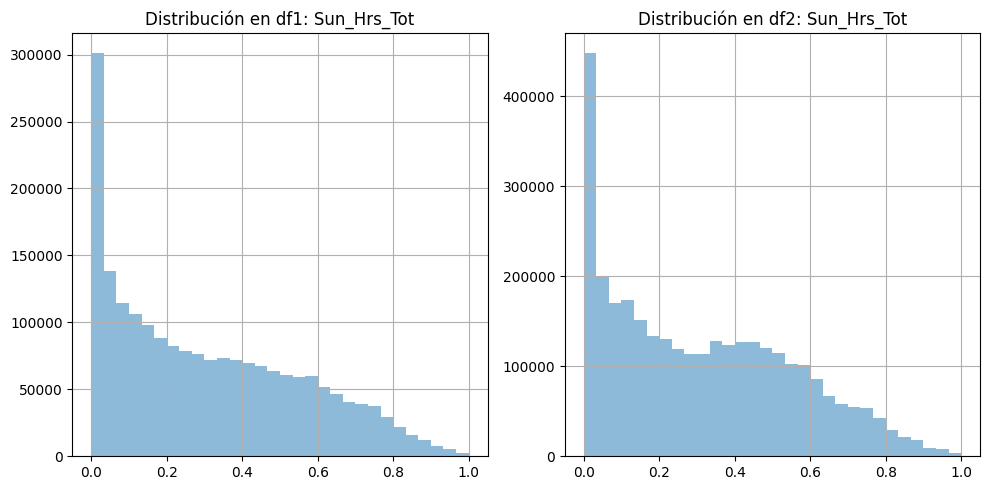

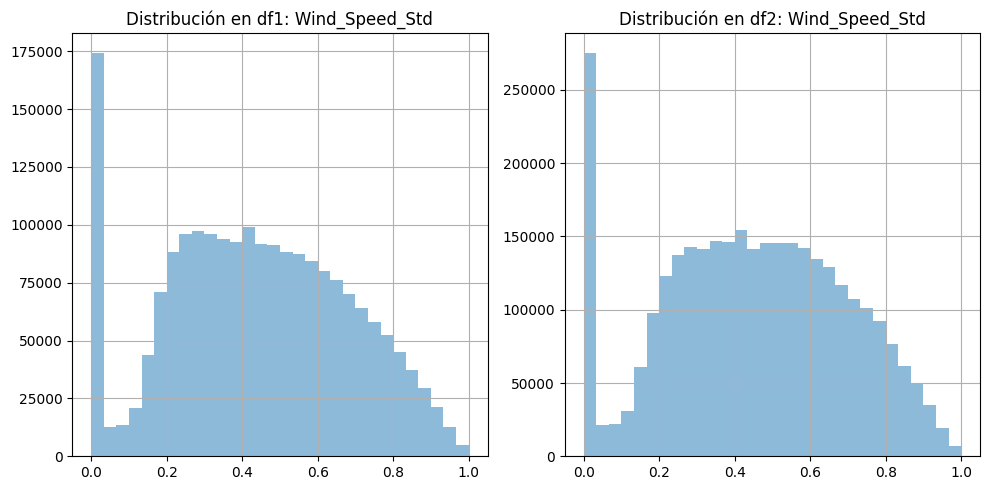

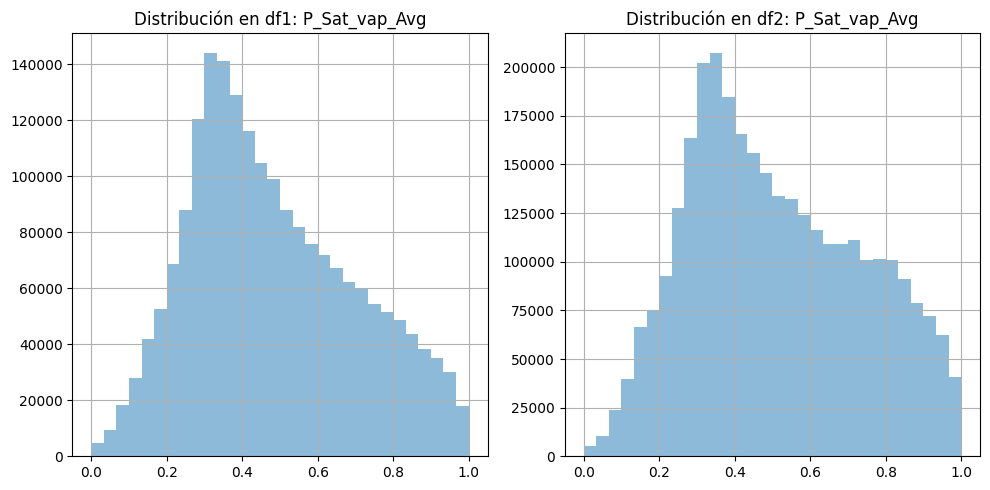

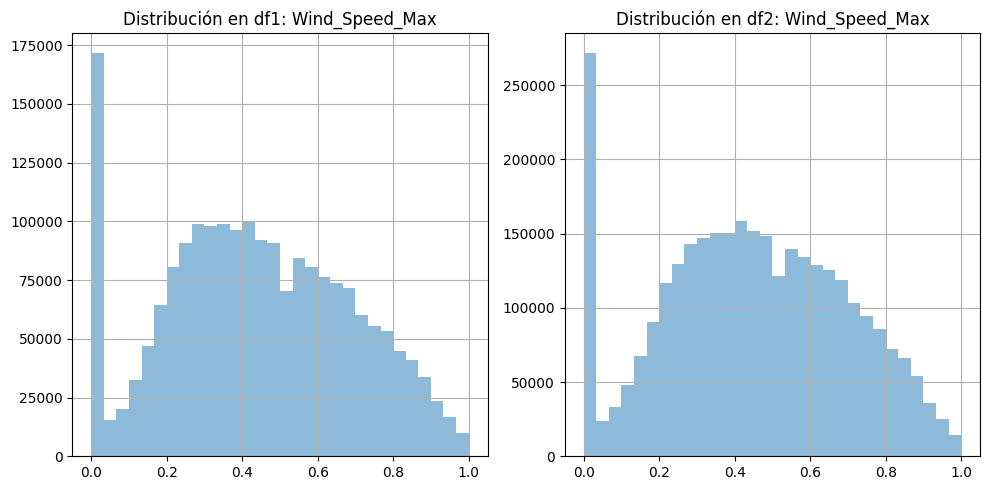

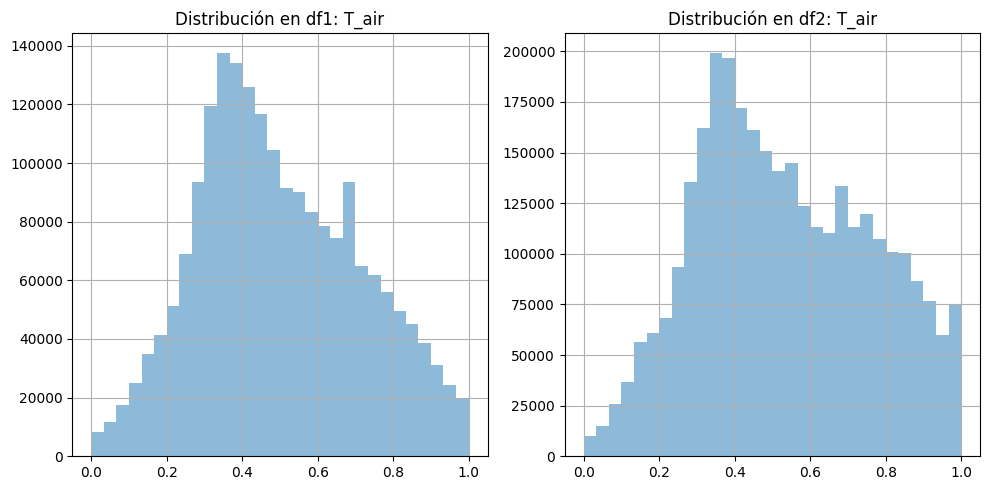

In [ ]:
# Cargar los dataframes desde las rutas especificadas
df1 = pd.read_csv('/content/drive/My Drive/Maestria-programas/Muestras_Unidas/Clases_Generadas/Normalizar_Segundo_Clases_Grupal.csv')
df2 = pd.read_csv('/content/drive/My Drive/Maestria-programas/Muestras_Unidas/SMOTE_CTGAN/SMOTE3_DATA.csv')

# Identificar las columnas comunes entre ambos dataframes
common_columns = set(df1.columns).intersection(df2.columns)

# Función para graficar la distribución de las columnas
def plot_distribution(df1, df2, column):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    df1[column].hist(bins=30, alpha=0.5)
    plt.title(f'Distribución en df1: {column}')

    plt.subplot(1, 2, 2)
    df2[column].hist(bins=30, alpha=0.5)
    plt.title(f'Distribución en df2: {column}')

    plt.tight_layout()
    plt.show()

# Graficar la distribución de cada columna común
for column in common_columns:
    plot_distribution(df1, df2, column)


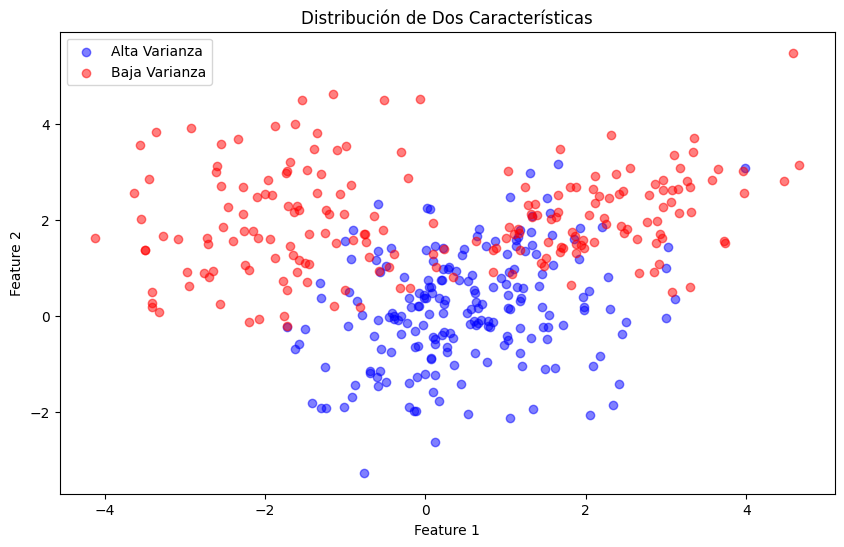

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

# Generar datos con alta varianza
X_high_var, _ = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=42)

# Generar datos con baja varianza
X_low_var, _ = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.00001, class_sep=2, random_state=42)

# Graficar
plt.figure(figsize=(10, 6))

# Alta varianza (color azul)
plt.scatter(X_high_var[:, 0], X_high_var[:, 1], color='blue', alpha=0.5, label='Alta Varianza')

# Baja varianza (color rojo)
plt.scatter(X_low_var[:, 0], X_low_var[:, 1], color='red', alpha=0.5, label='Baja Varianza')

plt.title('Distribución de Dos Características')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


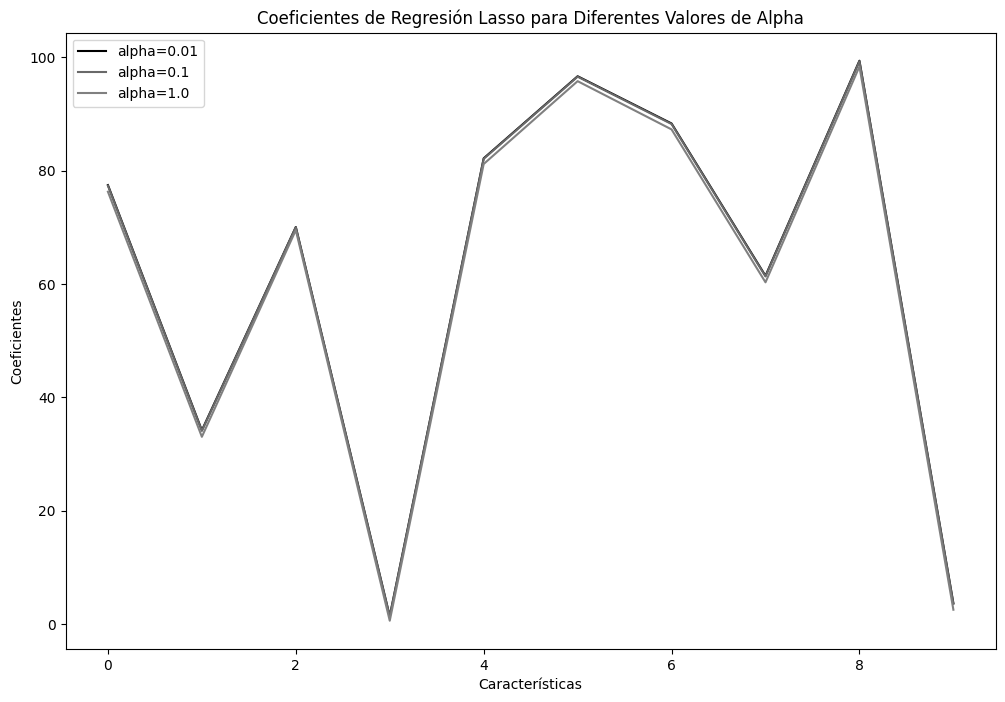

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Generar datos de ejemplo
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=0)

# Valores de alpha a probar
alphas = [0.01, 0.1, 1.0]
coef_alphas = []

# Ajustar el modelo Lasso para cada valor de alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coef_alphas.append(lasso.coef_)

# Crear la gráfica
plt.figure(figsize=(12, 8))

# Colores en escala de grises para cada valor de alpha
colors = ['black', 'dimgray', 'gray']

# Graficar los coeficientes para cada alpha
for idx, (coef, alpha) in enumerate(zip(coef_alphas, alphas)):
    plt.plot(range(len(coef)), coef, label=f'alpha={alpha}', color=colors[idx])

# Añadir título y etiquetas
plt.title('Coeficientes de Regresión Lasso para Diferentes Valores de Alpha')
plt.xlabel('Características')
plt.ylabel('Coeficientes')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()



<ipython-input-29-d7b02c53e023>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.709e+03, tolerance: 1.959e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


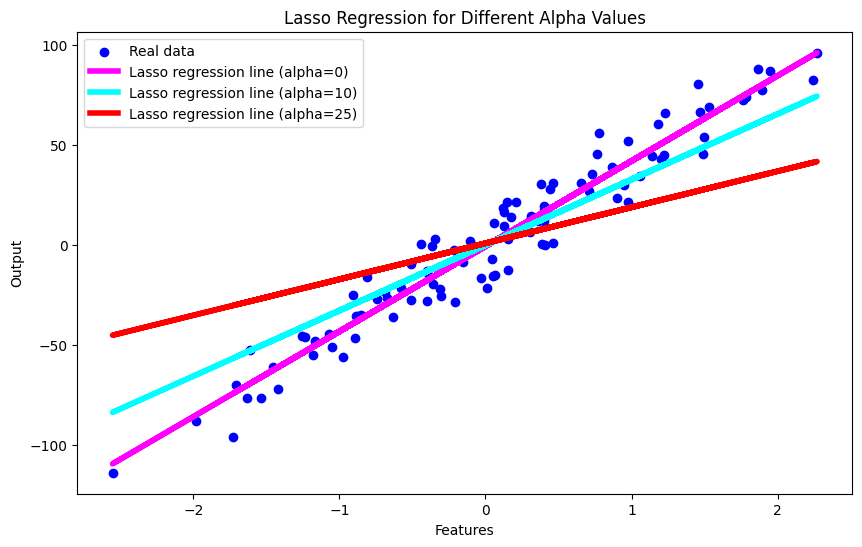

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Generar datos de ejemplo
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Valores de alpha a probar
alphas = [0, 10, 25]

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los puntos de datos
plt.scatter(X, y, color='blue', label='Real data')

# Ajustar el modelo Lasso y graficar la recta de regresión para cada alpha
colors = ['magenta', 'cyan', 'red']
for alpha, color in zip(alphas, colors):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    y_pred = lasso.predict(X)
    plt.plot(X, y_pred, color=color, linewidth=4, label=f'Lasso regression line (alpha={alpha})')

# Añadir título y etiquetas
plt.title('Lasso Regression for Different Alpha Values')
plt.xlabel('Features')
plt.ylabel('Output')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


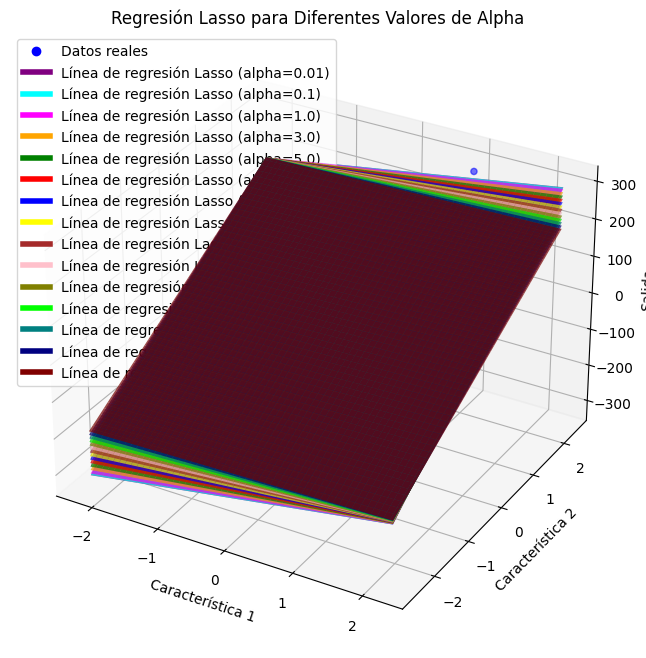

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Generar datos de ejemplo
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=0)

# Valores de alpha a probar
alphas = [0.01, 0.1, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0, 21.0, 23.0, 25.0]

# Crear la gráfica 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Datos reales')

# Ajustar el modelo Lasso y graficar la superficie de regresión para cada alpha
colors = ['purple', 'cyan', 'magenta', 'orange', 'green', 'red', 'blue', 'yellow', 'brown', 'pink', 'olive', 'lime', 'teal', 'navy', 'maroon']
legend_elements = [Line2D([0], [0], color='blue', lw=0, marker='o', label='Datos reales')]

for alpha, color in zip(alphas, colors):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    y_pred = lasso.predict(X)

    # Crear una malla más densa para las predicciones
    x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                                 np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
    z_surf = lasso.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

    # Graficar la superficie con una transparencia ajustada para dar la apariencia de más grosor
    ax.plot_surface(x_surf, y_surf, z_surf, color=color, alpha=0.7, edgecolor='none')
    legend_elements.append(Line2D([0], [0], color=color, lw=4, label=f'Línea de regresión Lasso (alpha={alpha})'))

# Añadir título y etiquetas
ax.set_title('Regresión Lasso para Diferentes Valores de Alpha')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Salida')

# Añadir leyenda manualmente
ax.legend(handles=legend_elements, loc='upper left')

# Mostrar la gráfica
plt.show()
